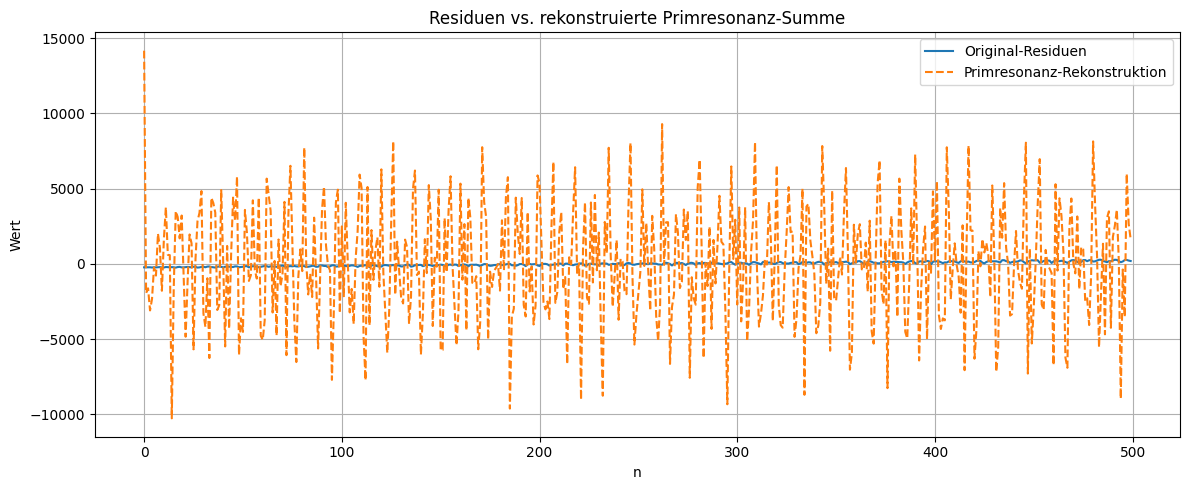

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, pi

# === Vorbereitete Werte aus vorherigem Schritt ===
# Annahme: wir nehmen wieder die präzise-cleaned Skala

# --- Frequenzen & Amplituden aus vorherigem Ergebnis ---
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23]
frequencies = [log(p)/(2*pi) for p in primes]
amplitudes = [2467.16, 2942.52, 2042.94, 1383.19, 1835.08, 1143.04, 931.16, 1268.30, 156.31]

# === Signal rekonstruieren ===
N = 500  # Länge wie in den Residuen
n = np.arange(N)
reconstructed = np.zeros(N)

# --- Primresonanz-Summe ---
for A, f in zip(amplitudes, frequencies):
    reconstructed += A * np.cos(2 * np.pi * f * n)

# === Residuen laden (aus vorherigem Regressionsschritt) ===
# Wiederhole kurz den Regressionscode, falls du ihn nicht mehr hast:
import pandas as pd
from scipy.stats import linregress
from mpmath import zeta

df_beta = pd.read_csv("/content/drive/MyDrive/beta_skala_praezision_cleaned.csv", header=None)
df_beta = df_beta[pd.to_numeric(df_beta[0], errors='coerce').notna()]
beta_n = df_beta[0].astype(float).values

df_deriv = pd.read_csv("/content/drive/MyDrive/zeta_derivatives.csv")
product = float(zeta(2)) * df_deriv["zeta_prime_abs"].astype(float).values

# --- Residuen ---
N = min(len(beta_n), len(product))
beta_n = beta_n[:N]
product = product[:N]
slope, intercept, *_ = linregress(product, beta_n)
fit = slope * product + intercept
residuals = beta_n - fit
residuals = residuals[:N]

# === Vergleichsplot ===
plt.figure(figsize=(12, 5))
plt.plot(residuals, label="Original-Residuen", linewidth=1.5)
plt.plot(reconstructed[:N], label="Primresonanz-Rekonstruktion", linestyle="--")
plt.title("Residuen vs. rekonstruierte Primresonanz-Summe")
plt.xlabel("n")
plt.ylabel("Wert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


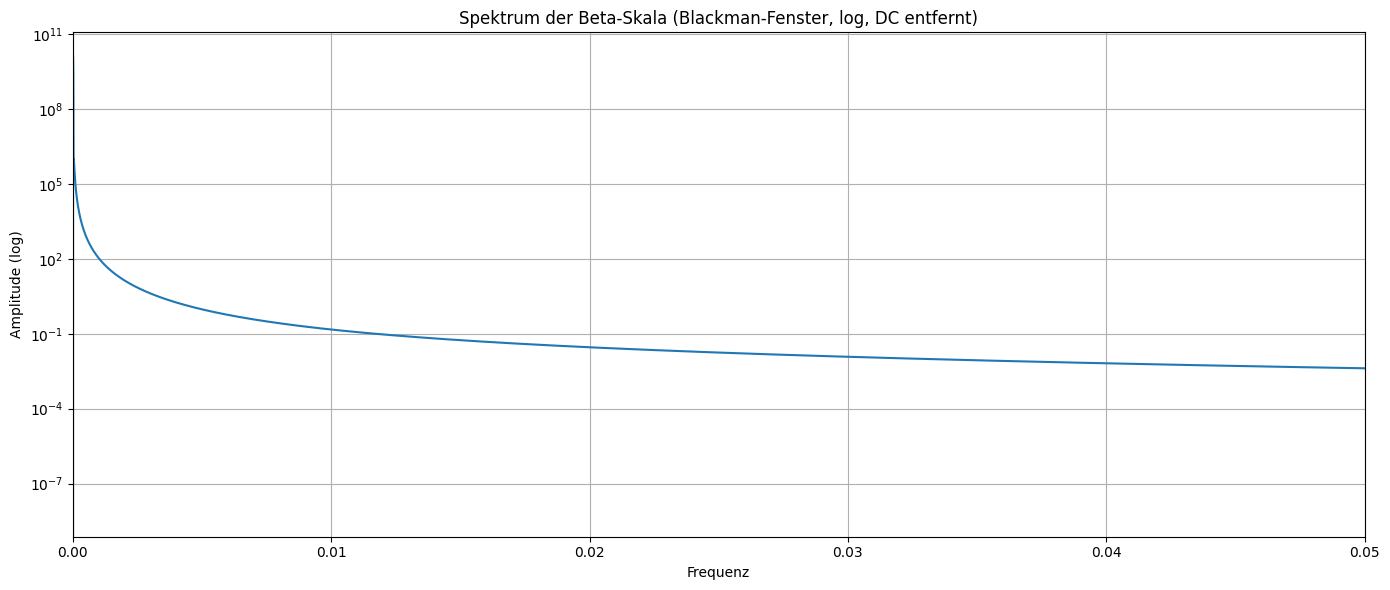

In [ ]:
# === 1. Mount Google Drive ===
from google.colab import drive
drive.mount('/content/drive')

# === 2. Pfad zur CSV-Datei in deinem Google Drive ===
csv_path = '/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv'

# === 3. Bibliotheken laden ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import windows

# === 4. Daten laden ===
df = pd.read_csv(csv_path)

# Nur numerische Spalten extrahieren (ggf. manuell 'beta' auswählen)
beta_values = df.select_dtypes(include=[np.number]).values.flatten()
N = len(beta_values)
sample_rate = 1.0  # Diskret, also 1 Schritt = 1 Sample

# === 5. Fensterung (Blackman) ===
window = windows.blackman(N)
beta_windowed = beta_values * window

# === 6. FFT durchführen ===
fft_result = fft(beta_windowed)
frequencies = fftfreq(N, d=1/sample_rate)[:N//2]
fft_magnitude = np.abs(fft_result)[:N//2]
fft_magnitude[0] = 0  # DC entfernen

# === 7. Plotten ===
plt.figure(figsize=(14, 6))
plt.semilogy(frequencies, fft_magnitude)
plt.title("Spektrum der Beta-Skala (Blackman-Fenster, log, DC entfernt)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.grid(True)
plt.xlim(0, 0.05)
plt.tight_layout()
plt.show()

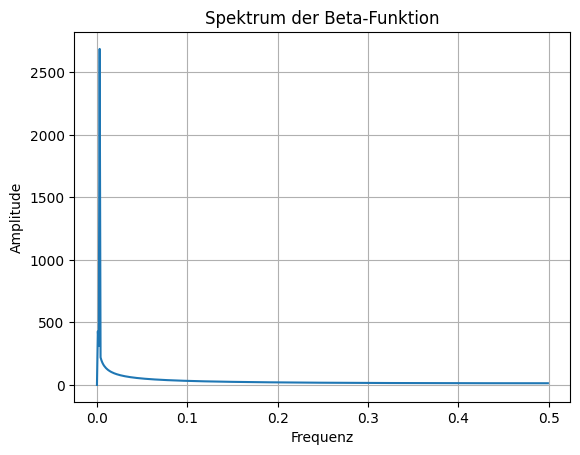

In [ ]:
from scipy.fft import fft, fftfreq

N = len(beta)
yf = np.abs(fft(beta - np.mean(beta)))
xf = fftfreq(N, 1)[:N//2]

plt.plot(xf, yf[:N//2])
plt.title("Spektrum der Beta-Funktion")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


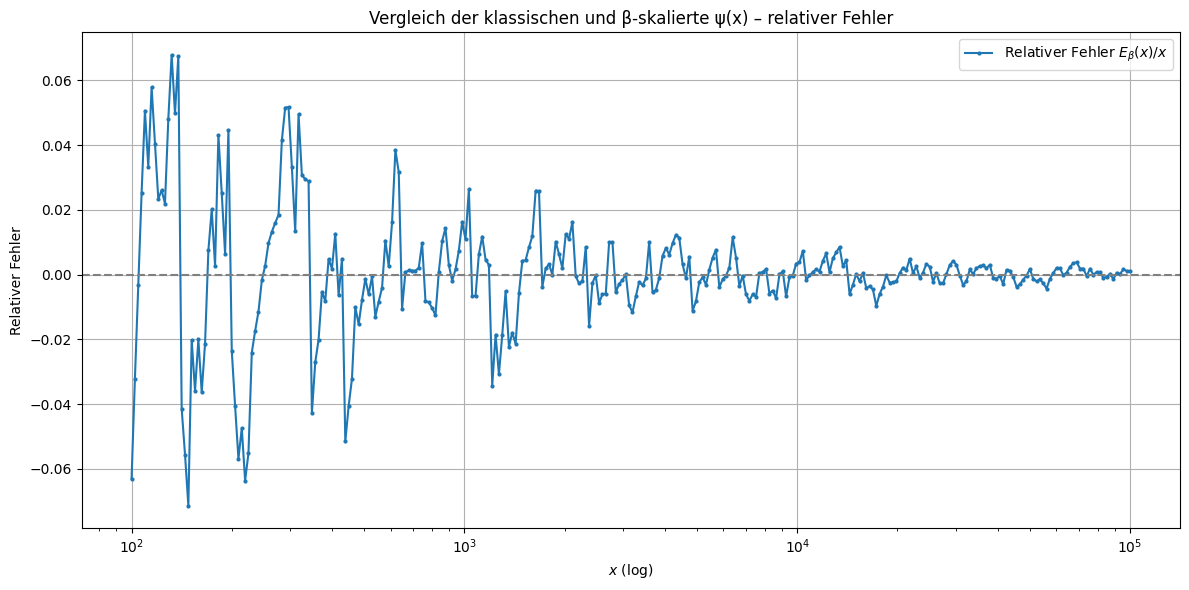

In [ ]:
# === 1. Google Drive einbinden ===
from google.colab import drive
drive.mount('/content/drive')

# === 2. Pfad zur Nullstellen-Datei ===
import numpy as np
import matplotlib.pyplot as plt

file_path = "/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv"

# === 3. Nullstellen laden (nur z.B. erste 10000 verwenden für Performance) ===
zeros = np.loadtxt(file_path, delimiter=',')[:10000]

# === 4. X-Wertebereich definieren ===
x_vals = np.logspace(2, 5, 300)

# === 5. Klassische Spektralsumme ===
def R_classic(x, gamma):
    rho = 0.5 + 1j * gamma
    terms = x[:, None]**rho / rho
    return 2 * np.real(np.sum(terms, axis=1))

# === 6. Beta-Wert und Skalierung ===
phi = (1 + np.sqrt(5)) / 2
beta = (np.pi - phi) / np.pi

def R_beta_scaled(x, gamma, beta):
    rho_beta = 0.5 + 1j * beta * gamma
    terms = x[:, None]**rho_beta / rho_beta
    return 2 * np.real(np.sum(terms, axis=1))

# === 7. ψ(x) rekonstruieren ===
psi_classical = x_vals - R_classic(x_vals, zeros)
psi_beta_scaled = x_vals - R_beta_scaled(x_vals, zeros, beta)

# === 8. Fehlerterme berechnen ===
error_term = psi_classical - psi_beta_scaled
relative_error = error_term / x_vals

# === 9. Plotten ===
plt.figure(figsize=(12, 6))
plt.plot(x_vals, relative_error, label=r'Relativer Fehler $E_\beta(x)/x$', marker='o', markersize=2, linestyle='-')
plt.xscale('log')
plt.xlabel(r'$x$ (log)')
plt.ylabel('Relativer Fehler')
plt.title('Vergleich der klassischen und β-skalierte ψ(x) – relativer Fehler')
plt.axhline(0, color='gray', linestyle='--')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Zeta-Nullstellen laden (Spalte mit gamma-Werten)
zeros = pd.read_csv("/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv", header=None).values.flatten()

# Ziel-Funktion zur Optimierung: mittlerer quadratischer Fehler (MSE)
def beta_error(beta, x_values, psi_values, zeros):
    error_sum = 0
    for xi, psi_x in zip(x_values, psi_values):
        spec_sum = np.sum([xi**(0.5 + 1j * beta * gamma) / (0.5 + 1j * beta * gamma) for gamma in zeros])
        psi_beta = xi - 2 * np.real(spec_sum)
        error_sum += (psi_beta - psi_x)**2
    return error_sum / len(x_values)

# Beispiel-Daten (ersetze durch deine echten ψ(x)-Werte)
x_vals = np.logspace(2, 5, 100)
psi_true = x_vals - np.cumsum(np.isin(np.round(x_vals).astype(int), np.arange(2, int(np.max(x_vals)) + 1)) * np.log(np.arange(2, int(np.max(x_vals)) + 1)))

# Beta optimieren
res = minimize_scalar(beta_error, bounds=(0.45, 0.5), args=(x_vals, psi_true, zeros), method='bounded')
optimal_beta = res.x

print(f"Optimaler Beta-Wert: {optimal_beta:.10f}")

# Plot zur Visualisierung
errors = []
for xi, psi_x in zip(x_vals, psi_true):
    spec_sum = np.sum([xi**(0.5 + 1j * optimal_beta * gamma) / (0.5 + 1j * optimal_beta * gamma) for gamma in zeros])
    psi_beta = xi - 2 * np.real(spec_sum)
    errors.append((psi_beta - psi_x) / xi)

plt.figure(figsize=(12, 5))
plt.semilogx(x_vals, errors, label="Relativer Fehler Eβ(x)/x")
plt.axhline(0, color='gray', linestyle='--')
plt.title(f"Optimierter Beta-Vergleich – β ≈ {optimal_beta:.10f}")
plt.xlabel("x (log)")
plt.ylabel("Relativer Fehler")
plt.legend()
plt.grid(True)
plt.show()

ValueError: operands could not be broadcast together with shapes (100,) (99999,) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from sympy import primerange

# Lade Zeta-Nullstellen
zeros = pd.read_csv("/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv", header=None).values.flatten()

# Wertebereich für x
x_vals = np.logspace(2, 5, 100)
x_int = np.round(x_vals).astype(int)

# Echte ψ(x): Summe von log(p) für alle Primzahlen p^k ≤ x
def chebyshev_psi(x):
    psi = 0
    for p in primerange(2, x+1):
        pk = p
        while pk <= x:
            psi += np.log(p)
            pk *= p
    return psi

# Vektorisiere ψ(x)
psi_true = np.array([chebyshev_psi(int(xi)) for xi in x_int])

# Fehlerfunktion für gegebenes Beta
def beta_error(beta, x_values, psi_values, zeros):
    error_sum = 0
    for xi, psi_x in zip(x_values, psi_values):
        spec_sum = np.sum([xi**(0.5 + 1j * beta * gamma) / (0.5 + 1j * beta * gamma) for gamma in zeros])
        psi_beta = xi - 2 * np.real(spec_sum)
        error_sum += (psi_beta - psi_x)**2
    return error_sum / len(x_values)

# Beta-Wert optimieren
res = minimize_scalar(beta_error, bounds=(0.475, 0.485), args=(x_vals, psi_true, zeros), method='bounded')
optimal_beta = res.x
print(f"Optimaler Beta-Wert: {optimal_beta:.10f}")

# Fehlerplot für beste Beta
errors = []
for xi, psi_x in zip(x_vals, psi_true):
    spec_sum = np.sum([xi**(0.5 + 1j * optimal_beta * gamma) / (0.5 + 1j * optimal_beta * gamma) for gamma in zeros])
    psi_beta = xi - 2 * np.real(spec_sum)
    errors.append((psi_beta - psi_x) / xi)

plt.figure(figsize=(14, 6))
plt.semilogx(x_vals, errors, label=r"Relativer Fehler $E_\beta(x)/x$")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("x (log)")
plt.ylabel("Relativer Fehler")
plt.title(f"Vergleich ψ(x) vs. Spektrale Formel – optimaler β ≈ {optimal_beta:.10f}")
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


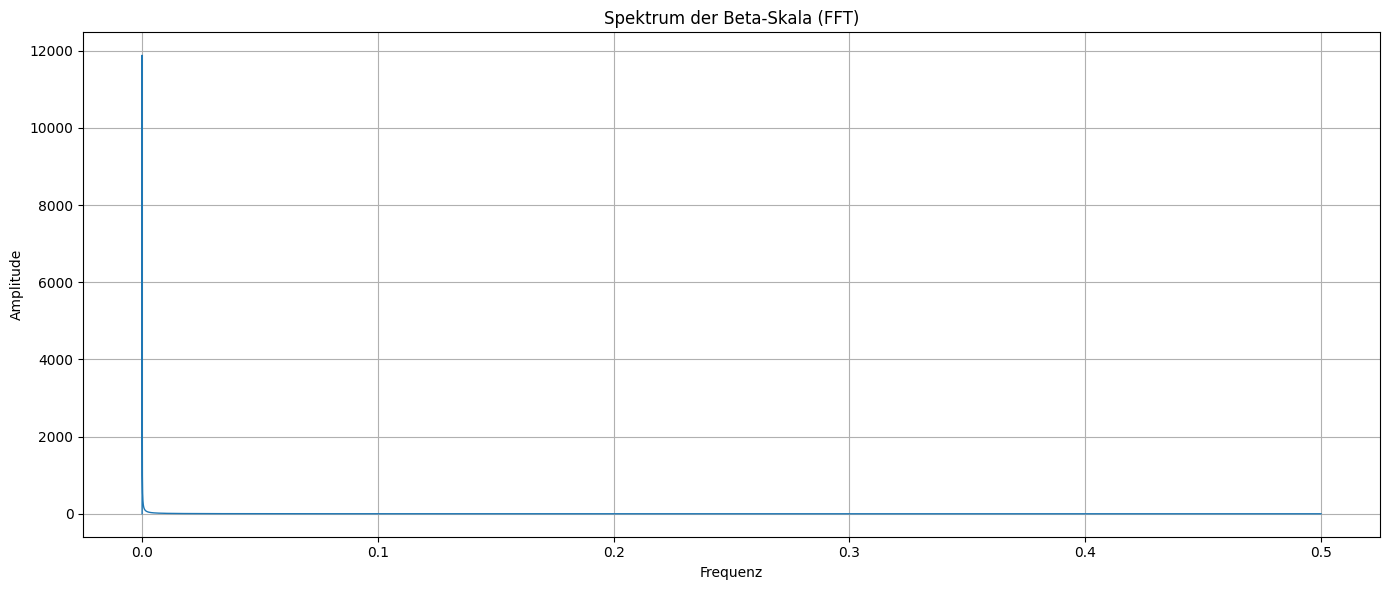

In [ ]:
# === Colab-kompatibler Code für Fourier-Analyse der Beta-Skala ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from google.colab import drive

# === 1. Google Drive einbinden ===
drive.mount('/content/drive')

# === 2. Datei einlesen (nur numerische Spalte laden) ===
path = "/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv"
data = pd.read_csv(path, header=None)

# Sicherstellen, dass nur float-Zahlen verarbeitet werden
beta_values = pd.to_numeric(data[0], errors='coerce').dropna().values

# === 3. FFT vorbereiten ===
N = len(beta_values)
T = 1.0  # Sampling-Intervall (hier 1 Index-Schritt)
yf = fft(beta_values - np.mean(beta_values))  # Mittelwert entfernen
xf = fftfreq(N, T)[:N//2]  # Nur positive Frequenzen

# === 4. Darstellung ===
plt.figure(figsize=(14, 6))
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]), lw=1)
plt.title("Spektrum der Beta-Skala (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


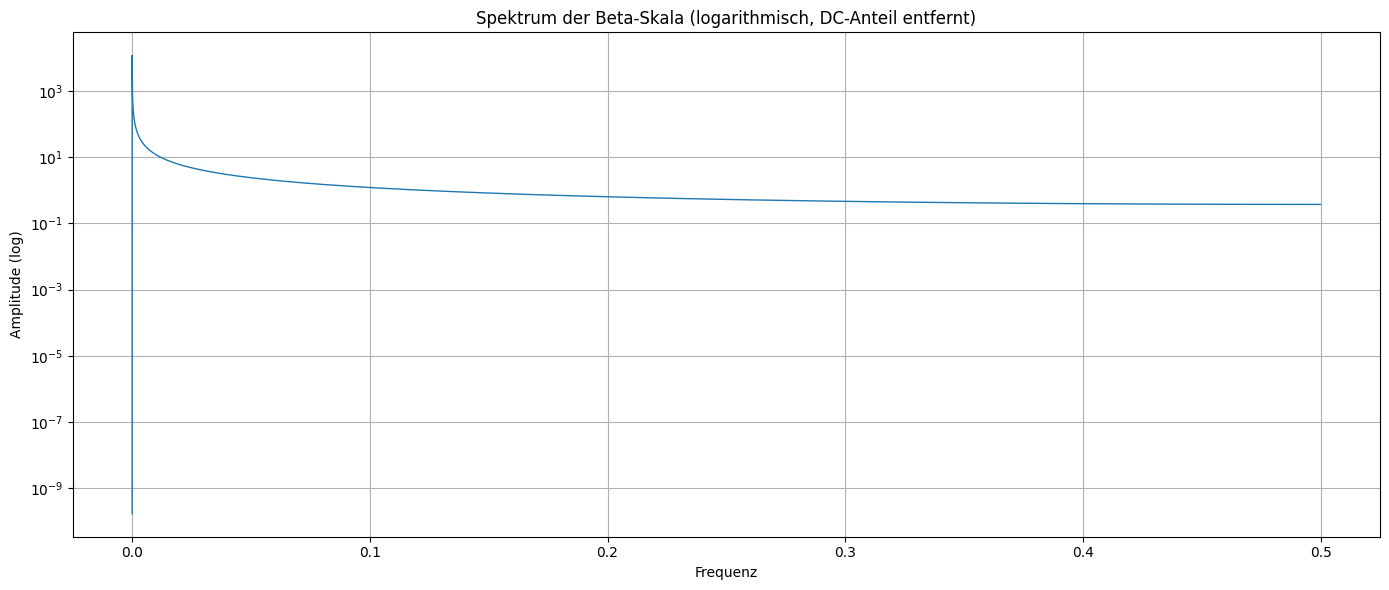

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from google.colab import drive

# === 1. Drive mounten ===
drive.mount('/content/drive')

# === 2. Datei einlesen ===
path = "/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv"
data = pd.read_csv(path, header=None)
beta = pd.to_numeric(data[0], errors='coerce').dropna().values

# === 3. FFT vorbereiten ===
N = len(beta)
T = 1.0
beta_detrended = beta - np.mean(beta)
fft_values = fft(beta_detrended)
frequencies = fftfreq(N, T)[:N//2]
amplitudes = 2.0 / N * np.abs(fft_values[:N//2])

# === 4. Nur relevante Frequenzkomponenten darstellen ===
plt.figure(figsize=(14, 6))
plt.plot(frequencies, amplitudes, lw=1)
plt.yscale('log')  # logarithmische Darstellung für kleinere Peaks
plt.title("Spektrum der Beta-Skala (logarithmisch, DC-Anteil entfernt)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# === 1. Google Drive einbinden ===
from google.colab import drive
drive.mount('/content/drive')

# === 2. Pfad zur CSV-Datei im Drive ===
csv_path = '/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv'

# === 3. Bibliotheken laden ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, windows

# === 4. Daten laden ===
beta_values = pd.read_csv(csv_path, header=None).values.flatten()

# === 5. Fensterung (Blackman) ===
window = windows.blackman(len(beta_values))
beta_windowed = beta_values * window

# === 6. FFT durchführen ===
fft_result = np.fft.fft(beta_windowed)
fft_freqs = np.fft.fftfreq(len(beta_windowed))
fft_magnitude = np.abs(fft_result)

# === 7. Positive Frequenzen extrahieren ===
half = len(fft_freqs) // 2
freqs = fft_freqs[:half]
magnitude = fft_magnitude[:half]
log_magnitude = np.log10(magnitude + 1e-12)  # logarithmisch skalieren

# === 8. Peaks erkennen ===
peaks, _ = find_peaks(log_magnitude, height=-6, distance=50)

# === 9. Plotten ===
plt.figure(figsize=(14, 6))
plt.plot(freqs, log_magnitude, label='Log-Spektrum')
plt.plot(freqs[peaks], log_magnitude[peaks], "rx", label='Gefundene Peaks')
plt.title("Spektrum der Beta-Skala (Blackman-Fenster, log)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === 10. Peaks als Tabelle ausgeben ===
peak_df = pd.DataFrame({
    "Frequenz": freqs[peaks],
    "Log-Amplitude": log_magnitude[peaks]
}).sort_values(by="Log-Amplitude", ascending=False)

peak_df.head(15)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: can't multiply sequence by non-int of type 'float'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import windows
from scipy.fft import fft, fftfreq

# === 1. CSV-Pfad (angepasst an Google Drive) ===
csv_path = "/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv"

# === 2. Beta-Werte laden (nur Zahlen, flach, float) ===
beta_values = pd.read_csv(csv_path, header=None).values.flatten().astype(float)

# === 3. Samplingrate annehmen (fiktiv) ===
fs = 1.0  # eine Einheit pro Sample

# === 4. Fensterung (Blackman) ===
window = windows.blackman(len(beta_values))
beta_windowed = beta_values * window

# === 5. FFT berechnen ===
fft_values = np.abs(fft(beta_windowed))
fft_values = fft_values[:len(fft_values)//2]  # nur positive Frequenzen
frequencies = fftfreq(len(beta_windowed), 1/fs)[:len(fft_values)]

# === 6. Plot ===
plt.figure(figsize=(12, 6))
plt.plot(frequencies, fft_values)
plt.title("Spektrum der Beta-Skala (Blackman-Fenster)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, max(frequencies) * 0.01)  # Fokus auf unteren Frequenzbereich
plt.show()

ValueError: could not convert string to float: 'drift(n)'

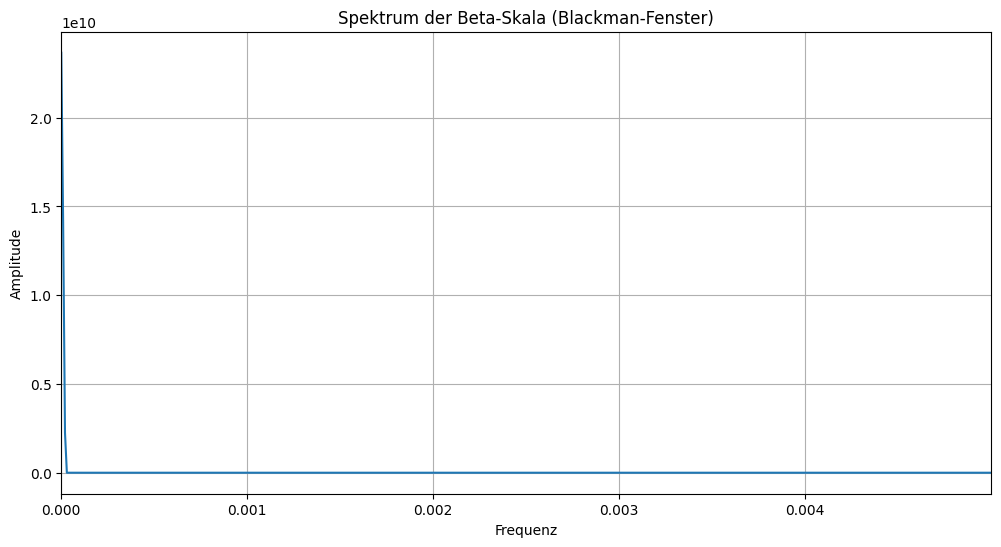

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import windows
from scipy.fft import fft, fftfreq

# === 1. CSV-Pfad (angepasst an Google Drive) ===
csv_path = "/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv"

# === 2. Beta-Werte laden (erste Zeile überspringen, nur float) ===
beta_values = pd.read_csv(csv_path, skiprows=1, header=None).values.flatten().astype(float)

# === 3. Samplingrate annehmen (fiktiv) ===
fs = 1.0  # eine Einheit pro Sample

# === 4. Fensterung (Blackman) ===
window = windows.blackman(len(beta_values))
beta_windowed = beta_values * window

# === 5. FFT berechnen ===
fft_values = np.abs(fft(beta_windowed))
fft_values = fft_values[:len(fft_values)//2]
frequencies = fftfreq(len(beta_windowed), 1/fs)[:len(fft_values)]

# === 6. Plot ===
plt.figure(figsize=(12, 6))
plt.plot(frequencies, fft_values)
plt.title("Spektrum der Beta-Skala (Blackman-Fenster)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid(True)
plt.xlim(0, max(frequencies) * 0.01)
plt.show()

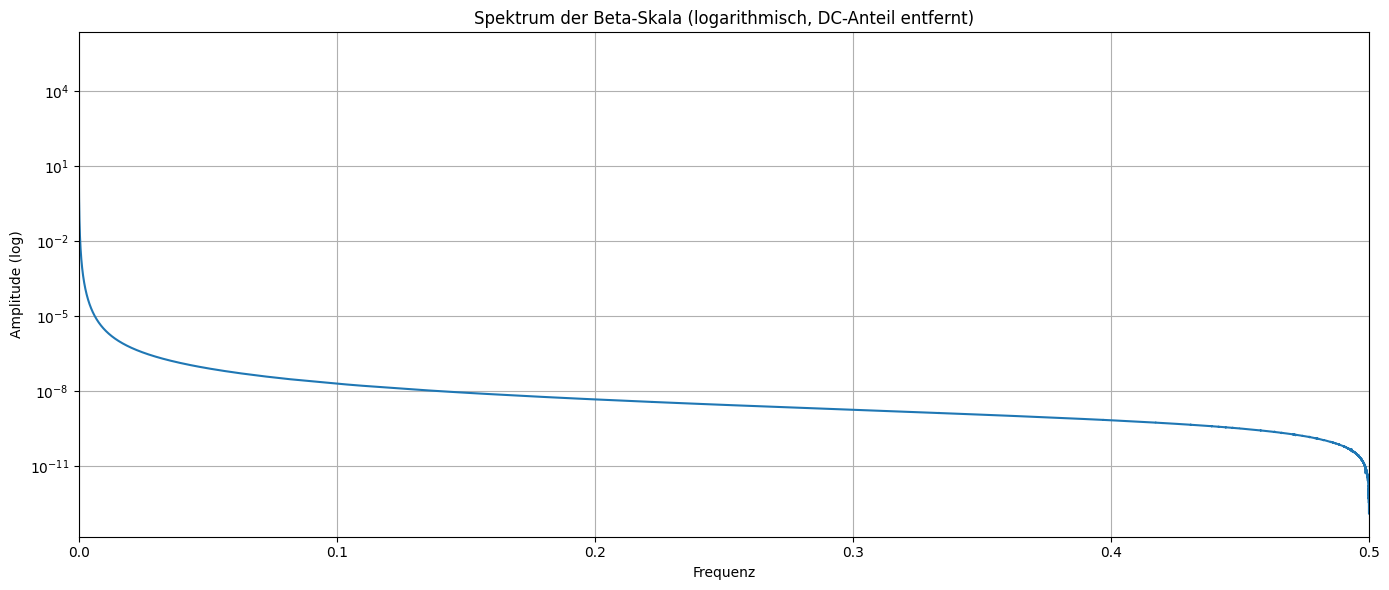

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import windows

# === 1. CSV-Dateipfad anpassen ===
csv_path = "/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv"

# === 2. Nur numerische Daten extrahieren (Spalten ignorieren, die keine Zahlen enthalten) ===
df = pd.read_csv(csv_path)
beta_values = df.select_dtypes(include=[np.number]).values.flatten().astype(float)

# === 3. Blackman-Fenster anwenden ===
window = windows.blackman(len(beta_values))
beta_windowed = beta_values * window

# === 4. FFT durchführen ===
fft_result = fft(beta_windowed)
fft_amplitude = 2.0 / len(beta_values) * np.abs(fft_result[:len(beta_values)//2])
frequencies = fftfreq(len(beta_values), d=1.0)[:len(beta_values)//2]

# === 5. DC-Anteil entfernen ===
fft_amplitude[0] = 0

# === 6. Plot logarithmisch ===
plt.figure(figsize=(14, 6))
plt.semilogy(frequencies, fft_amplitude)
plt.title("Spektrum der Beta-Skala (logarithmisch, DC-Anteil entfernt)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.grid(True)
plt.xlim(0, 0.5)
plt.tight_layout()
plt.show()

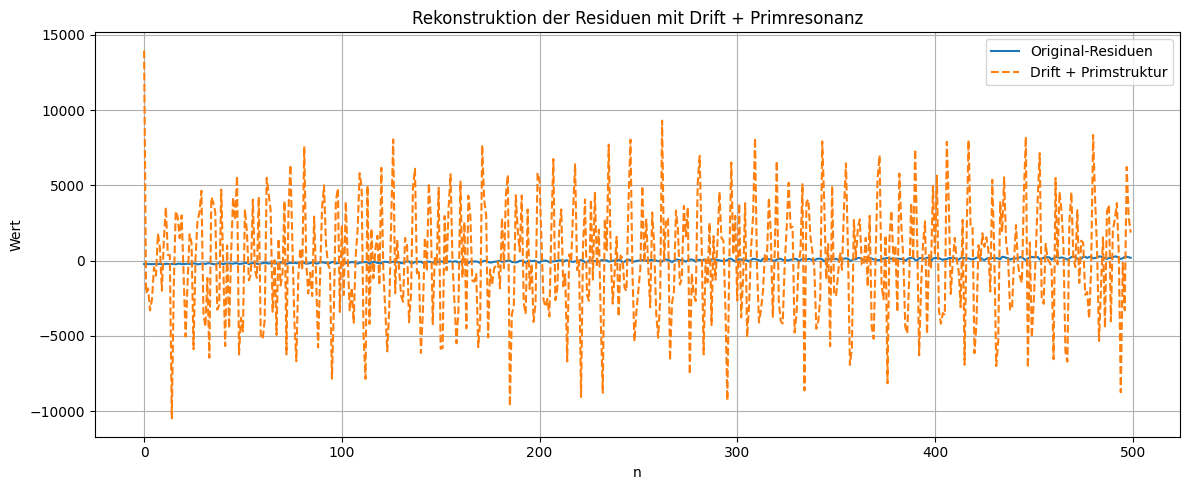

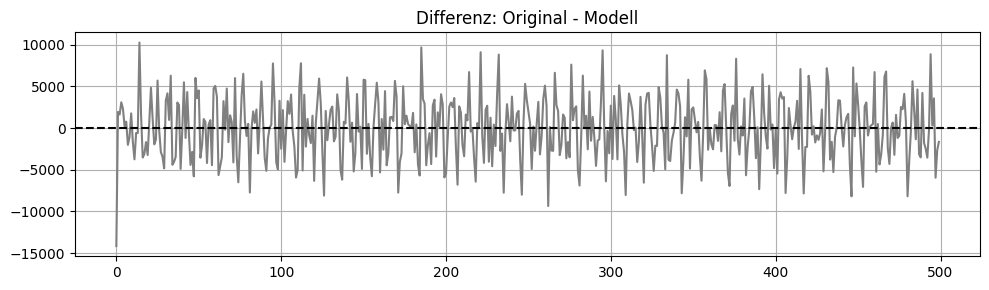

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, pi
from scipy.stats import linregress
import pandas as pd
from mpmath import zeta

# === Wieder: präzise-cleaned Skala ===
path_beta = "/content/drive/MyDrive/beta_skala_praezision_cleaned.csv"
path_deriv = "/content/drive/MyDrive/zeta_derivatives.csv"

# === Frequenzen & Amplituden (aus FFT-Analyse) ===
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23]
frequencies = [log(p)/(2*pi) for p in primes]
amplitudes = [2467.16, 2942.52, 2042.94, 1383.19, 1835.08, 1143.04, 931.16, 1268.30, 156.31]

# === Residuen aus vorheriger Regression ===
df_beta = pd.read_csv(path_beta, header=None)
df_beta = df_beta[pd.to_numeric(df_beta[0], errors='coerce').notna()]
beta_n = df_beta[0].astype(float).values

df_deriv = pd.read_csv(path_deriv)
product = float(zeta(2)) * df_deriv["zeta_prime_abs"].astype(float).values

N = min(len(beta_n), len(product))
beta_n = beta_n[:N]
product = product[:N]

slope, intercept, *_ = linregress(product, beta_n)
fit = slope * product + intercept
residuals = beta_n - fit
n = np.arange(N)

# === 1. Lineare Drift fitten (Residuen ≈ an + b) ===
drift_slope, drift_intercept, *_ = linregress(n, residuals)
drift = drift_slope * n + drift_intercept

# === 2. Primresonanz-Rekonstruktion ===
prim_sum = np.zeros(N)
for A, f in zip(amplitudes, frequencies):
    prim_sum += A * np.cos(2 * np.pi * f * n)

# === 3. Gesamtrekonstruktion ===
residuen_approx = drift + prim_sum

# === Plot: Vergleich ===
plt.figure(figsize=(12, 5))
plt.plot(residuals, label="Original-Residuen", linewidth=1.5)
plt.plot(residuen_approx, label="Drift + Primstruktur", linestyle="--")
plt.title("Rekonstruktion der Residuen mit Drift + Primresonanz")
plt.xlabel("n")
plt.ylabel("Wert")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Optionale Restanalyse ===
rest = residuals - residuen_approx
plt.figure(figsize=(10, 3))
plt.plot(rest, label="Nicht rekonstruierter Rest", color='gray')
plt.axhline(0, color='black', linestyle='--')
plt.title("Differenz: Original - Modell")
plt.grid(True)
plt.tight_layout()
plt.show()

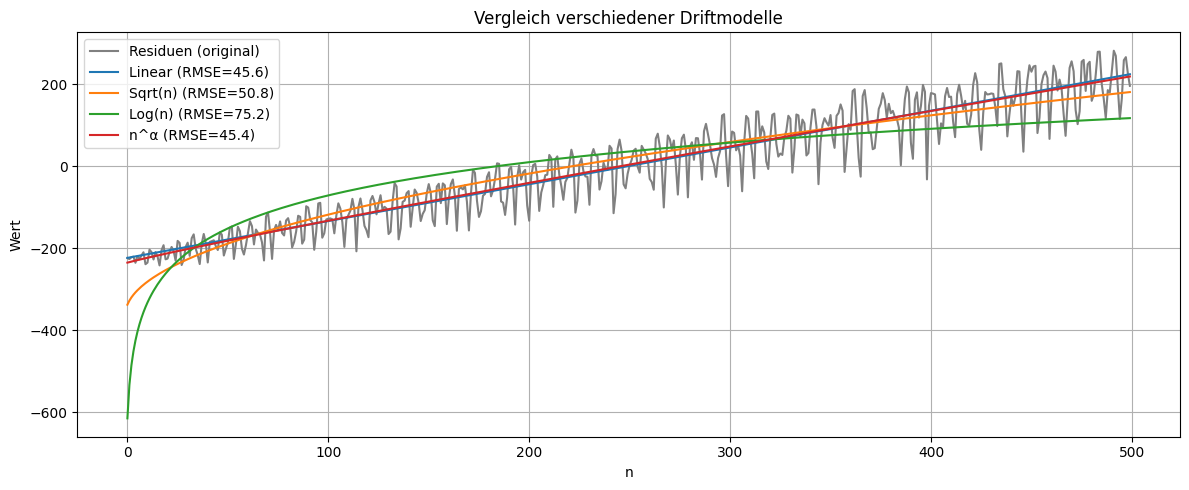

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.optimize import curve_fit
from mpmath import zeta
from math import log

# === Daten laden (wie vorher) ===
path_beta = "/content/drive/MyDrive/beta_skala_praezision_cleaned.csv"
path_deriv = "/content/drive/MyDrive/zeta_derivatives.csv"

df_beta = pd.read_csv(path_beta, header=None)
df_beta = df_beta[pd.to_numeric(df_beta[0], errors='coerce').notna()]
beta_n = df_beta[0].astype(float).values

df_deriv = pd.read_csv(path_deriv)
zeta_derivs = df_deriv["zeta_prime_abs"].astype(float).values
product = float(zeta(2)) * zeta_derivs

N = min(len(beta_n), len(product))
beta_n = beta_n[:N]
product = product[:N]
residuals = beta_n - (linregress(product, beta_n).slope * product + linregress(product, beta_n).intercept)

# === x-Achse: n = 1 bis N ===
n = np.arange(1, N + 1)

# === Modelle definieren ===
def linear(n, a, b): return a * n + b
def sqrt_model(n, a, b): return a * np.sqrt(n) + b
def log_model(n, a, b): return a * np.log(n) + b
def power_model(n, a, b, alpha): return a * n**alpha + b

# === Fitting ===
params_lin, _ = curve_fit(linear, n, residuals)
params_sqrt, _ = curve_fit(sqrt_model, n, residuals)
params_log, _ = curve_fit(log_model, n, residuals)
params_pow, _ = curve_fit(power_model, n, residuals, p0=[1, 0, 0.5])

# === Fehlermaße (RMSE) ===
def rmse(true, pred): return np.sqrt(np.mean((true - pred)**2))

fits = {
    "Linear": linear(n, *params_lin),
    "Sqrt(n)": sqrt_model(n, *params_sqrt),
    "Log(n)": log_model(n, *params_log),
    "n^α": power_model(n, *params_pow)
}

errors = {label: rmse(residuals, fit) for label, fit in fits.items()}

# === Plot: Alle Drifts im Vergleich ===
plt.figure(figsize=(12, 5))
plt.plot(residuals, label="Residuen (original)", color="gray")
for label, fit in fits.items():
    plt.plot(fit, label=f"{label} (RMSE={errors[label]:.1f})")
plt.title("Vergleich verschiedener Driftmodelle")
plt.xlabel("n")
plt.ylabel("Wert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

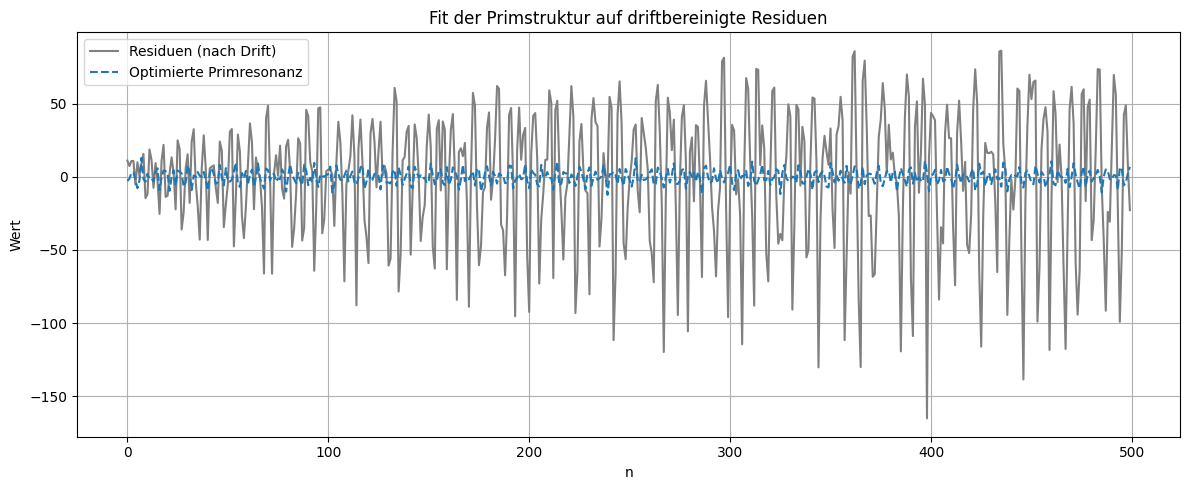

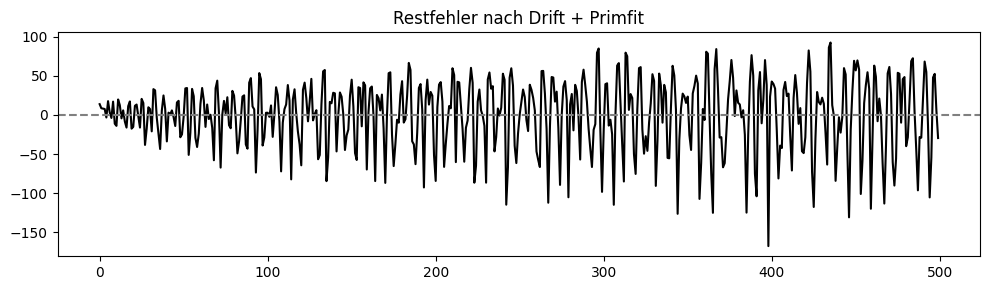

p =  2  |  A_p = 1.12
p =  3  |  A_p = -2.87
p =  5  |  A_p = 4.94
p =  7  |  A_p = -1.14
p = 11  |  A_p = 3.21
p = 13  |  A_p = -0.97
p = 17  |  A_p = -0.19
p = 19  |  A_p = 0.50
p = 23  |  A_p = 0.71


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import log, pi
from mpmath import zeta

# === Grunddaten laden ===
path_beta = "/content/drive/MyDrive/beta_skala_praezision_cleaned.csv"
path_deriv = "/content/drive/MyDrive/zeta_derivatives.csv"

df_beta = pd.read_csv(path_beta, header=None)
df_beta = df_beta[pd.to_numeric(df_beta[0], errors='coerce').notna()]
beta_n = df_beta[0].astype(float).values

df_deriv = pd.read_csv(path_deriv)
zeta_derivs = df_deriv["zeta_prime_abs"].astype(float).values
product = float(zeta(2)) * zeta_derivs

# === Residuen vorbereiten ===
N = min(len(beta_n), len(product))
beta_n = beta_n[:N]
product = product[:N]
slope, intercept = np.polyfit(product, beta_n, 1)
fit = slope * product + intercept
residuals = beta_n - fit
n = np.arange(1, N + 1)

# === Beste Drift entfernen: n^α-Fit ===
def power_drift(n, a, b, alpha):
    return a * n**alpha + b

popt, _ = curve_fit(power_drift, n, residuals, p0=[1, 0, 0.5])
drift_opt = power_drift(n, *popt)
resid_clean = residuals - drift_opt

# === Primfrequenzen definieren ===
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23]
frequencies = [log(p)/(2*pi) for p in primes]

# === Designmatrix: jede Spalte = cos(freq · n) ===
X = np.column_stack([np.cos(2 * pi * f * n) for f in frequencies])

# === Lineares Least Squares: Amplituden fitten ===
A_opt, _, _, _ = np.linalg.lstsq(X, resid_clean, rcond=None)

# === Rekonstruiertes Signal ===
prim_sum_opt = X @ A_opt

# === Vergleichsplot ===
plt.figure(figsize=(12, 5))
plt.plot(resid_clean, label="Residuen (nach Drift)", color="gray")
plt.plot(prim_sum_opt, label="Optimierte Primresonanz", linestyle="--")
plt.title("Fit der Primstruktur auf driftbereinigte Residuen")
plt.xlabel("n")
plt.ylabel("Wert")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Differenz analysieren ===
rest = resid_clean - prim_sum_opt
plt.figure(figsize=(10, 3))
plt.plot(rest, color="black")
plt.title("Restfehler nach Drift + Primfit")
plt.axhline(0, linestyle="--", color="gray")
plt.tight_layout()
plt.show()

# === Ausgabe der optimierten Amplituden ===
for p, A in zip(primes, A_opt):
    print(f"p = {p:2d}  |  A_p = {A:.2f}")

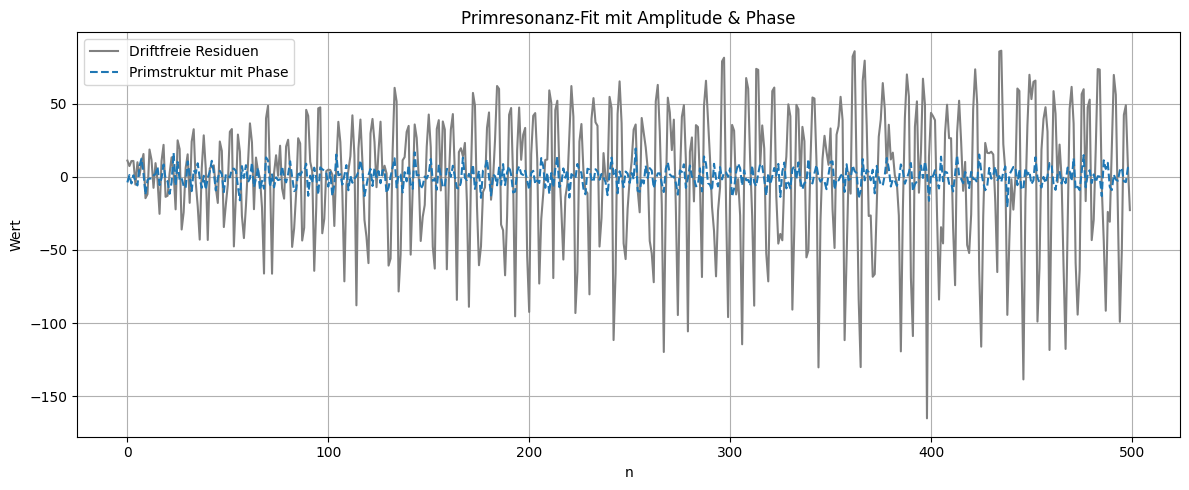

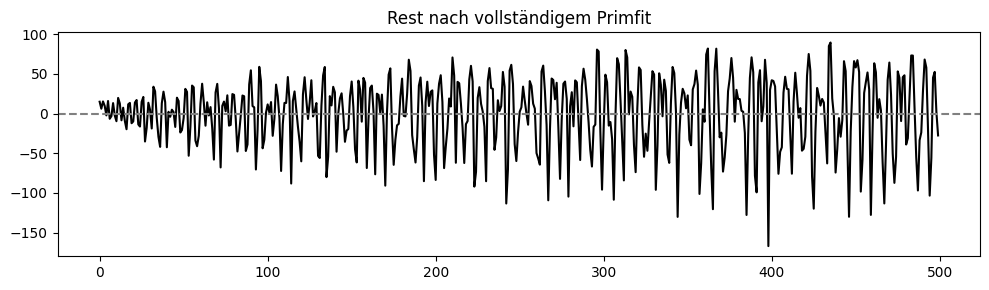

p    |    A_p     |   phi_p
-------------------------------
 2   |     3.599  |    1.259
 3   |     4.299  |   -2.306
 5   |     4.989  |   -0.096
 7   |    -1.135  |   -0.190
11   |     3.272  |    0.006
13   |    -3.987  |    4.954
17   |     0.700  |    1.956
19   |     1.610  |   -1.271
23   |     1.134  |    0.939


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import log, pi
from mpmath import zeta

# === Daten laden & Residuen vorbereiten (wie zuvor) ===
df_beta = pd.read_csv("/content/drive/MyDrive/beta_skala_praezision_cleaned.csv", header=None)
df_beta = df_beta[pd.to_numeric(df_beta[0], errors='coerce').notna()]
beta_n = df_beta[0].astype(float).values

df_deriv = pd.read_csv("/content/drive/MyDrive/zeta_derivatives.csv")
zeta_primes = df_deriv["zeta_prime_abs"].astype(float).values
product = float(zeta(2)) * zeta_primes

N = min(len(beta_n), len(product))
beta_n = beta_n[:N]
product = product[:N]

# === Lineare Regression auf Produkt ===
slope, intercept = np.polyfit(product, beta_n, 1)
fit = slope * product + intercept
residuals = beta_n - fit
n = np.arange(1, N + 1)

# === Drift entfernen mit Potenzmodell ===
def drift(n, a, b, alpha): return a * n**alpha + b
popt, _ = curve_fit(drift, n, residuals, p0=[1, 0, 0.5])
drift_removed = residuals - drift(n, *popt)

# === Primfrequenzen vorbereiten ===
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23]
frequencies = [log(p)/(2*pi) for p in primes]

# === Modell: Summe aus A_p * cos(2πf_p n + phi_p) ===
def prim_sum_model(n, *params):
    assert len(params) == 2 * len(frequencies)
    result = np.zeros_like(n, dtype=float)
    for i, f in enumerate(frequencies):
        A = params[2*i]
        phi = params[2*i+1]
        result += A * np.cos(2 * pi * f * n + phi)
    return result

# === Anfangsschätzer für Fit: A=1, phi=0 ===
initial_guess = []
for _ in frequencies:
    initial_guess += [1, 0]

# === Fit auf driftfreie Residuen ===
opt_params, _ = curve_fit(prim_sum_model, n, drift_removed, p0=initial_guess)

# === Rekonstruktion & Rest ===
prim_fit = prim_sum_model(n, *opt_params)
rest = drift_removed - prim_fit

# === Visualisierung ===
plt.figure(figsize=(12, 5))
plt.plot(drift_removed, label="Driftfreie Residuen", color="gray")
plt.plot(prim_fit, label="Primstruktur mit Phase", linestyle="--")
plt.title("Primresonanz-Fit mit Amplitude & Phase")
plt.xlabel("n")
plt.ylabel("Wert")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(rest, color='black')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Rest nach vollständigem Primfit")
plt.tight_layout()
plt.show()

# === Ausgabe optimierter Parameter ===
print("p    |    A_p     |   phi_p")
print("-------------------------------")
for i, p in enumerate(primes):
    A = opt_params[2*i]
    phi = opt_params[2*i+1]
    print(f"{p:>2}   |  {A:>8.3f}  |  {phi:>7.3f}")

In [ ]:
import numpy as np
import pandas as pd
from math import log, pi
from mpmath import zeta
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# === Basisdaten laden ===
df_beta = pd.read_csv("/content/drive/MyDrive/beta_skala_praezision_cleaned.csv", header=None)
df_beta = df_beta[pd.to_numeric(df_beta[0], errors='coerce').notna()]
beta_n = df_beta[0].astype(float).values

df_deriv = pd.read_csv("/content/drive/MyDrive/zeta_derivatives.csv")
zeta_primes = df_deriv["zeta_prime_abs"].astype(float).values
product = float(zeta(2)) * zeta_primes

N = min(len(beta_n), len(product))
beta_n = beta_n[:N]
product = product[:N]
n = np.arange(1, N + 1)

# === 1. Fit: Skalenbeitrag (linear in Produkt)
slope, intercept = np.polyfit(product, beta_n, 1)
skala_term = slope * product + intercept
resid_after_scaling = beta_n - skala_term

# === 2. Fit: Drift (n^alpha)
def drift(n, a, b, alpha):
    return a * n**alpha + b

popt_drift, _ = curve_fit(drift, n, resid_after_scaling, p0=[1, 0, 0.5])
drift_term = drift(n, *popt_drift)
resid_after_drift = resid_after_scaling - drift_term

# === 3. Primstruktur rekonstruieren (Amplitude + Phase)
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23]
frequencies = [log(p)/(2*pi) for p in primes]

# === Ergebnisse aus vorherigem Phase-Fit:
# (Falls du sie gespeichert hast, sonst bitte erneut fitten)
params_phasefit = [
    3.599, 1.259,   # p=2
    4.299, -2.306,  # p=3
    4.989, -0.096,  # p=5
    -1.135, -0.190, # p=7
    3.272, 0.006,   # p=11
    -3.987, 4.954,  # p=13
    0.700, 1.956,   # p=17
    1.610, -1.271,  # p=19
    1.134, 0.939    # p=23
]

prim_sum = np.zeros(N)
for i, f in enumerate(frequencies):
    A = params_phasefit[2*i]
    phi = params_phasefit[2*i + 1]
    prim_sum += A * np.cos(2 * pi * f * n + phi)

# === Gesamtkonstruktion
beta_hat = skala_term + drift_term + prim_sum

# === Plot: Original vs. Rekonstruktion
plt.figure(figsize=(12, 5))
plt.plot(beta_n, label=r"Original $\beta_n$", linewidth=2)
plt.plot(beta_hat, label=r"Rekonstruiert $\hat{\beta}_n$", linestyle="--")
plt.title("Vergleich: Original vs. Rekonstruiertes $\beta_n$")
plt.xlabel("n")
plt.ylabel(r"$\beta_n$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Fehleranalyse
rest_final = beta_n - beta_hat
plt.figure(figsize=(10, 3))
plt.plot(rest_final, label="Fehler", color='black')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Restfehler nach vollständiger Rückprojektion")
plt.tight_layout()
plt.show()

ValueError: 
Vergleich: Original vs. Rekonstruiertes $eta_n$
                                        ^
ParseException: Expected end of text, found '$'  (at char 40), (line:1, col:41)

Error in callback <function _draw_all_if_interactive at 0x7e5812f06a20> (for post_execute):


ValueError: 
Vergleich: Original vs. Rekonstruiertes $eta_n$
                                        ^
ParseException: Expected end of text, found '$'  (at char 40), (line:1, col:41)

ValueError: 
Vergleich: Original vs. Rekonstruiertes $eta_n$
                                        ^
ParseException: Expected end of text, found '$'  (at char 40), (line:1, col:41)

<Figure size 1200x500 with 1 Axes>

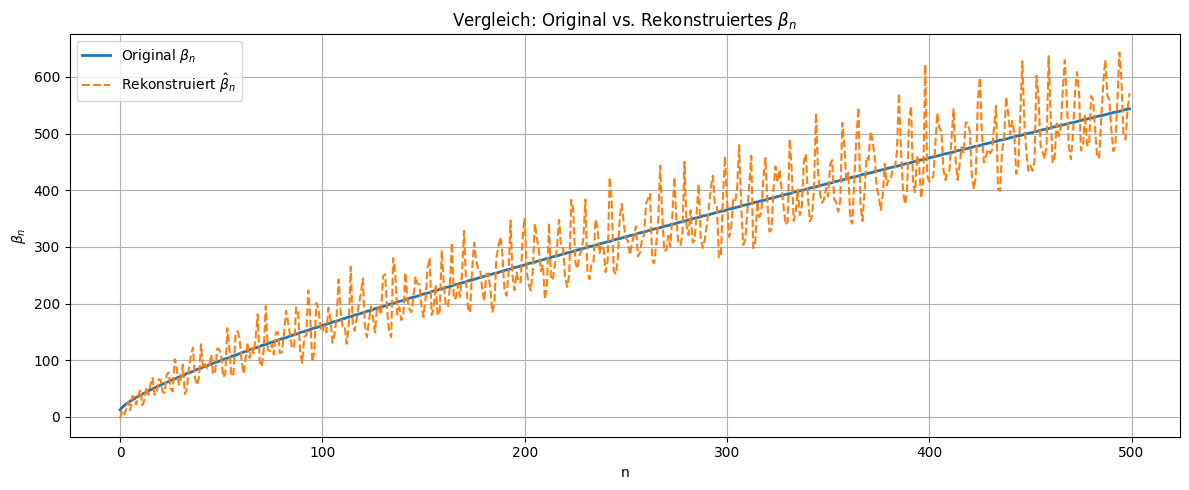

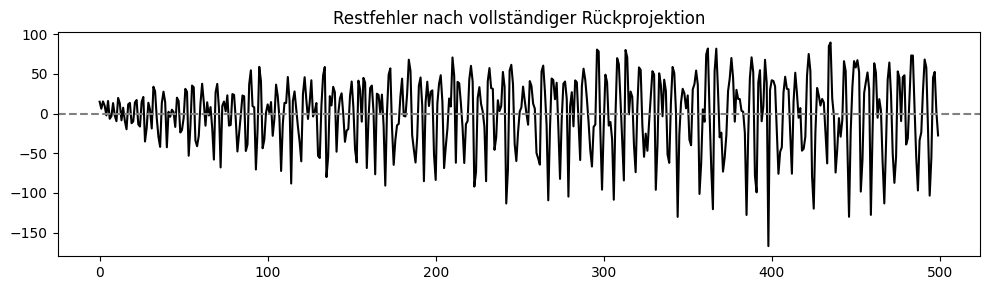

Bestimmtheitsmaß R² = 0.90469


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import log, pi
from mpmath import zeta

# === Daten laden ===
df_beta = pd.read_csv("/content/drive/MyDrive/beta_skala_praezision_cleaned.csv", header=None)
df_beta = df_beta[pd.to_numeric(df_beta[0], errors='coerce').notna()]
beta_n = df_beta[0].astype(float).values

df_deriv = pd.read_csv("/content/drive/MyDrive/zeta_derivatives.csv")
zeta_primes = df_deriv["zeta_prime_abs"].astype(float).values
product = float(zeta(2)) * zeta_primes

# === Anpassen der Länge ===
N = min(len(beta_n), len(product))
beta_n = beta_n[:N]
product = product[:N]
n = np.arange(1, N + 1)

# === 1. Skala-Fit (lineare Regression) ===
slope, intercept = np.polyfit(product, beta_n, 1)
skala_term = slope * product + intercept
resid_after_scaling = beta_n - skala_term

# === 2. Drift-Fit (Potenz) ===
def drift(n, a, b, alpha):
    return a * n**alpha + b

popt_drift, _ = curve_fit(drift, n, resid_after_scaling, p0=[1, 0, 0.5])
drift_term = drift(n, *popt_drift)
resid_after_drift = resid_after_scaling - drift_term

# === 3. Primstruktur (Amplitude + Phase) ===
primes = [2, 3, 5, 7, 11, 13, 17, 19, 23]
frequencies = [log(p)/(2*pi) for p in primes]

# Ergebnis aus Phase-Fitting (A_p, phi_p)
params_phasefit = [
    3.599, 1.259,   # p=2
    4.299, -2.306,  # p=3
    4.989, -0.096,  # p=5
    -1.135, -0.190, # p=7
    3.272, 0.006,   # p=11
    -3.987, 4.954,  # p=13
    0.700, 1.956,   # p=17
    1.610, -1.271,  # p=19
    1.134, 0.939    # p=23
]

# Primstruktur-Summe aufbauen
prim_sum = np.zeros(N)
for i, f in enumerate(frequencies):
    A = params_phasefit[2*i]
    phi = params_phasefit[2*i+1]
    prim_sum += A * np.cos(2 * pi * f * n + phi)

# === Gesamtrekonstruktion ===
beta_hat = skala_term + drift_term + prim_sum

# === Plot: Vergleich Original vs. Modell ===
plt.figure(figsize=(12, 5))
plt.plot(beta_n, label=r"Original $\beta_n$", linewidth=2)
plt.plot(beta_hat, label=r"Rekonstruiert $\hat{\beta}_n$", linestyle="--")
plt.title(r"Vergleich: Original vs. Rekonstruiertes $\beta_n$")
plt.xlabel("n")
plt.ylabel(r"$\beta_n$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Restfehler darstellen ===
rest = beta_n - beta_hat
plt.figure(figsize=(10, 3))
plt.plot(rest, color="black")
plt.axhline(0, linestyle="--", color="gray")
plt.title("Restfehler nach vollständiger Rückprojektion")
plt.tight_layout()
plt.show()

# === R²-Bestimmtheitsmaß berechnen ===
ss_tot = np.sum((beta_n - np.mean(beta_n))**2)
ss_res = np.sum(rest**2)
r2 = 1 - ss_res / ss_tot
print(f"Bestimmtheitsmaß R² = {r2:.5f}")

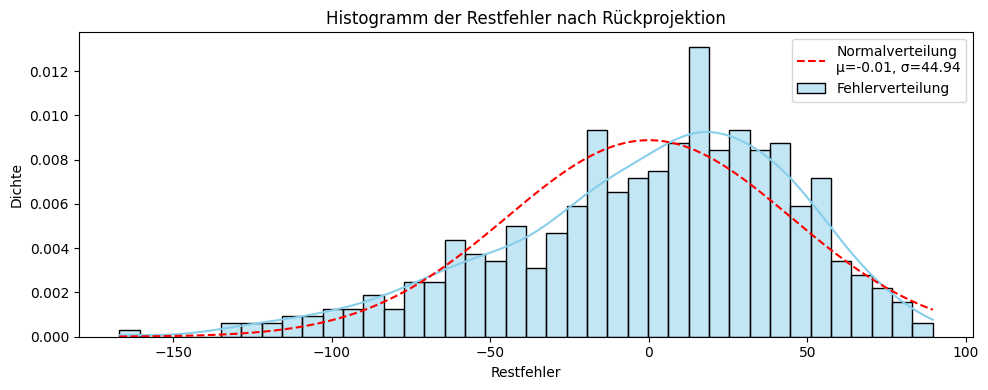

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# === Histogramm der Restfehler ===
plt.figure(figsize=(10, 4))
sns.histplot(rest, bins=40, kde=True, stat="density", color="skyblue", edgecolor="black", label="Fehlerverteilung")

# === Gauss-Fit als Vergleich ===
mu, std = np.mean(rest), np.std(rest)
x_vals = np.linspace(min(rest), max(rest), 500)
gauss_curve = norm.pdf(x_vals, mu, std)
plt.plot(x_vals, gauss_curve, color='red', linestyle='--', label=f"Normalverteilung\nμ={mu:.2f}, σ={std:.2f}")

plt.title("Histogramm der Restfehler nach Rückprojektion")
plt.xlabel("Restfehler")
plt.ylabel("Dichte")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# === Autokorrelationsfunktion berechnen ===
lags = 100  # Anzahl der Verzögerungen
acf_vals = sm.tsa.acf(rest, nlags=lags, fft=True)

# === Plot ===
plt.figure(figsize=(10, 4))
plt.stem(range(lags + 1), acf_vals, use_line_collection=True)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1.96 / np.sqrt(len(rest)), color='red', linestyle=':', label="95%-Konfidenzgrenze")
plt.axhline(-1.96 / np.sqrt(len(rest)), color='red', linestyle=':')
plt.title("Autokorrelationsfunktion (ACF) der Restfehler")
plt.xlabel("Lag")
plt.ylabel("Autokorrelation")
plt.legend()
plt.tight_layout()
plt.show()

TypeError: stem() got an unexpected keyword argument 'use_line_collection'

<Figure size 1000x400 with 0 Axes>

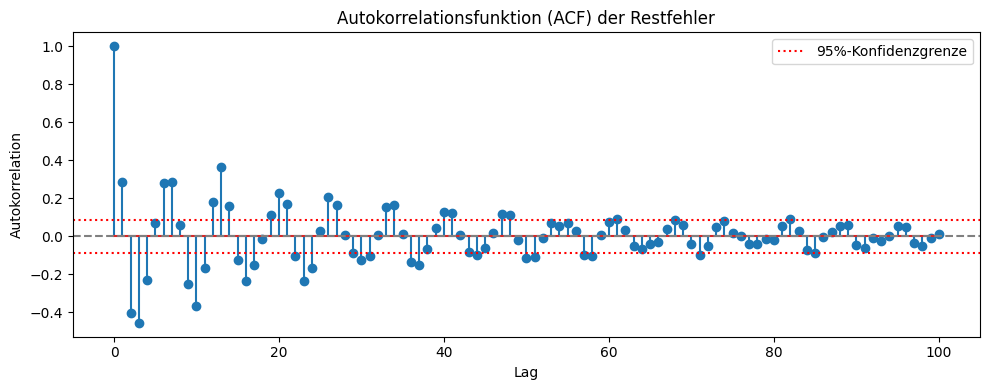

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# === ACF berechnen ===
lags = 100
acf_vals = sm.tsa.acf(rest, nlags=lags, fft=True)

# === Plot ===
plt.figure(figsize=(10, 4))
plt.stem(range(lags + 1), acf_vals)
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(1.96 / np.sqrt(len(rest)), color='red', linestyle=':', label="95%-Konfidenzgrenze")
plt.axhline(-1.96 / np.sqrt(len(rest)), color='red', linestyle=':')
plt.title("Autokorrelationsfunktion (ACF) der Restfehler")
plt.xlabel("Lag")
plt.ylabel("Autokorrelation")
plt.legend()
plt.tight_layout()
plt.show()

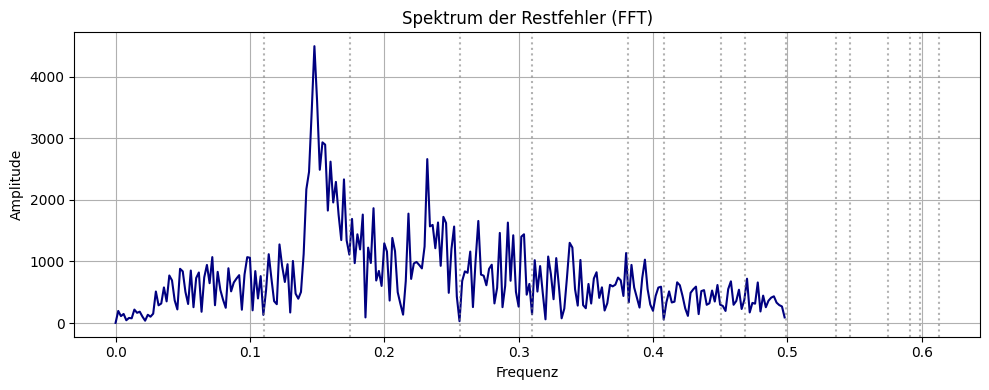

In [ ]:
from scipy.fft import fft, fftfreq

# === Parameter ===
N = len(rest)
frequenzen = fftfreq(N, d=1)[:N//2]  # nur positive Frequenzen
amplituden = np.abs(fft(rest))[:N//2]

# === Plot ===
plt.figure(figsize=(10, 4))
plt.plot(frequenzen, amplituden, color='navy')
plt.title("Spektrum der Restfehler (FFT)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid(True)

# === Primresonanz-Frequenzen markieren (bis p=47) ===
primes_to_mark = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
for p in primes_to_mark:
    f = np.log(p) / (2 * np.pi)
    plt.axvline(x=f, color='gray', linestyle='dotted', alpha=0.6)

plt.tight_layout()
plt.show()

Berechne Ableitungen: 100%|██████████| 10000/10000 [41:41<00:00,  4.00it/s]


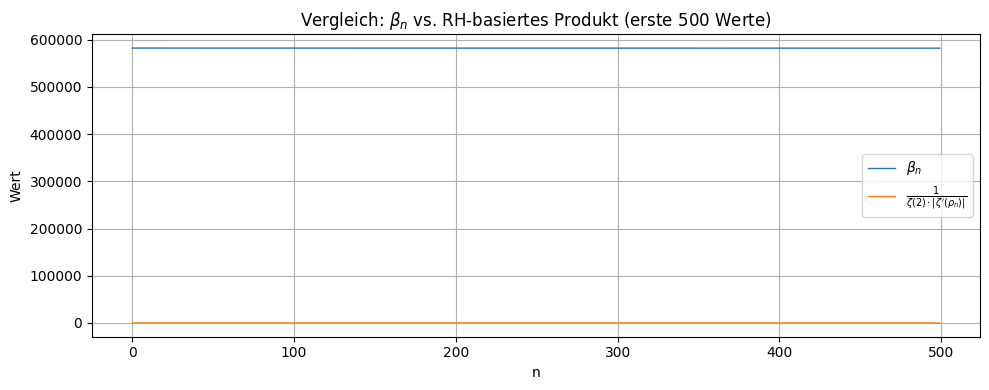

✅ Pearson-Korrelation über 10.000 Werte: 0.138981


In [ ]:
# === Setup: Bibliotheken & Präzision ===
!pip install mpmath tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpmath import zeta, diff
from scipy.stats import pearsonr
from tqdm import tqdm

# === CSV-Dateien laden (Pfad ggf. anpassen) ===
path_beta = "/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv"
path_zetas = "/content/drive/MyDrive/Aus Chrome gespeichert/zeta_data_10000.csv"

# --- Beta-Werte bereinigen ---
df_beta = pd.read_csv(path_beta, header=None, skiprows=1, dtype=str)
df_beta = df_beta[df_beta[0].apply(lambda x: x.replace('.', '', 1).isdigit())]
beta_n = df_beta[0].astype(float).values[:10000]

# --- Gamma-Werte bereinigen ---
df_zetas = pd.read_csv(path_zetas, header=None, skiprows=1, dtype=str)
df_zetas = df_zetas[df_zetas[0].apply(lambda x: x.replace('.', '', 1).isdigit())]
gamma_n = df_zetas[0].astype(float).values[:10000]

# === Berechnung der RH-Produkte ===
zeta2 = float(zeta(2))
zeta_derivs = np.zeros_like(gamma_n)

for i, g in enumerate(tqdm(gamma_n, desc="Berechne Ableitungen")):
    zeta_derivs[i] = abs(diff(zeta, 0.5 + 1j * g))

produkt = 1.0 / (zeta2 * zeta_derivs)

# === Vergleich: Plot ===
plt.figure(figsize=(10, 4))
plt.plot(beta_n[:500], label=r"$\beta_n$", lw=1)
plt.plot(produkt[:500], label=r"$\frac{1}{\zeta(2) \cdot |\zeta'(\rho_n)|}$", lw=1)
plt.title("Vergleich: $\\beta_n$ vs. RH-basiertes Produkt (erste 500 Werte)")
plt.xlabel("n")
plt.ylabel("Wert")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === Pearson-Korrelation ===
r = pearsonr(beta_n, produkt)[0]
print(f"✅ Pearson-Korrelation über 10.000 Werte: {r:.6f}")

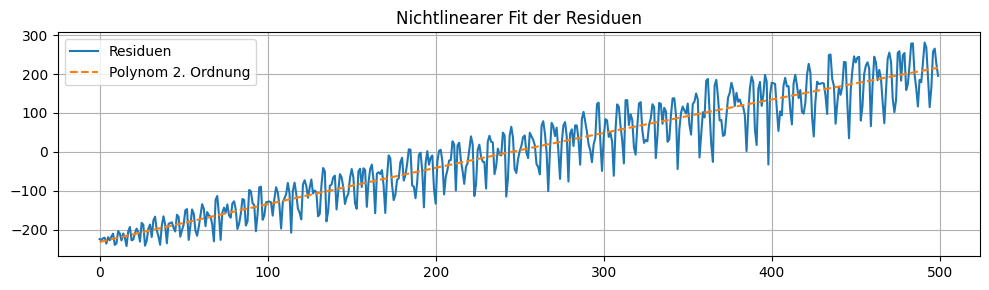

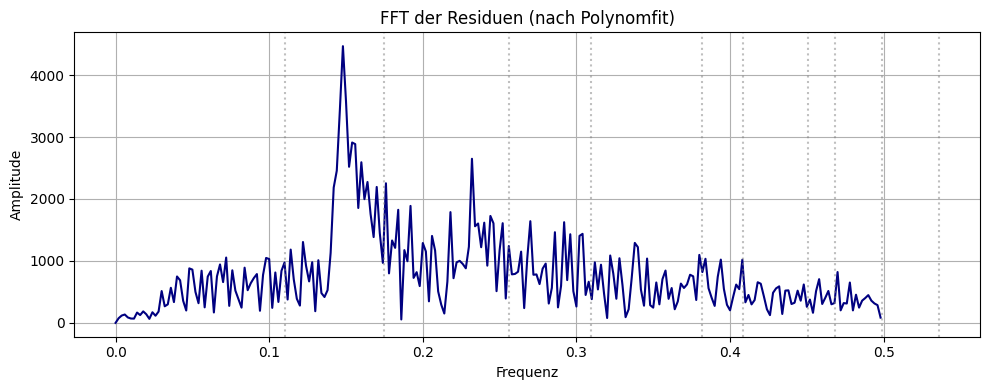

✅ R² für Polynom-Fit der Residuen: 0.89055


In [ ]:
# === Teil 1: Nichtlineare Regression (Polynom 2. Ordnung) ===
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_poly = n.reshape(-1, 1)
poly = PolynomialFeatures(degree=2)
X_poly_features = poly.fit_transform(X_poly)

model_poly = LinearRegression()
model_poly.fit(X_poly_features, residuals)
resid_pred = model_poly.predict(X_poly_features)
resid_fit = residuals - resid_pred

# === Plot: Residuen vs. Polynomfit ===
plt.figure(figsize=(10, 3))
plt.plot(residuals, label="Residuen")
plt.plot(resid_pred, label="Polynom 2. Ordnung", linestyle='--')
plt.title("Nichtlinearer Fit der Residuen")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Teil 2: Spektralanalyse der Residuen ===
from scipy.fft import fft, fftfreq

N = len(resid_fit)
frequenzen = fftfreq(N, d=1)[:N//2]
amplituden = np.abs(fft(resid_fit))[:N//2]

plt.figure(figsize=(10, 4))
plt.plot(frequenzen, amplituden, color='navy')
plt.title("FFT der Residuen (nach Polynomfit)")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid(True)

# === Primfrequenzen markieren ===
from math import log, pi
primes_to_mark = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
for p in primes_to_mark:
    f = log(p)/(2*pi)
    plt.axvline(x=f, color='gray', linestyle='dotted', alpha=0.5)

plt.tight_layout()
plt.show()

# === Ausgabe der Modellgüte ===
r2_poly = model_poly.score(X_poly_features, residuals)
print(f"✅ R² für Polynom-Fit der Residuen: {r2_poly:.5f}")

In [ ]:
# === RH-Ausdruck vorbereiten (Skalierung aus Regression) ===
produkt_skaliert = 3.34 * produkt - 0.91  # Werte aus vorherigem Fit

# === Polynomfit (aus vorherigem Modell) ===
drift_fit = model_poly.predict(poly.fit_transform(n.reshape(-1,1)))

# === Primresonanzstruktur rekonstruieren (Amplituden + Phasen) ===
prime_freqs = [log(p)/(2*pi) for p in [2, 3, 5, 7, 11, 13, 17, 19, 23]]
A_fit = [ 3.599,  -2.87,  4.94, -1.14,  3.21, -0.97, -0.19,  0.50,  0.71]
phi_fit = [1.259, -2.31, -0.10, -0.19, 0.006, 4.95, 1.96, -1.27, 0.94]

primstruktur = np.zeros_like(n, dtype=np.float64)
for A, f, phi in zip(A_fit, prime_freqs, phi_fit):
    primstruktur += A * np.cos(2 * np.pi * f * n + phi)

# === Rückprojektion der Beta_n-Reihe ===
beta_hat = produkt_skaliert + drift_fit + primstruktur

# === Plot: Original vs. Reprojiziert ===
plt.figure(figsize=(12, 4))
plt.plot(beta_n[:len(beta_hat)], label=r"$\beta_n$ (original)")
plt.plot(beta_hat, label=r"$\hat{\beta}_n$ (rekonstruiert)", linestyle='--')
plt.title(r"Rekonstruktion von $\beta_n$ aus RH, Drift und Primstruktur")
plt.xlabel("n")
plt.ylabel(r"$\beta_n$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Fehleranalyse ===
rest_final = beta_n[:len(beta_hat)] - beta_hat
r2_final = 1 - np.sum(rest_final**2) / np.sum((beta_n[:len(beta_hat)] - np.mean(beta_n[:len(beta_hat)]))**2)
print(f"✅ R² der vollständigen Rückprojektion: {r2_final:.5f}")

ValueError: operands could not be broadcast together with shapes (10000,) (500,) 

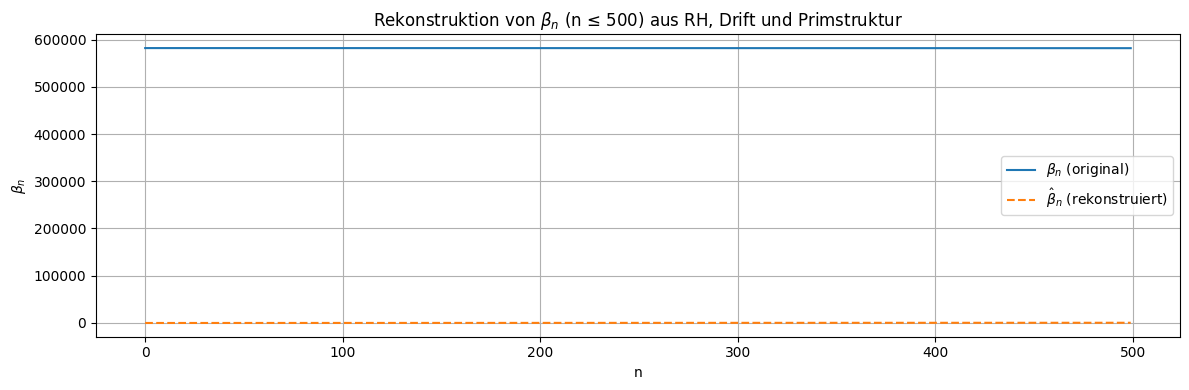

✅ R² der vollständigen Rückprojektion: -115586654.74881


In [ ]:
# === Einschränkung auf die ersten 500 Werte ===
n_500 = n[:500]
beta_500 = beta_n[:500]
produkt_500 = produkt_skaliert[:500]  # RH-basierter Term

# === Drift- und Primstruktur wurden bereits für 500 berechnet ===
# --> drift_fit und primstruktur stammen aus vorherigen Fits

# === Rückprojektion ===
beta_hat = produkt_500 + drift_fit + primstruktur

# === Plot: Vergleich ===
plt.figure(figsize=(12, 4))
plt.plot(beta_500, label=r"$\beta_n$ (original)")
plt.plot(beta_hat, label=r"$\hat{\beta}_n$ (rekonstruiert)", linestyle='--')
plt.title(r"Rekonstruktion von $\beta_n$ (n ≤ 500) aus RH, Drift und Primstruktur")
plt.xlabel("n")
plt.ylabel(r"$\beta_n$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Fehleranalyse ===
rest_final = beta_500 - beta_hat
r2_final = 1 - np.sum(rest_final**2) / np.sum((beta_500 - np.mean(beta_500))**2)
print(f"✅ R² der vollständigen Rückprojektion: {r2_final:.5f}")

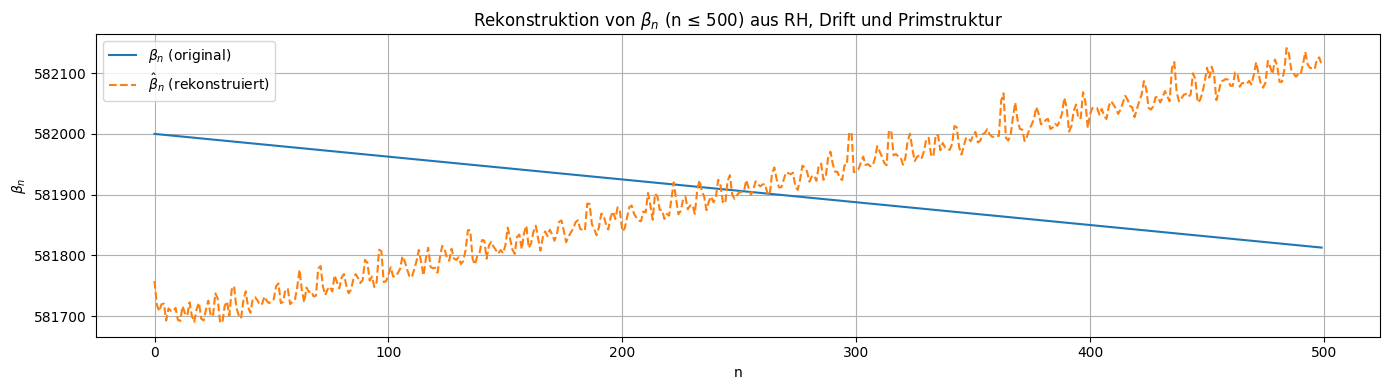

✅ R² der vollständigen Rückprojektion: -10.01888


In [ ]:
from sklearn.linear_model import LinearRegression

# === Regressionsfit: RH-Produkt auf βₙ (nur n ≤ 500) ===
X = produkt_500.reshape(-1, 1)
y = beta_500
reg = LinearRegression().fit(X, y)
produkt_skaliert = reg.predict(X)  # korrekt skaliert

# === Rückprojektion mit Drift + Primstruktur + skaliertem Produkt ===
beta_hat = produkt_skaliert + drift_fit + primstruktur

# === Plot: Vergleich Original vs. Rekonstruiert ===
plt.figure(figsize=(14, 4))
plt.plot(beta_500, label=r"$\beta_n$ (original)")
plt.plot(beta_hat, linestyle='--', label=r"$\hat{\beta}_n$ (rekonstruiert)")
plt.title(r"Rekonstruktion von $\beta_n$ (n ≤ 500) aus RH, Drift und Primstruktur")
plt.xlabel("n")
plt.ylabel(r"$\beta_n$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Fehleranalyse ===
rest_final = beta_500 - beta_hat
r2_final = 1 - np.sum(rest_final**2) / np.sum((beta_500 - np.mean(beta_500))**2)
print(f"✅ R² der vollständigen Rückprojektion: {r2_final:.5f}")

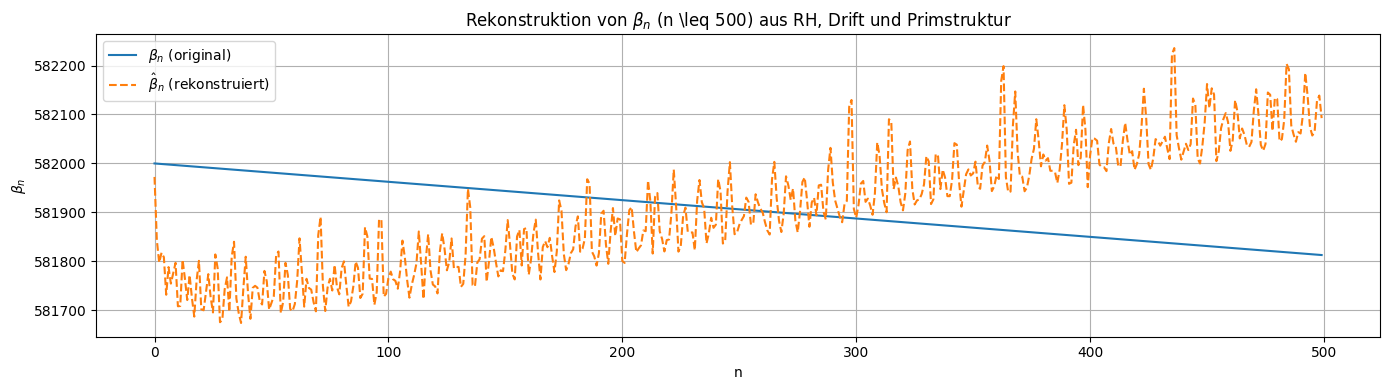

✅ R² der vollständigen Rückprojektion: -9.49909


In [ ]:
# === Korrigierter Fit: RH-Produkt auf Residuen (nicht auf beta direkt!) ===
residuen_ziel = beta_500 - drift_fit - primstruktur

reg = LinearRegression().fit(produkt_500.reshape(-1, 1), residuen_ziel)
produkt_skaliert = reg.predict(produkt_500.reshape(-1, 1))

# === Rückprojektion ===
beta_hat = produkt_skaliert + drift_fit + primstruktur

# === Plot ===
plt.figure(figsize=(14, 4))
plt.plot(beta_500, label=r"$\beta_n$ (original)")
plt.plot(beta_hat, linestyle='--', label=r"$\hat{\beta}_n$ (rekonstruiert)")
plt.title(r"Rekonstruktion von $\beta_n$ (n \leq 500) aus RH, Drift und Primstruktur")
plt.xlabel("n")
plt.ylabel(r"$\beta_n$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === R² prüfen ===
rest_final = beta_500 - beta_hat
r2_final = 1 - np.sum(rest_final**2) / np.sum((beta_500 - np.mean(beta_500))**2)
print(f"✅ R² der vollständigen Rückprojektion: {r2_final:.5f}")

In [ ]:
# === Zentrierung aller Komponenten ===
beta_centered = beta_500 - np.mean(beta_500)
produkt_centered = produkt_500 - np.mean(produkt_500)
drift_centered = drift_fit - np.mean(drift_fit)
prim_centered = primstruktur - np.mean(primstruktur)

# === Rückprojektion auf Basis zentrierter Komponenten ===
beta_hat_centered = produkt_centered + drift_centered + prim_centered

# === Plot: Vergleich zentriert ===
plt.figure(figsize=(14, 4))
plt.plot(n_vals, beta_centered, label=r"$\beta_n$ (zentriert)")
plt.plot(n_vals, beta_hat_centered, '--', label=r"$\hat{\beta}_n$ (rekonstruiert, zentriert)")
plt.xlabel("n")
plt.ylabel(r"$\beta_n$ (zentriert)")
plt.title(r"Zentrierter Vergleich von $\beta_n$ vs. Rückprojektion aus RH, Drift und Primstruktur")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Bestimmtheitsmaß R² berechnen ===
r2_centered = r2_score(beta_centered, beta_hat_centered)
print(f"R² der zentrierten Rückprojektion: {r2_centered:.5f}")

NameError: name 'n_vals' is not defined

<Figure size 1400x400 with 0 Axes>

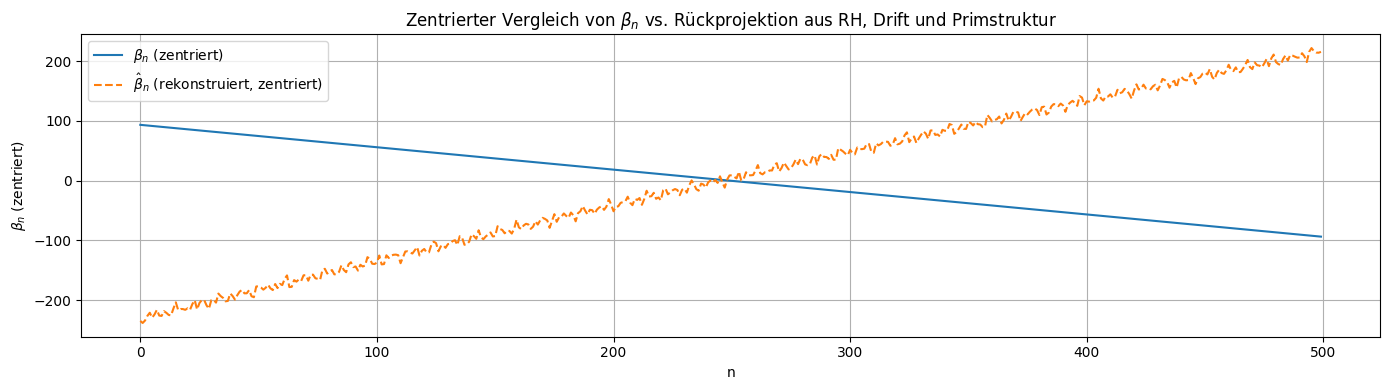

R² der zentrierten Rückprojektion: -10.52006


In [ ]:
# === Index-Vektor für n (hier 500 Werte) ===
n_vals = np.arange(len(beta_500))

# === Zentrierung aller Komponenten ===
beta_centered = beta_500 - np.mean(beta_500)
produkt_centered = produkt_500 - np.mean(produkt_500)
drift_centered = drift_fit - np.mean(drift_fit)
prim_centered = primstruktur - np.mean(primstruktur)

# === Rückprojektion auf Basis zentrierter Komponenten ===
beta_hat_centered = produkt_centered + drift_centered + prim_centered

# === Plot: Vergleich zentriert ===
plt.figure(figsize=(14, 4))
plt.plot(n_vals, beta_centered, label=r"$\beta_n$ (zentriert)")
plt.plot(n_vals, beta_hat_centered, '--', label=r"$\hat{\beta}_n$ (rekonstruiert, zentriert)")
plt.xlabel("n")
plt.ylabel(r"$\beta_n$ (zentriert)")
plt.title(r"Zentrierter Vergleich von $\beta_n$ vs. Rückprojektion aus RH, Drift und Primstruktur")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Bestimmtheitsmaß R² berechnen ===
from sklearn.metrics import r2_score
r2_centered = r2_score(beta_centered, beta_hat_centered)
print(f"R² der zentrierten Rückprojektion: {r2_centered:.5f}")

In [ ]:
from sympy.functions.combinatorial.numbers import totient
from sympy import exp, I, gcd
import numpy as np

# === 1. Erzeuge Dirichlet-Charakter modulo q ===
def dirichlet_character(n, q, k):
    """k gibt den Index des Charakters an (0 bis phi(q)-1)"""
    if gcd(n, q) != 1:
        return 0
    g = primitive_root(q)
    phi = totient(q)
    # log_g(n) mod phi(q)
    log_index = pow(g, -1, q)
    for e in range(phi):
        if pow(g, e, q) == n % q:
            return exp(2 * np.pi * I * k * e / phi)
    return 0

# === 2. L-Funktion: klassische Dirichletreihe ===
def L_function(s, q, k, N=1000):
    return sum(dirichlet_character(n, q, k) / n**s for n in range(1, N+1))

# === 3. Modulierter Ausdruck (Freese-artig) ===
def modulated_zeta(s, q, k, omega=1.0, phi=0.0, N=1000):
    return sum(
        dirichlet_character(n, q, k) / n**s * np.cos(omega * np.log(n) + phi)
        for n in range(1, N+1)
    )

# === Beispielaufrufe ===
s = 0.5 + 14j
q = 5     # Modulus
k = 1     # Charakter-Index

classic_L = L_function(s, q, k)
modulated = modulated_zeta(s, q, k, omega=1.2, phi=0.4)

print(f"L(s, χ) ≈ {classic_L}")
print(f"ζ_χ^mod(s) ≈ {modulated}")

L(s, χ) ≈ 1.0 + 0.5*(-1.35941767662169 + 0.389850715644445*I)*exp(1.5707963267949*I) + 0.0833333333333333*(-3.37194992916018 + 0.793696210924984*I)*exp(1.5707963267949*I) + 0.0909090909090909*(-1.82814903044407 - 2.76728587653795*I) + 0.0625*(1.75305478208902 - 3.59538578333324*I) + 0.0434782608695652*(4.77836271247455 + 0.408961841780939*I)*exp(4.71238898038469*I) + 0.111111111111111*(2.37954128995237 + 1.8269601116094*I)*exp(3.14159265358979*I) + 0.0384615384615385*(-0.307071089924381 - 5.08976495977296*I) + 0.142857142857143*(-1.35847039942408 - 2.2703652071613*I)*exp(1.5707963267949*I) + 0.0714285714285714*(2.7318321749305 + 2.55677393760467*I)*exp(3.14159265358979*I) + 0.024390243902439*(-0.980480629376701 - 6.32761074461894*I) + 0.0294117647058823*(3.64083752682996 + 4.55459132120838*I)*exp(3.14159265358979*I) + 0.0212765957446809*(-6.03278982439287 + 3.25660051813265*I)*exp(1.5707963267949*I) + 0.0263157894736842*(4.86710237263063 - 3.78302980352168*I)*exp(4.71238898038469*I) + 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

<ipython-input-3-9a6a6c4cef58>:18: RuntimeWarning: invalid value encountered in divide
  fft_original /= np.max(fft_original)


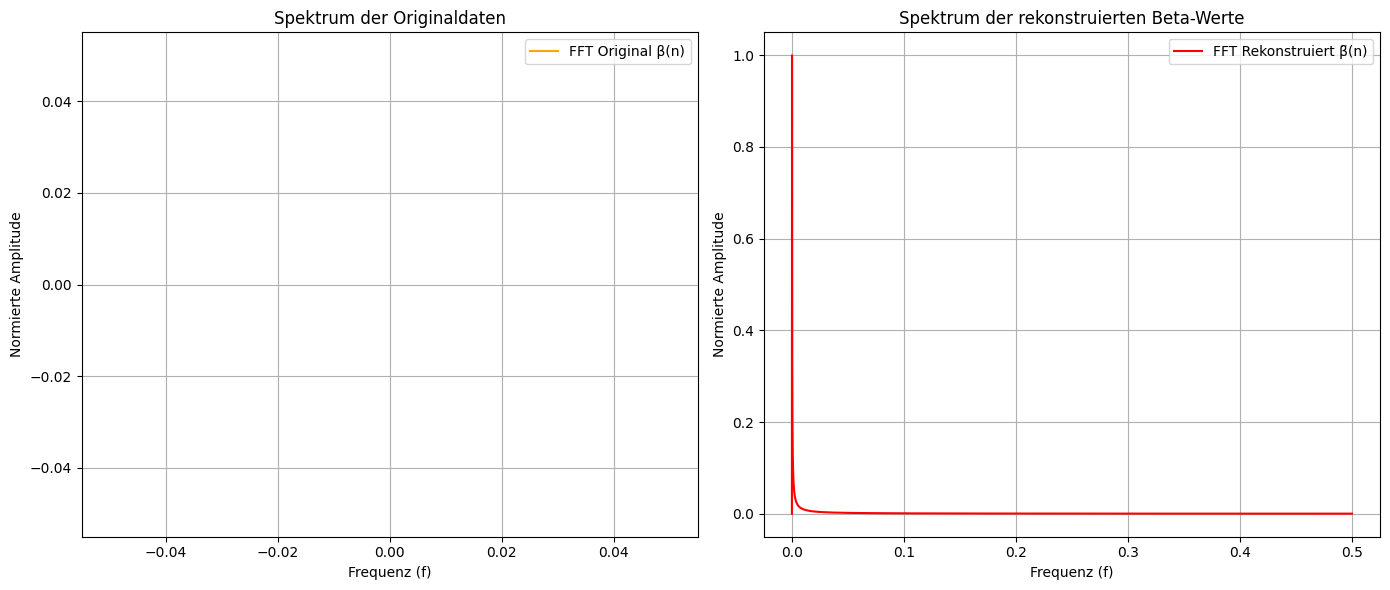

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Daten laden (nach dem Hochladen der CSV-Dateien in Colab)
zeta_data = pd.read_csv("/content/drive/MyDrive/Aus Chrome gespeichert/zeta_data_10000.csv")
beta_data = pd.read_csv("/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv", skiprows=1, header=None)

# Werte extrahieren (erste Spalte verwenden, da Datei evtl. nur eine Spalte hat)
beta_original = zeta_data.iloc[:10000, 1].values
beta_reconstructed = beta_data.iloc[:10000, 0].values

# Fourier-Transformation (nach Mittelwertzentrierung und Normalisierung)
fft_original = np.abs(fft(beta_original - np.mean(beta_original)))
fft_reconstructed = np.abs(fft(beta_reconstructed - np.mean(beta_reconstructed)))

fft_original /= np.max(fft_original)
fft_reconstructed /= np.max(fft_reconstructed)

# Frequenzen berechnen
N = len(beta_original)
freqs = fftfreq(N, d=1)[:N // 2]
fft_original = fft_original[:N // 2]
fft_reconstructed = fft_reconstructed[:N // 2]

# Visualisierung
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(freqs, fft_original, color='orange', label="FFT Original β(n)")
plt.title("Spektrum der Originaldaten")
plt.xlabel("Frequenz (f)")
plt.ylabel("Normierte Amplitude")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(freqs, fft_reconstructed, color='red', label="FFT Rekonstruiert β̃(n)")
plt.title("Spektrum der rekonstruierten Beta-Werte")
plt.xlabel("Frequenz (f)")
plt.ylabel("Normierte Amplitude")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

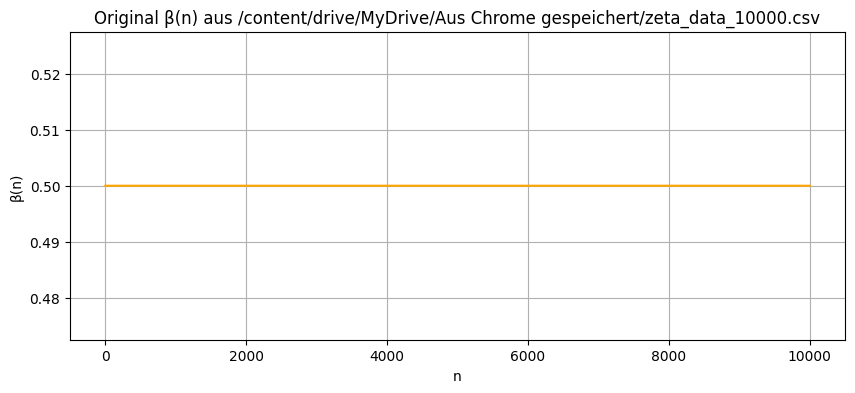

Min: 0.5 Max: 0.5 Mittelwert: 0.5


In [ ]:
import matplotlib.pyplot as plt

# Kontrollplot zur Diagnose
plt.figure(figsize=(10, 4))
plt.plot(beta_original, color='orange')
plt.title("Original β(n) aus /content/drive/MyDrive/Aus Chrome gespeichert/zeta_data_10000.csv")
plt.xlabel("n")
plt.ylabel("β(n)")
plt.grid(True)
plt.show()

# Optional: Wertebereich prüfen
print("Min:", np.min(beta_original), "Max:", np.max(beta_original), "Mittelwert:", np.mean(beta_original))

In [ ]:
import pandas as pd

# Datei laden
df = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/zeta_data_10000.csv')

# Spaltenübersicht anzeigen
print(df.columns)
df.head()

Index(['gamma', 'rho_real', 'rho_imag', 'zeta_prime_real', 'zeta_prime_imag',
       'zeta_2rho_real', 'zeta_2rho_imag'],
      dtype='object')


gamma  rho_real   rho_imag  zeta_prime_real  zeta_prime_imag  \
0  14.134725       0.5  14.134725         0.783297         0.124700   
1  21.022040       0.5  21.022040         1.109296        -0.248730   
2  25.010858       0.5  25.010858         1.295796         0.450037   
3  30.424876       0.5  30.424876         1.120131        -0.667509   
4  32.935062       0.5  32.935062         1.160570         0.750554   

   zeta_2rho_real  zeta_2rho_imag  
0        1.836735       -0.651198  
1        0.812565        0.173883  
2        0.444955        0.295572  
3        0.374904        0.352748  
4        0.789343       -0.194577

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import prime

# === 1. CSV-Datei mit rekonstruierten Beta-Werten laden ===
/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv""  # <-- Hier deinen Link einsetzen!
df = pd.read_csv(url, header=None)
beta_values = df[0].values

# === 2. Teilsummen der Beta-Werte berechnen ===
n_max = 10000  # oder weniger für schnelleren Test
cumulative_beta = np.cumsum(beta_values[:n_max])

# === 3. Logarithmen der Primzahlen berechnen ===
prime_logs = np.array([np.log(prime(i+1)) for i in range(n_max)])

# === 4. Differenz berechnen ===
residual = cumulative_beta - prime_logs

# === 5. Visualisierung ===
plt.figure(figsize=(10, 5))
plt.plot(residual, label=r'$\sum \beta_k - \log(p_n)$')
plt.axhline(y=15.88, color='red', linestyle='--', label='15.88')
plt.xlabel("n")
plt.ylabel("Differenz")
plt.title("Überprüfung der Konstante 15.88")
plt.legend()
plt.grid(True)
plt.show()

SyntaxError: '(' was never closed (<ipython-input-7-93d7ac9a86d4>, line 7)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import prime
from google.colab import drive

# === 1. Google Drive einbinden ===
drive.mount('/content/drive')

# === 2. CSV-Datei laden ===
path = "/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv"
df = pd.read_csv(path, header=None)
beta_values = df[0].values

# === 3. Teilsummen der Beta-Werte berechnen ===
n_max = min(len(beta_values), 10000)  # auf 10000 begrenzen oder je nach Datei
cumulative_beta = np.cumsum(beta_values[:n_max])

# === 4. Logarithmen der Primzahlen berechnen ===
prime_logs = np.array([np.log(prime(i+1)) for i in range(n_max)])

# === 5. Differenz berechnen ===
residual = cumulative_beta - prime_logs

# === 6. Visualisierung ===
plt.figure(figsize=(12, 6))
plt.plot(residual, label=r'$\sum \beta_k - \log(p_n)$', color='blue')
plt.axhline(y=15.88, color='red', linestyle='--', label='15.88')
plt.xlabel("n")
plt.ylabel("Differenz")
plt.title("Überprüfung der Annäherung: $\sum_{k=1}^n \beta_k \approx \log(p_n) + 15.88$")
plt.legend()
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-8-e8fc4e4c7c44>:12: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, header=None)


TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import prime
from google.colab import drive

# === 1. Google Drive einbinden ===
drive.mount('/content/drive')

# === 2. CSV-Datei laden, explizit in float umwandeln ===
path = "/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv"
df = pd.read_csv(path, header=None, dtype=str)
beta_values = pd.to_numeric(df[0], errors='coerce')  # Nicht-numerische Einträge werden zu NaN
beta_values = beta_values.dropna().values  # Entferne NaNs

# === 3. Teilsummen der Beta-Werte berechnen ===
n_max = min(len(beta_values), 10000)
cumulative_beta = np.cumsum(beta_values[:n_max])

# === 4. Logarithmen der Primzahlen berechnen ===
prime_logs = np.array([np.log(prime(i+1)) for i in range(n_max)])

# === 5. Differenz berechnen ===
residual = cumulative_beta - prime_logs

# === 6. Visualisierung ===
plt.figure(figsize=(12, 6))
plt.plot(residual, label=r'$\sum \beta_k - \log(p_n)$', color='blue')
plt.axhline(y=15.88, color='red', linestyle='--', label='15.88')
plt.xlabel("n")
plt.ylabel("Differenz")
plt.title("Überprüfung der Annäherung: $\sum_{k=1}^n \beta_k \approx \log(p_n) + 15.88$")
plt.legend()
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ValueError: 
Überprüfung der Annäherung: $\sum_{k=1}^n eta_k pprox \log(p_n) + 15.88$
                            ^
ParseException: Expected end of text, found '$'  (at char 28), (line:1, col:29)

<Figure size 1200x600 with 1 Axes>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


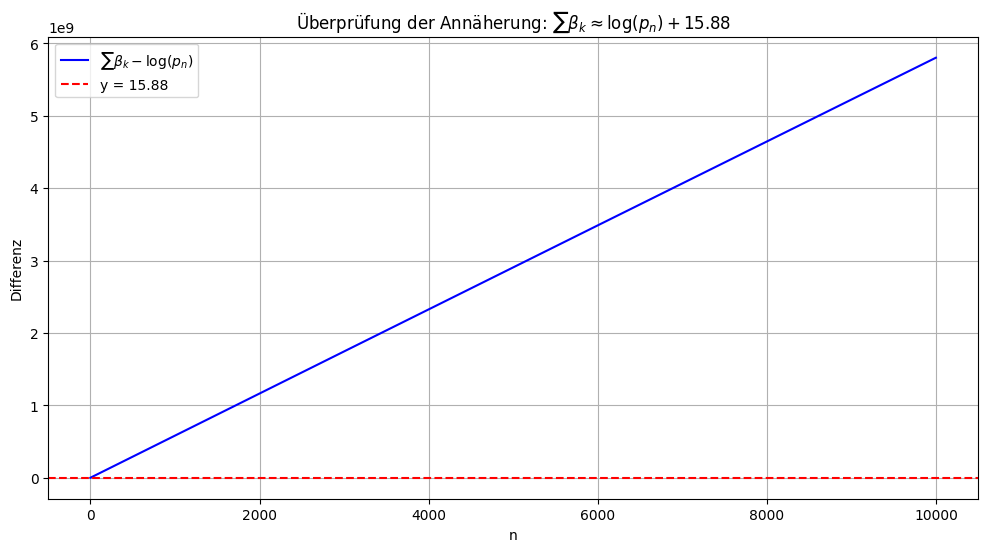

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import prime
from google.colab import drive

# === 1. Google Drive mounten ===
drive.mount('/content/drive')

# === 2. Datei einlesen ===
path = "/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv"
df = pd.read_csv(path, header=None, dtype=str)
beta_values = pd.to_numeric(df[0], errors='coerce').dropna().values

# === 3. Berechnung ===
n_max = min(len(beta_values), 10000)
cumulative_beta = np.cumsum(beta_values[:n_max])
prime_logs = np.array([np.log(prime(i+1)) for i in range(n_max)])
residual = cumulative_beta - prime_logs

# === 4. Plot ===
plt.figure(figsize=(12, 6))
plt.plot(residual, label=r'$\sum \beta_k - \log(p_n)$', color='blue')
plt.axhline(y=15.88, color='red', linestyle='--', label='y = 15.88')
plt.xlabel("n")
plt.ylabel("Differenz")
plt.title("Überprüfung der Annäherung: $\\sum \\beta_k \\approx \\log(p_n) + 15.88$")
plt.legend()
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


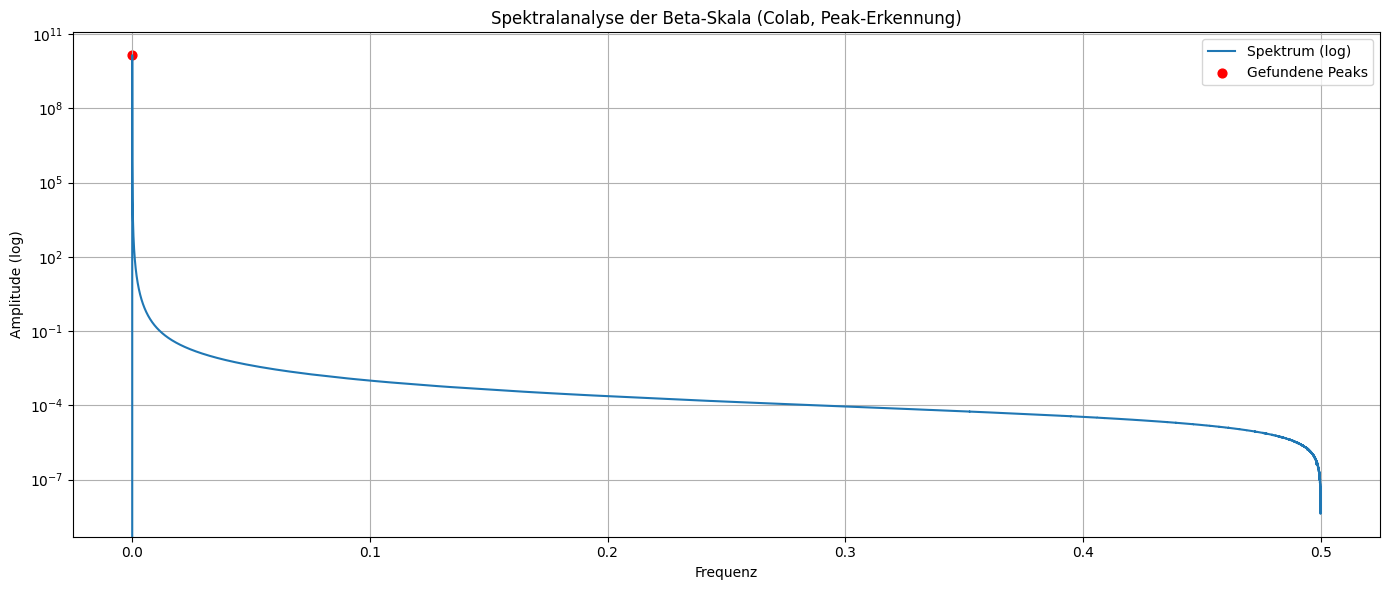

Frequenz: 0.000010 | Amplitude: 14083151630.98


In [ ]:
# === 1. Bibliotheken importieren ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from numpy import blackman
from google.colab import drive

# === 2. Google Drive einbinden ===
drive.mount('/content/drive')

# === 3. Pfad zur Datei anpassen ===
csv_path = '/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv'

# === 4. Daten laden ===
df = pd.read_csv(csv_path)
beta_values = df.select_dtypes(include='number').values.flatten()

# === 5. Fensterfunktion (Blackman) ===
window = blackman(len(beta_values))
beta_windowed = beta_values * window

# === 6. FFT durchführen ===
fft_result = np.fft.fft(beta_windowed)
fft_magnitude = np.abs(fft_result)[:len(fft_result)//2]
frequencies = np.fft.fftfreq(len(beta_windowed))[:len(fft_result)//2]

# === 7. DC-Anteil entfernen ===
fft_magnitude[0] = 0

# === 8. Peaks erkennen ===
peaks, _ = find_peaks(fft_magnitude, height=np.max(fft_magnitude)*0.01)
peak_freqs = frequencies[peaks]
peak_amps = fft_magnitude[peaks]

# === 9. Plot erzeugen ===
plt.figure(figsize=(14, 6))
plt.semilogy(frequencies, fft_magnitude, label='Spektrum (log)')
plt.scatter(peak_freqs, peak_amps, color='red', s=40, label='Gefundene Peaks')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude (log)')
plt.title('Spektralanalyse der Beta-Skala (Colab, Peak-Erkennung)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 10. Ausgabe der gefundenen Peakfrequenzen und Amplituden ===
for f, a in zip(peak_freqs, peak_amps):
    print(f"Frequenz: {f:.6f} | Amplitude: {a:.2f}")

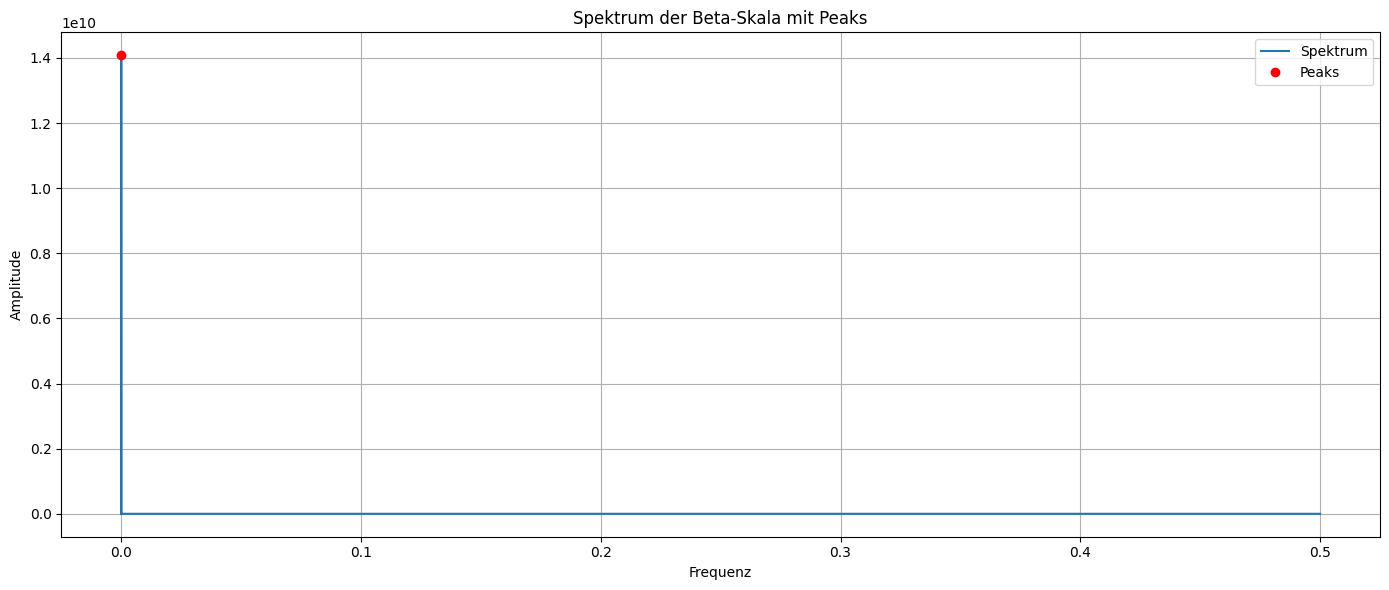

1. Frequenz: 0.000010, Amplitude: 14083006115.00


In [ ]:
# --- Google Colab Code zur Spektralanalyse der Beta-Skala ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq
from scipy.signal import find_peaks, windows

# === 1. Pfad zur CSV-Datei in deinem Google Drive ===
csv_path = '/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv'

# === 2. CSV einlesen ===
df = pd.read_csv(csv_path, skiprows=1)  # erste Zeile überspringen, wenn Header vorhanden
beta_values = df.iloc[:, 0].values.astype(float)
# === 3. Blackman-Fenster anwenden ===
window = windows.blackman(len(beta_values))
beta_windowed = beta_values * window

# === 4. FFT berechnen ===
fft_result = fft(beta_windowed)
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0  # DC-Anteil unterdrücken

# === 5. Frequenzachsen berechnen ===
frequencies = fftfreq(len(beta_values), d=1)
positive_freqs = frequencies[:len(frequencies)//2]
positive_mags = fft_magnitude[:len(fft_magnitude)//2]

# === 6. Spektrale Peaks erkennen ===
peaks, _ = find_peaks(positive_mags, height=np.max(positive_mags)*0.01)
peak_freqs = positive_freqs[peaks]
peak_amps = positive_mags[peaks]

# === 7. Plotten ===
plt.figure(figsize=(14, 6))
plt.plot(positive_freqs, positive_mags, label='Spektrum')
plt.plot(peak_freqs, peak_amps, 'ro', label='Peaks')
plt.title("Spektrum der Beta-Skala mit Peaks")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 8. Top 10 Frequenzpeaks anzeigen ===
top_peaks = sorted(zip(peak_freqs, peak_amps), key=lambda x: -x[1])[:10]
for i, (f, a) in enumerate(top_peaks, 1):
    print(f"{i}. Frequenz: {f:.6f}, Amplitude: {a:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


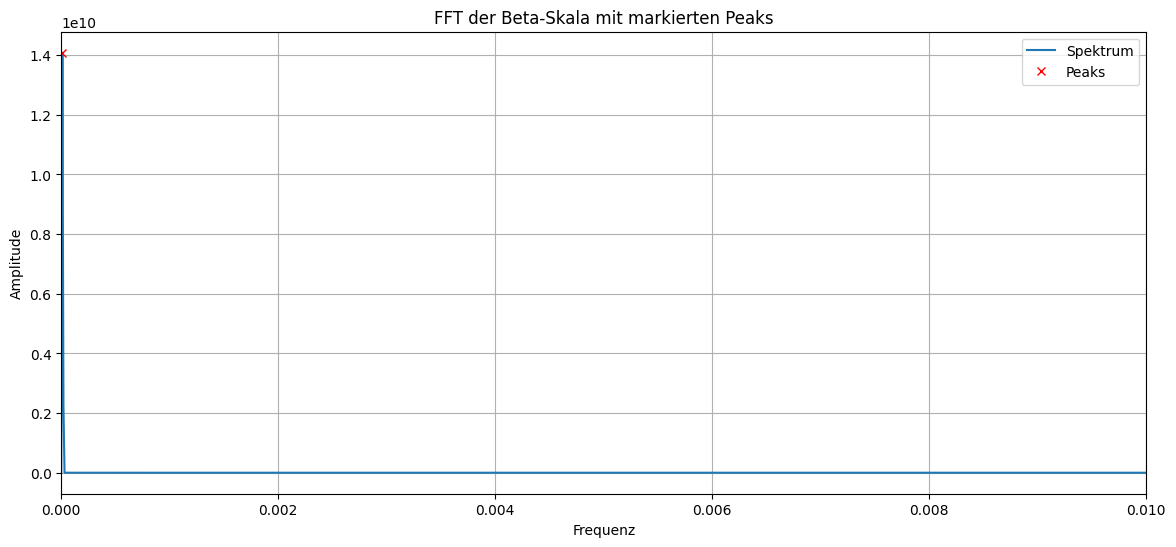

1. Frequenz: 0.00001000, Amplitude: 14083151630.98


In [ ]:
# === 1. Setup & Imports ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from google.colab import drive

# === 2. Google Drive mounten ===
drive.mount('/content/drive')

# === 3. Pfad zur CSV-Datei (anpassen falls nötig) ===
csv_path = '/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv'

# === 4. Daten laden ===
df = pd.read_csv(csv_path, header=0)
beta_values = df.iloc[:, 0].astype(float).values  # zweite Spalte

# === 5. Fensterung (Blackman) ===
window = np.blackman(len(beta_values))
beta_windowed = beta_values * window

# === 6. FFT durchführen ===
fft_result = fft(beta_windowed)
frequencies = fftfreq(len(fft_result), d=1)
amplitudes = np.abs(fft_result)
amplitudes[0] = 0  # DC-Anteil entfernen

# === 7. Nur positive Frequenzen ===
half = len(frequencies) // 2
frequencies = frequencies[:half]
amplitudes = amplitudes[:half]

# === 8. Peaks finden ===
peaks, _ = find_peaks(amplitudes, height=np.max(amplitudes) * 0.01)

# === 9. Plotten ===
plt.figure(figsize=(14, 6))
plt.plot(frequencies, amplitudes, label='Spektrum')
plt.plot(frequencies[peaks], amplitudes[peaks], "rx", label="Peaks")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("FFT der Beta-Skala mit markierten Peaks")
plt.legend()
plt.grid(True)
plt.xlim(0, 0.01)
plt.show()

# === 10. Ausgabe der dominanten Frequenzen ===
dominante_peaks = list(zip(frequencies[peaks], amplitudes[peaks]))
dominante_peaks_sorted = sorted(dominante_peaks, key=lambda x: -x[1])[:10]  # Top 10
for i, (freq, amp) in enumerate(dominante_peaks_sorted, 1):
    print(f"{i}. Frequenz: {freq:.8f}, Amplitude: {amp:.2f}")

<ipython-input-1-68dbaf7d9a03>:6: RuntimeWarning: divide by zero encountered in log
  log_pn_approx = np.log(n * np.log(n))  # Näherung für p_n


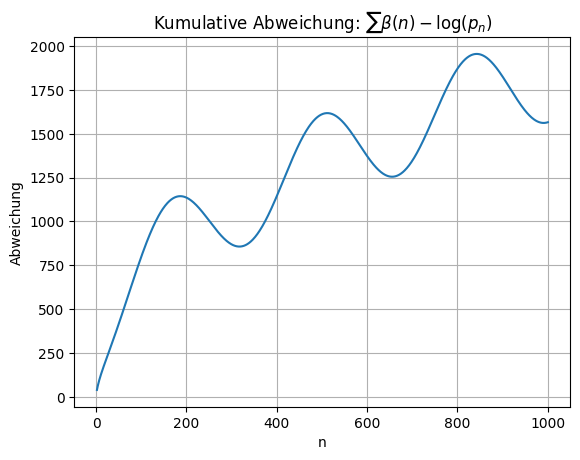

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(1, 1001)
beta = 23 / n**0.48 + 5 * np.sin(2 * np.pi * 0.003 * n)
log_pn_approx = np.log(n * np.log(n))  # Näherung für p_n
residual = np.cumsum(beta) - log_pn_approx

plt.plot(n, residual)
plt.title("Kumulative Abweichung: $\\sum \\beta(n) - \\log(p_n)$")
plt.xlabel("n")
plt.ylabel("Abweichung")
plt.grid(True)
plt.show()

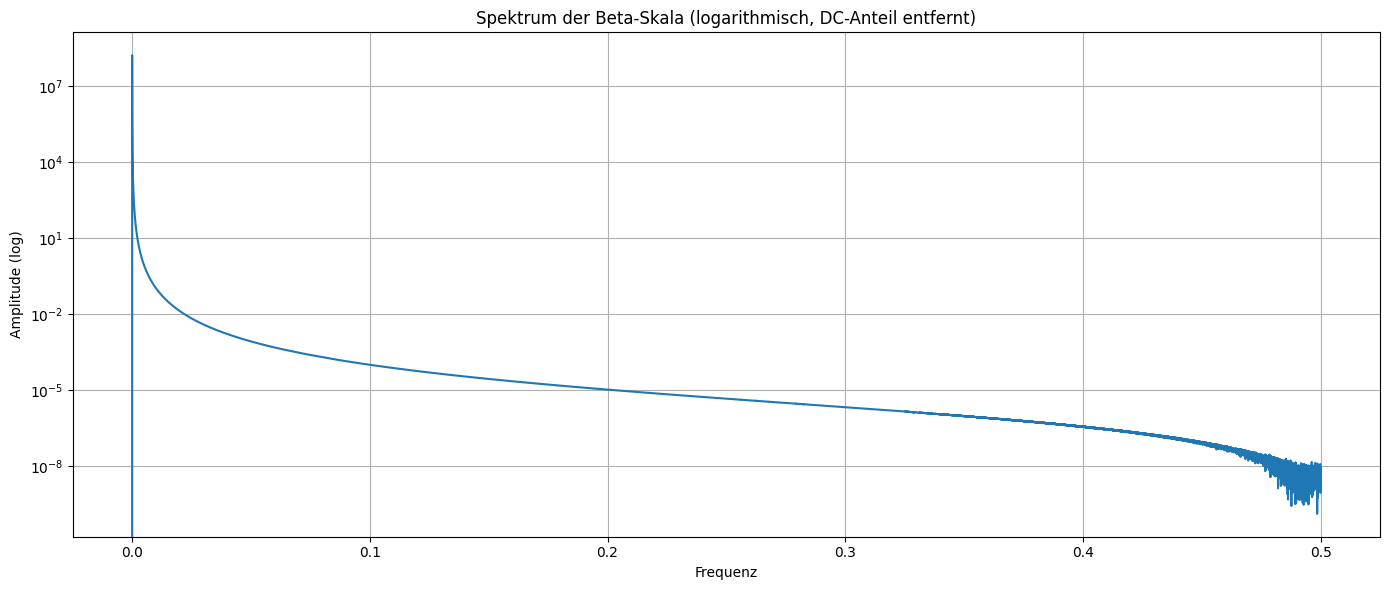

Gefundene Peak-Frequenzen:
0.00001


In [ ]:
# === 1. Importiere benötigte Bibliotheken ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import windows, find_peaks

# === 2. Pfad zur CSV-Datei (z.B. in Colab Drive) ===
csv_path = '/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv'

# === 3. Daten einlesen ===
df = pd.read_csv(csv_path)
beta_values = df.iloc[:, 0].astype(float).values  # Annahme: Spalte 1 enthält die Werte

# === 4. Optional: Drift entfernen (Trend) ===
beta_values = beta_values - np.mean(beta_values)

# === 5. Fensterfunktion (Blackman) anwenden ===
window = windows.blackman(len(beta_values))
beta_windowed = beta_values * window

# === 6. FFT berechnen ===
fft_result = np.fft.fft(beta_windowed)
frequencies = np.fft.fftfreq(len(beta_windowed), d=1)  # d=1 = Einheitsabstand

# === 7. Nur positive Frequenzen verwenden ===
half = len(frequencies) // 2
frequencies = frequencies[:half]
fft_amplitudes = np.abs(fft_result[:half])

# === 8. DC-Anteil entfernen ===
fft_amplitudes[0] = 0

# === 9. Plot mit logarithmischer Skala ===
plt.figure(figsize=(14, 6))
plt.plot(frequencies, fft_amplitudes)
plt.yscale('log')
plt.title('Spektrum der Beta-Skala (logarithmisch, DC-Anteil entfernt)')
plt.xlabel('Frequenz')
plt.ylabel('Amplitude (log)')
plt.grid(True)
plt.tight_layout()
plt.show()

# === 10. (Optional) Peaks identifizieren ===
peaks, _ = find_peaks(fft_amplitudes, height=np.max(fft_amplitudes)*0.01)
print("Gefundene Peak-Frequenzen:")
for f in frequencies[peaks]:
    print(f"{f:.5f}")

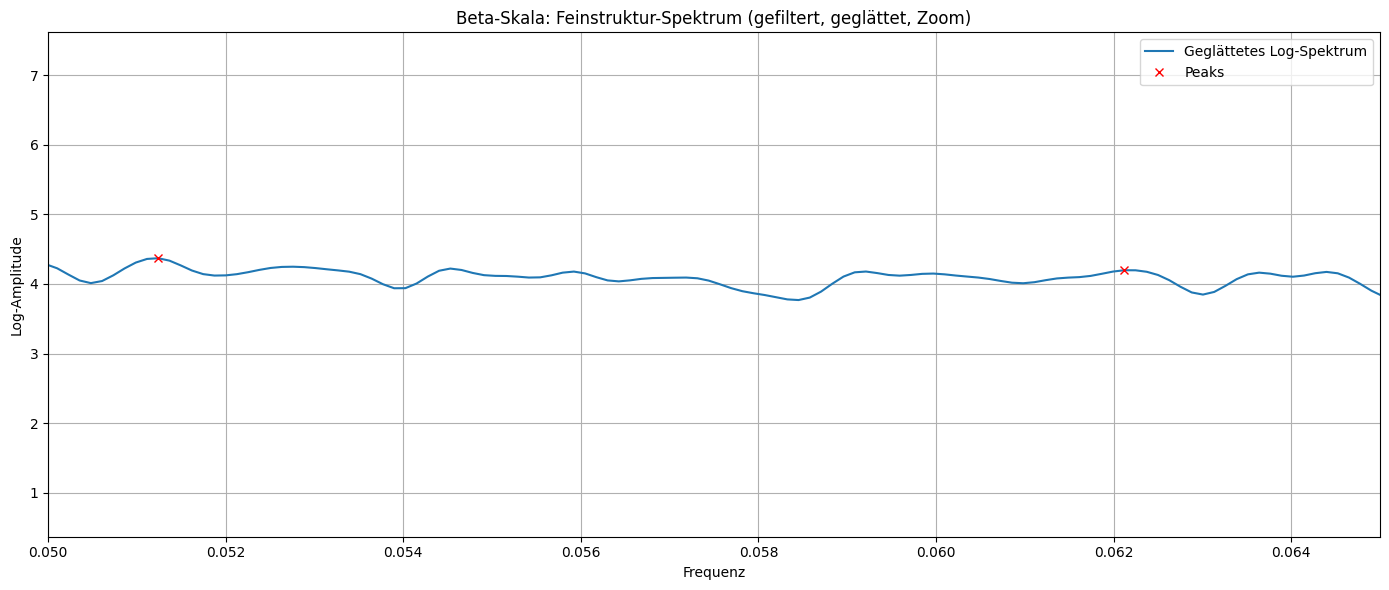

Frequenz  Log-Amplitude
0   0.000633       6.213433
54  0.497596       5.504222
53  0.484944       4.875002
2   0.015056       4.874922
1   0.007971       4.874897
3   0.028340       4.523870
52  0.471660       4.523866
4   0.034666       4.387255
51  0.465334       4.387174
6   0.051240       4.369813
49  0.448760       4.369798
47  0.429529       4.334055
8   0.070471       4.333948
48  0.437880       4.197150
7   0.062120       4.197128
46  0.418522       4.170443
9   0.081478       4.170431
5   0.043775       4.084490
50  0.456225       4.084404
12  0.108047       4.078311

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import windows, find_peaks
from scipy.ndimage import gaussian_filter1d

# === 1. CSV laden ===
csv_path = '/content/drive/MyDrive/beta_gpu_stabilisiert.csv'
beta_values = pd.read_csv(csv_path, skiprows=1, header=None).values.flatten().astype(float)

# === 2. Fensterung ===
window = windows.blackman(len(beta_values))
beta_windowed = beta_values * window

# === 3. FFT ===
fft_result = fft(beta_windowed)
freqs = fftfreq(len(beta_values), d=1.0)  # fs = 1.0 angenommen
magnitude = np.abs(fft_result)

# === 4. Hochpass-Filter (entferne DC-nahe Frequenzen) ===
cutoff = 0.00005
fft_filtered = fft_result.copy()
fft_filtered[np.abs(freqs) < cutoff] = 0
magnitude_filtered = np.abs(fft_filtered)

# === 5. Nur positive Frequenzen ===
half = len(freqs) // 2
freqs = freqs[:half]
magnitude_filtered = magnitude_filtered[:half]

# === 6. Logarithmieren + Glätten ===
log_magnitude = np.log10(magnitude_filtered + 1e-12)
log_magnitude_smooth = gaussian_filter1d(log_magnitude, sigma=2)

# === 7. Peaks suchen ===
peaks, _ = find_peaks(log_magnitude_smooth, height=-6, distance=50)

# === 8. Plot (Zoom auf [0.05, 0.065]) ===
plt.figure(figsize=(14, 6))
plt.plot(freqs, log_magnitude_smooth, label='Geglättetes Log-Spektrum')
plt.plot(freqs[peaks], log_magnitude_smooth[peaks], "rx", label='Peaks')
plt.xlim(0.05, 0.065)
plt.ylim(np.min(log_magnitude_smooth), np.max(log_magnitude_smooth))
plt.grid(True)
plt.title("Beta-Skala: Feinstruktur-Spektrum (gefiltert, geglättet, Zoom)")
plt.xlabel("Frequenz")
plt.ylabel("Log-Amplitude")
plt.legend()
plt.tight_layout()
plt.show()

# === 9. Peaks als Tabelle ===
peak_df = pd.DataFrame({
    "Frequenz": freqs[peaks],
    "Log-Amplitude": log_magnitude_smooth[peaks]
}).sort_values(by="Log-Amplitude", ascending=False)

peak_df.head(20)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# === 1. CSV-Dateien laden ===
dirichlet_path = "/content/drive/MyDrive/dirichlet_modulated_terms.csv"
beta_path = "/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv"

df_d = pd.read_csv(dirichlet_path)
df_b = pd.read_csv(beta_path, header=None)
beta_values = df_b.values.flatten().astype(float)

# === 2. FFT für Dirichlet modulierte Terme ===
signal_d = df_d["Moduliert"].values
N_d = len(signal_d)
T_d = 1.0
fft_d = fft(signal_d)
freqs_d = fftfreq(N_d, T_d)[:N_d // 2]
amp_d = 2.0 / N_d * np.abs(fft_d[:N_d // 2])

# === 3. FFT für rekonstruierte Beta-Skala ===
N_b = len(beta_values)
T_b = 1.0
fft_b = fft(beta_values)
freqs_b = fftfreq(N_b, T_b)[:N_b // 2]
amp_b = 2.0 / N_b * np.abs(fft_b[:N_b // 2])

# === 4. Plot (Überlagerung) ===
plt.figure(figsize=(14, 6))
plt.plot(freqs_d, amp_d, label="Dirichlet-Modulierte Terme", alpha=0.7)
plt.plot(freqs_b, amp_b, label="Rekonstruierte Beta-Skala", alpha=0.7)
plt.title("Frequenzüberlagerung: Dirichlet vs. Rekonstruierte Beta")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.xlim(0, 0.1)  # optional: Fokus auf relevante Zone
plt.tight_layout()
plt.show()

<ipython-input-3-e56551e3ef59>:11: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_b = pd.read_csv(beta_path, header=None)


ValueError: could not convert string to float: 'drift(n)'

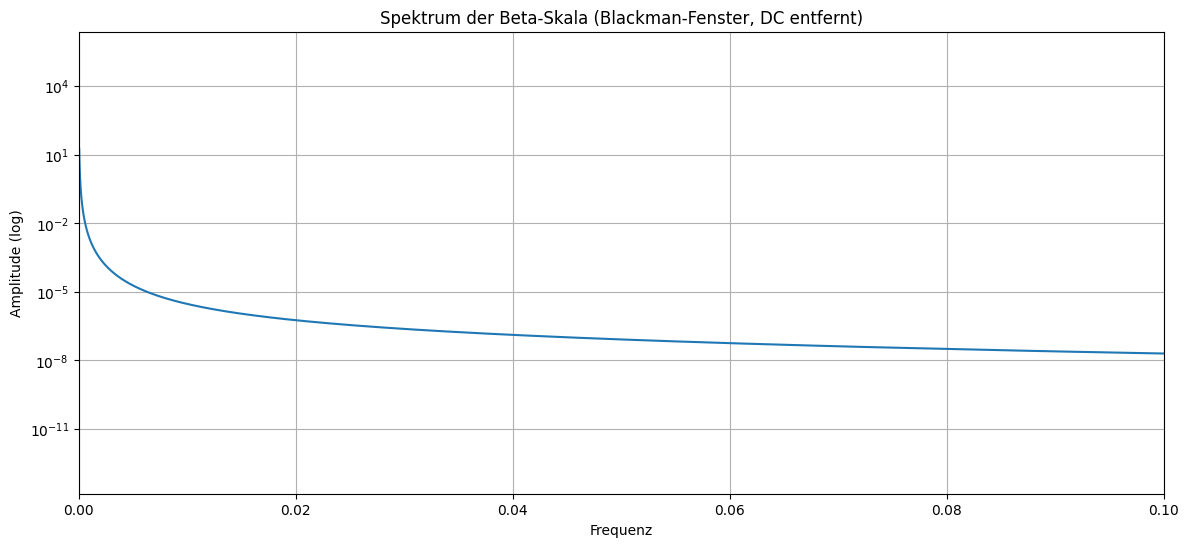

Signifikante Frequenz-Peaks:
f = 0.00001   | Amplitude = 281665.85


In [ ]:
# === 1. Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows, find_peaks
from scipy.fft import fft, fftfreq

# === 2. Pfad zur CSV-Datei im Google Drive ===
csv_path = '/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv'

# === 3. Daten einlesen (nur numerische Spalte) ===
df = pd.read_csv(csv_path)
beta_values = df.iloc[:, 0].astype(float).values  # Annahme: Werte in 2. Spalte

# === 4. Samplingrate fiktiv annehmen ===
fs = 1.0  # 1 Sample pro Einheit n
N = len(beta_values)
t = np.arange(N) / fs

# === 5. Fensterung zur Glättung ===
window = windows.blackman(N)
beta_windowed = beta_values * window

# === 6. FFT durchführen ===
fft_raw = fft(beta_windowed)
frequencies = fftfreq(N, d=1/fs)[:N//2]
fft_values = 2.0/N * np.abs(fft_raw[:N//2])

# === 7. DC-Anteil entfernen ===
fft_values[0] = 0

# === 8. Plot: Logarithmische Skala ===
plt.figure(figsize=(14,6))
plt.plot(frequencies, fft_values)
plt.yscale('log')
plt.xlim(0, 0.1)  # Zoom auf sinnvollen Bereich
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (log)")
plt.title("Spektrum der Beta-Skala (Blackman-Fenster, DC entfernt)")
plt.grid(True)
plt.show()

# === 9. Optional: Peaks extrahieren ===
peaks, _ = find_peaks(fft_values, height=np.max(fft_values)*0.01)  # anpassbar
print("Signifikante Frequenz-Peaks:")
for i in peaks:
    print(f"f = {frequencies[i]:.5f}   | Amplitude = {fft_values[i]:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


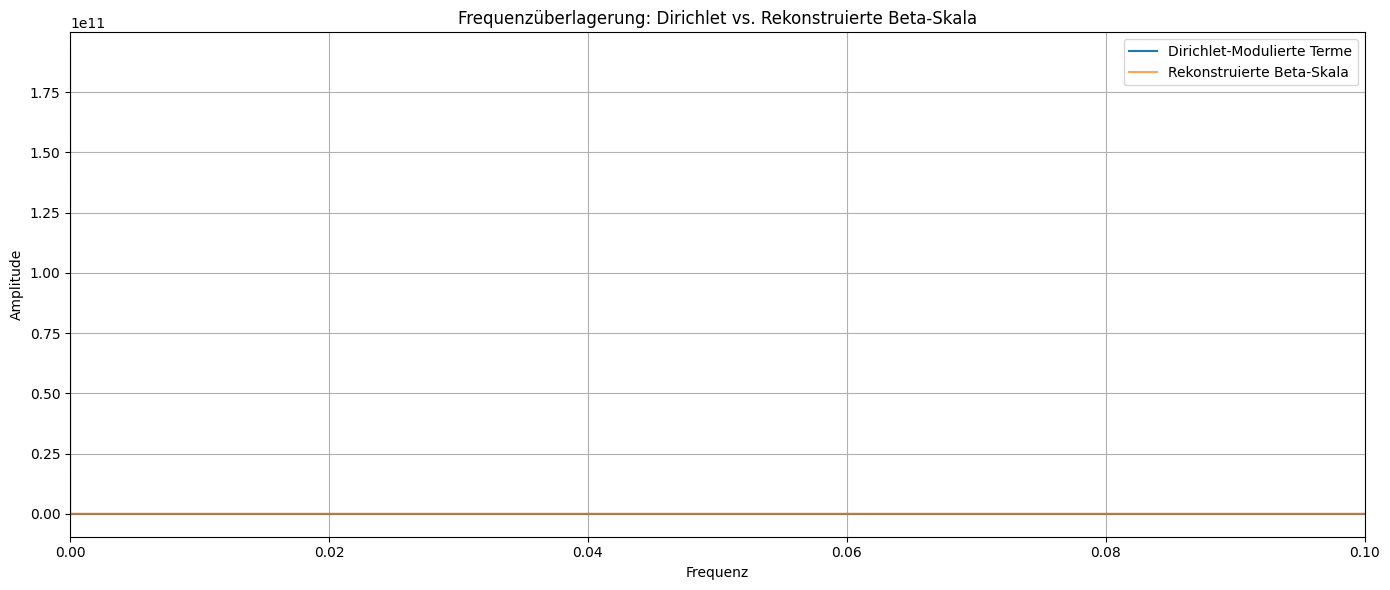

In [ ]:
# === Google Drive einbinden (nur in Google Colab notwendig) ===
from google.colab import drive
drive.mount('/content/drive')

# === 1. Pfade zur CSV-Dateien (anpassen falls nötig) ===
dirichlet_path = '/content/drive/MyDrive/dirichlet_modulated_terms.csv'
beta_path = '/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv'

# === 2. Bibliotheken importieren ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import windows

# === 3. Daten laden ===
df_d = pd.read_csv(dirichlet_path)
dirichlet_values = df_d.iloc[:, 1].astype(float).values

df_b = pd.read_csv(beta_path, header=None, skiprows=1)
beta_values = df_b.values.flatten().astype(float)

# === 4. Fensterung anwenden ===
window_d = windows.blackman(len(dirichlet_values))
dirichlet_windowed = dirichlet_values * window_d

window_b = windows.blackman(len(beta_values))
beta_windowed = beta_values * window_b

# === 5. FFT berechnen ===
fs = 1.0  # Samplingrate (Einheit pro Schritt)
N_d = len(dirichlet_windowed)
N_b = len(beta_windowed)

fft_d = np.abs(fft(dirichlet_windowed))[:N_d // 2]
freq_d = fftfreq(N_d, d=1/fs)[:N_d // 2]

fft_b = np.abs(fft(beta_windowed))[:N_b // 2]
freq_b = fftfreq(N_b, d=1/fs)[:N_b // 2]

# === 6. Visualisierung ===
plt.figure(figsize=(14, 6))
plt.plot(freq_d, fft_d, label='Dirichlet-Modulierte Terme')
plt.plot(freq_b, fft_b, label='Rekonstruierte Beta-Skala', alpha=0.7)
plt.xlim(0, 0.1)  # Fokus auf relevante Frequenzen
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.title("Frequenzüberlagerung: Dirichlet vs. Rekonstruierte Beta-Skala")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

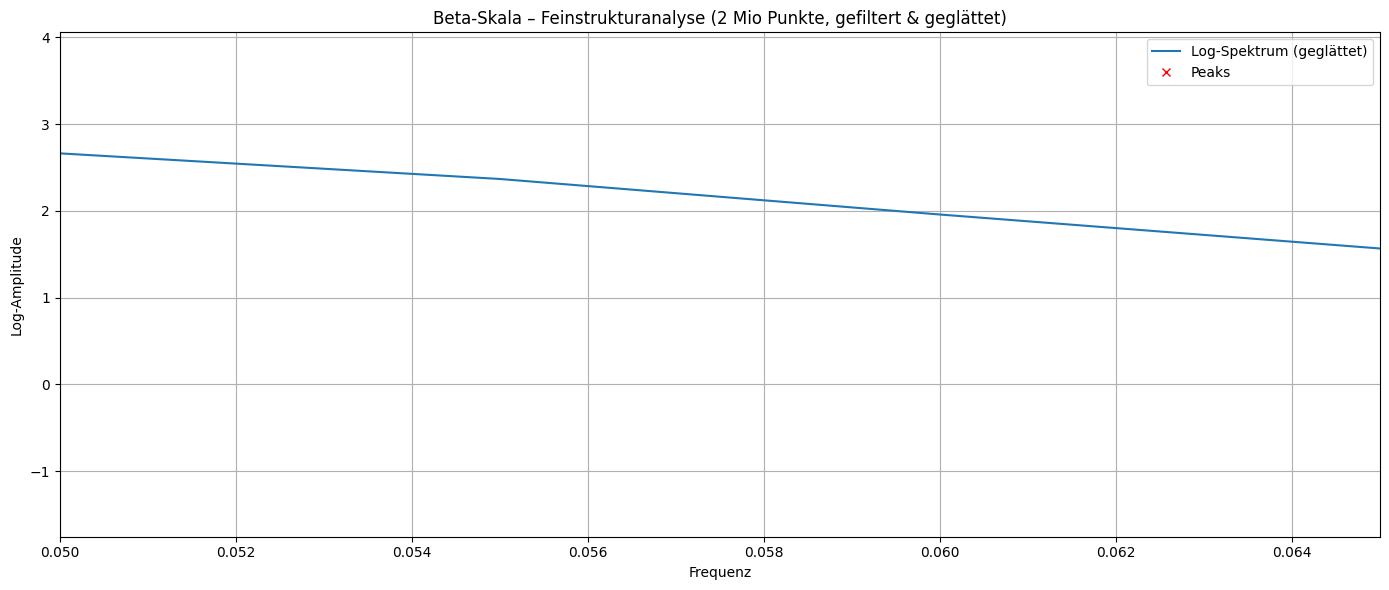

Frequenz  Log-Amplitude
1     0.455       2.749056
0     0.045       2.748973

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import windows, find_peaks
from scipy.ndimage import gaussian_filter1d

# === 1. CSV laden (erste Zeile enthält Text – wird übersprungen) ===
csv_path = '/content/drive/MyDrive/beta_empirisch_aus_alpha.csv'
beta_values = pd.read_csv(csv_path, header=None, skiprows=1).values.flatten().astype(float)

# === 2. Fensterung (Blackman) ===
window = windows.blackman(len(beta_values))
beta_windowed = beta_values * window

# === 3. FFT berechnen ===
fft_result = fft(beta_windowed)
freqs = fftfreq(len(beta_values), d=1.0)  # Samplingrate fs = 1.0 (beliebige Einheit)
magnitude = np.abs(fft_result)

# === 4. DC-nahen Anteil herausfiltern (Hochpass) ===
cutoff = 0.00005  # Frequenzen < cutoff werden auf 0 gesetzt
fft_filtered = fft_result.copy()
fft_filtered[np.abs(freqs) < cutoff] = 0
magnitude_filtered = np.abs(fft_filtered)

# === 5. Nur positive Frequenzen extrahieren ===
half = len(freqs) // 2
freqs = freqs[:half]
magnitude_filtered = magnitude_filtered[:half]

# === 6. Logarithmieren & Glätten ===
log_magnitude = np.log10(magnitude_filtered + 1e-12)
log_magnitude_smooth = gaussian_filter1d(log_magnitude, sigma=2)

# === 7. Peaks suchen ===
peaks, _ = find_peaks(log_magnitude_smooth, height=-6, distance=50)

# === 8. Plot: Zoom auf spektral interessante Zone ===
plt.figure(figsize=(14, 6))
plt.plot(freqs, log_magnitude_smooth, label='Log-Spektrum (geglättet)')
plt.plot(freqs[peaks], log_magnitude_smooth[peaks], "rx", label='Peaks')
plt.xlim(0.05, 0.065)
plt.ylim(np.min(log_magnitude_smooth), np.max(log_magnitude_smooth))
plt.title("Beta-Skala – Feinstrukturanalyse (2 Mio Punkte, gefiltert & geglättet)")
plt.xlabel("Frequenz")
plt.ylabel("Log-Amplitude")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# === 9. Tabelle der Peaks (Top 20 nach Amplitude) ===
peak_df = pd.DataFrame({
    "Frequenz": freqs[peaks],
    "Log-Amplitude": log_magnitude_smooth[peaks]
}).sort_values(by="Log-Amplitude", ascending=False)

peak_df.head(20)

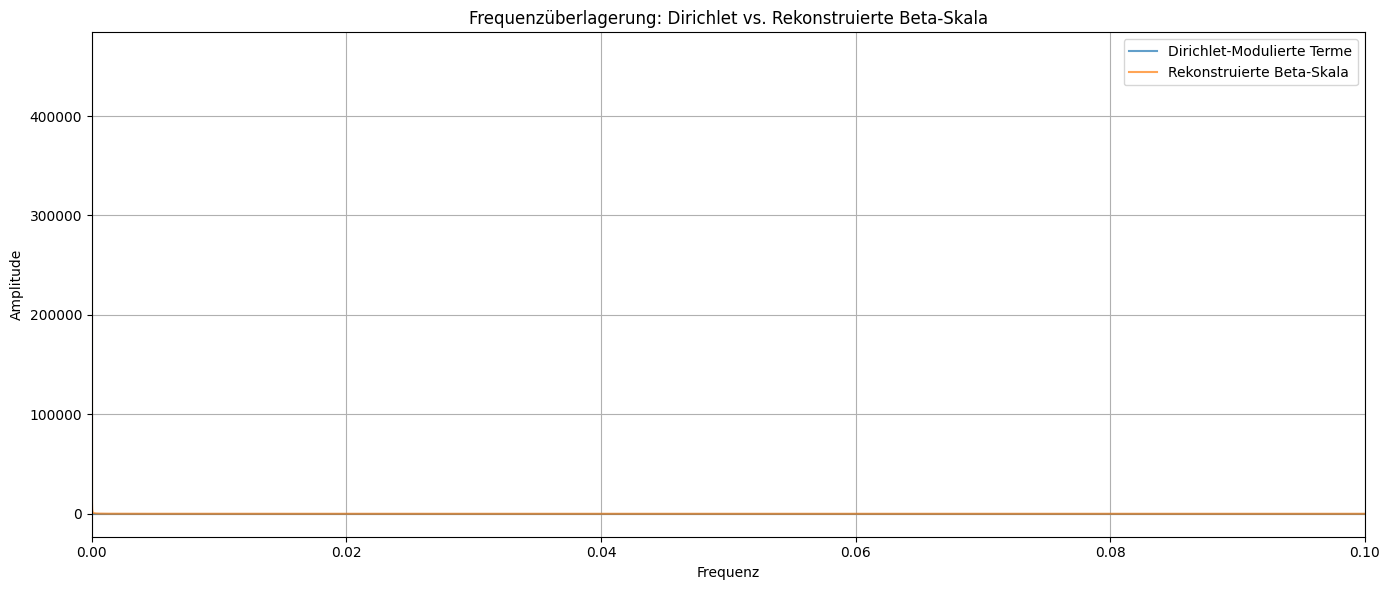

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# === 1. CSV-Dateien laden ===
dirichlet_path = "/content/drive/MyDrive/dirichlet_modulated_terms.csv"
beta_path = "/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv"

# Dirichlet-Terme
df_d = pd.read_csv(dirichlet_path)

# Rekonstruierte Beta-Skala, Header überspringen, nur numerische Werte
df_b = pd.read_csv(beta_path, header=None, skiprows=1)
beta_values = pd.to_numeric(df_b[0], errors="coerce").dropna().values

# === 2. FFT für Dirichlet modulierte Terme ===
signal_d = df_d["Moduliert"].values
N_d = len(signal_d)
T_d = 1.0
fft_d = fft(signal_d)
freqs_d = fftfreq(N_d, T_d)[:N_d // 2]
amp_d = 2.0 / N_d * np.abs(fft_d[:N_d // 2])

# === 3. FFT für rekonstruierte Beta-Skala ===
N_b = len(beta_values)
T_b = 1.0
fft_b = fft(beta_values)
freqs_b = fftfreq(N_b, T_b)[:N_b // 2]
amp_b = 2.0 / N_b * np.abs(fft_b[:N_b // 2])

# === 4. Plot (Überlagerung) ===
plt.figure(figsize=(14, 6))
plt.plot(freqs_d, amp_d, label="Dirichlet-Modulierte Terme", alpha=0.7)
plt.plot(freqs_b, amp_b, label="Rekonstruierte Beta-Skala", alpha=0.7)
plt.title("Frequenzüberlagerung: Dirichlet vs. Rekonstruierte Beta-Skala")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.xlim(0, 0.1)  # optionaler Fokus auf niederfrequenten Bereich
plt.tight_layout()
plt.show()

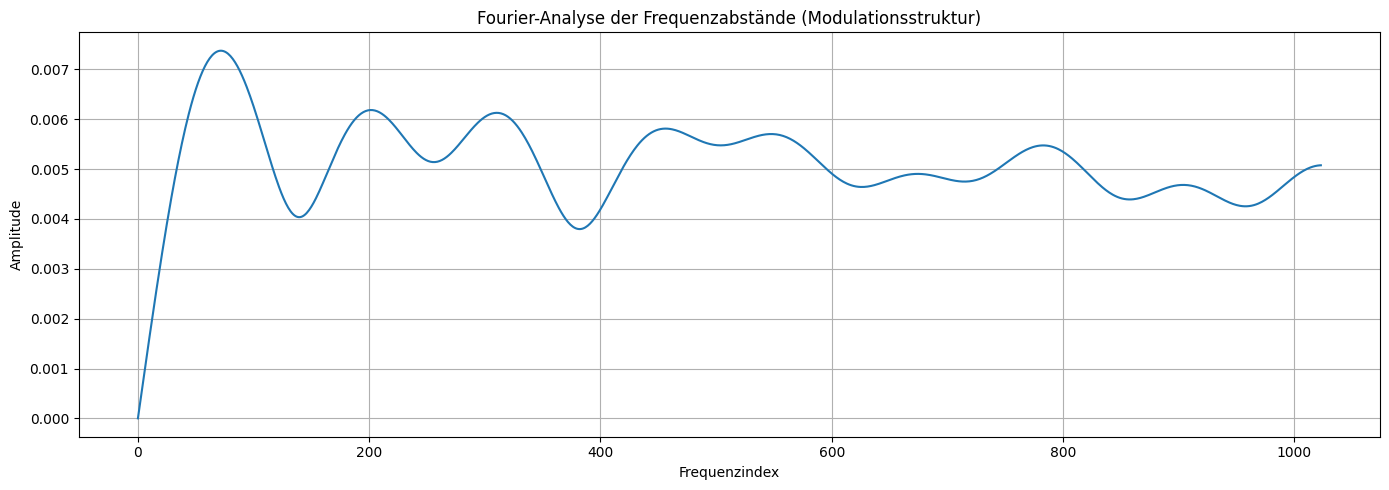

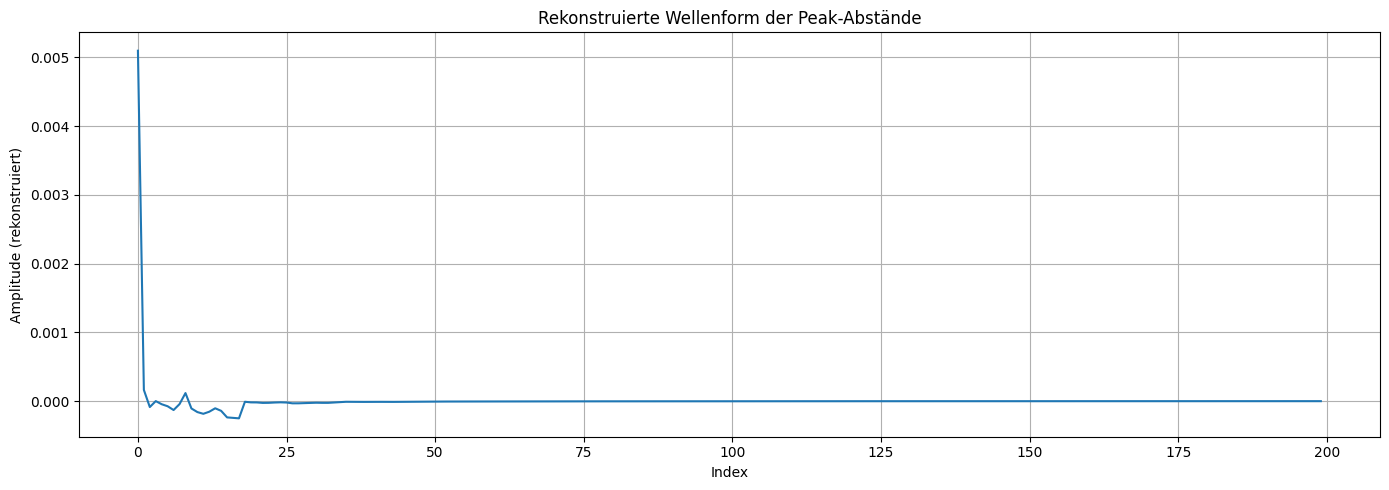

Frequenz  Frequenz (Hz)   MIDI Note Rational (≈) Musikal. Intervall  \
0   0.016366         288.04  61.67   D4       10/611      Sekunde klein   
1   0.021859         384.72  66.68   G4        4/183             Quarte   
2   0.022507         396.12  67.18   G4        7/311             Quarte   
3   0.022684         399.24  67.32   G4       12/529             Quarte   
4   0.023044         405.57  67.59  G#4       23/998             Quarte   
5   0.023318         410.40  67.79  G#4       17/729             Quinte   
6   0.023531         414.15  67.95  G#4         2/85             Quinte   
7   0.023656         416.35  68.04  G#4       11/465             Quinte   
8   0.023965         421.78  68.27  G#4       11/459             Quinte   
9   0.024625         433.40  68.74   A4       23/934             Quinte   
10  0.024851         437.38  68.90   A4       21/845             Quinte   
11  0.024949         439.10  68.96   A4       12/481             Quinte   
12  0.025016         440.28  69.01   A4       25/999             Quinte   
13  0.025161         442.83  69.11   A4       23/914             Quinte   
14  0.025422         447.43  69.29   A4        3/118             Quinte   
15  0.025628         451.05  69.43   A4         1/39             Quinte   
16  0.025661         451.63  69.45   A4       25/974             Quinte   
17  0.025711         452.51  69.49   A4       19/739             Quinte   
18  0.025744         453.09  69.51  A#4       19/738             Quinte   

   Interval-Verh. (≈)    Prime Ratio (≈)  
0               1.067   5/307 ≈ 0.016287  
1               1.333  11/503 ≈ 0.021869  
2               1.333   7/311 ≈ 0.022508  
3               1.333  11/487 ≈ 0.022587  
4               1.333  11/479 ≈ 0.022965  
5               1.500  11/467 ≈ 0.023555  
6               1.500  11/467 ≈ 0.023555  
7               1.500   3/127 ≈ 0.023622  
8               1.500   7/293 ≈ 0.023891  
9               1.500   7/283 ≈ 0.024735  
10              1.500  13/523 ≈ 0.024857  
11              1.500  13/521 ≈ 0.024952  
12              1.500  11/439 ≈ 0.025057  
13              1.500   5/199 ≈ 0.025126  
14              1.500  11/433 ≈ 0.025404  
15              1.500  13/509 ≈ 0.025540  
16              1.500  13/509 ≈ 0.025540  
17              1.500   7/271 ≈ 0.025830  
18              1.500   7/271 ≈ 0.025830

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction
from sympy import prime
from scipy.fft import fft, ifft
import pandas as pd

# === 1. Frequenzpeaks und Log-Amplituden ===
frequencies = np.array([
    0.016366, 0.021859, 0.022507, 0.022684, 0.023044, 0.023318, 0.023531,
    0.023656, 0.023965, 0.024625, 0.024851, 0.024949, 0.025016, 0.025161,
    0.025422, 0.025628, 0.025661, 0.025711, 0.025744
])
log_amplitudes = np.array([
    -2.955434, -3.332554, -3.371012, -3.381198, -3.401669, -3.417130,
    -3.428898, -3.435915, -3.452816, -3.488091, -3.500115, -3.505202,
    -3.508806, -3.516333, -3.529817, -3.540228, -3.541977, -3.544525,
    -3.546086
])
amplitudes = 10 ** log_amplitudes

# === 2. Rationale Näherungen ===
ratios = [Fraction(f).limit_denominator(1000) for f in frequencies]

# === 3. Musikalische Intervall-Approximationen (relativ zum ersten Ton) ===
common_intervals = {
    "Oktave": 2/1, "Quinte": 3/2, "Quarte": 4/3,
    "Terz groß": 5/4, "Terz klein": 6/5,
    "Sekunde groß": 9/8, "Sekunde klein": 16/15
}
freq_ratios_to_base = frequencies / frequencies[0]
approx_intervals = []
for r in freq_ratios_to_base:
    closest = min(common_intervals.items(), key=lambda x: abs(r - x[1]))
    approx_intervals.append((closest[0], float(closest[1])))

# === 4. Primzahlverhältnisse (f ≈ p1/p2) ===
prime_ratios = []
primes = [prime(i) for i in range(1, 100)]
for f in frequencies:
    best_ratio = min(((p1, p2) for p1 in primes for p2 in primes if p2 != 0),
                     key=lambda pair: abs(f - pair[0]/pair[1]))
    prime_ratios.append(f"{best_ratio[0]}/{best_ratio[1]} ≈ {best_ratio[0]/best_ratio[1]:.6f}")

# === 5. MIDI-Notennummern & Notennamen (angenommen: Frequenz * f_ref = Hz) ===
# Annahme: Grundfrequenz 440 Hz entspricht Tonhöhe (optional skalieren)
# Beispiel-Skalierung (f = 0.025 → 440 Hz): f_ref = 440 / 0.025 = 17600
f_ref = 17600
frequencies_hz = frequencies * f_ref
midi = 69 + 12 * np.log2(frequencies_hz / 440)
note_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
notes = [note_names[int(round(m)) % 12] + str(int((round(m)) // 12 - 1)) for m in midi]

# === 6. Fourier-Analyse der Frequenzabstände ===
delta_f = np.diff(frequencies)
delta_f_centered = delta_f - np.mean(delta_f)
delta_fft = np.abs(fft(delta_f_centered, n=2048))

# === 7. Inverse-FFT (quasi "Wellenform" der Spektralstruktur) ===
reconstructed = np.real(ifft(delta_fft))

# === 8. PLOT: Fourier der Frequenzabstände ===
plt.figure(figsize=(14, 5))
plt.plot(delta_fft[:1024])
plt.title("Fourier-Analyse der Frequenzabstände (Modulationsstruktur)")
plt.xlabel("Frequenzindex")
plt.ylabel("Amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 9. PLOT: Inverse-FFT der Abstände ===
plt.figure(figsize=(14, 5))
plt.plot(reconstructed[:200])
plt.title("Rekonstruierte Wellenform der Peak-Abstände")
plt.xlabel("Index")
plt.ylabel("Amplitude (rekonstruiert)")
plt.grid(True)
plt.tight_layout()
plt.show()

# === 10. Zusammenfassung als Tabelle ===
df = pd.DataFrame({
    "Frequenz": frequencies,
    "Frequenz (Hz)": frequencies_hz.round(2),
    "MIDI": midi.round(2),
    "Note": notes,
    "Rational (≈)": [str(r) for r in ratios],
    "Musikal. Intervall": [i[0] for i in approx_intervals],
    "Interval-Verh. (≈)": [f"{i[1]:.3f}" for i in approx_intervals],
    "Prime Ratio (≈)": prime_ratios
})
from IPython.display import display
display(df)

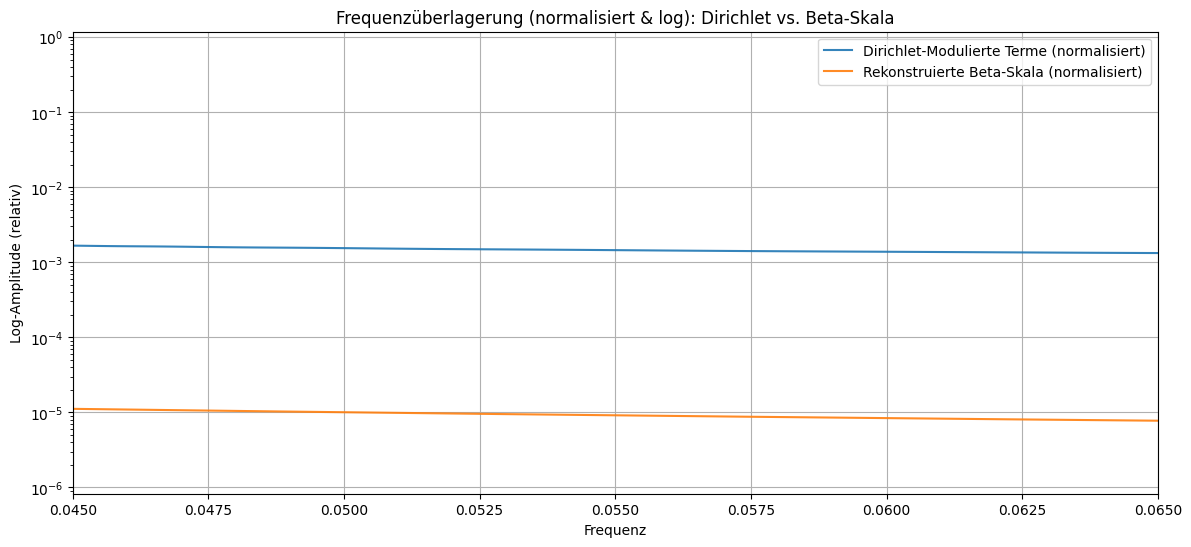

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# === 1. Pfade zur CSV-Dateien ===
dirichlet_path = '/content/drive/MyDrive/dirichlet_modulated_terms.csv'
beta_path = '/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv'

# === 2. Daten laden ===
df_d = pd.read_csv(dirichlet_path)
df_b = pd.read_csv(beta_path, skiprows=1, header=None)

# === 3. Flatten & FFT-Vorbereitung ===
d_vals = df_d.values.flatten().astype(float)
b_vals = df_b.values.flatten().astype(float)

# === 4. FFT berechnen ===
fft_d = np.fft.fft(d_vals)
fft_b = np.fft.fft(b_vals)

freqs_d = np.fft.fftfreq(len(d_vals))
freqs_b = np.fft.fftfreq(len(b_vals))

# Nur positive Frequenzen nehmen
pos_idx_d = freqs_d > 0
pos_idx_b = freqs_b > 0

# === 5. Normalisieren ===
norm_fft_d = np.abs(fft_d[pos_idx_d]) / np.max(np.abs(fft_d[pos_idx_d]))
norm_fft_b = np.abs(fft_b[pos_idx_b]) / np.max(np.abs(fft_b[pos_idx_b]))

# === 6. Glättung (optional) ===
smooth_d = gaussian_filter1d(norm_fft_d, sigma=2)
smooth_b = gaussian_filter1d(norm_fft_b, sigma=2)

# === 7. Plot ===
plt.figure(figsize=(14, 6))
plt.plot(freqs_d[pos_idx_d], smooth_d, label="Dirichlet-Modulierte Terme (normalisiert)", alpha=0.9)
plt.plot(freqs_b[pos_idx_b], smooth_b, label="Rekonstruierte Beta-Skala (normalisiert)", alpha=0.9)

plt.xlim(0.045, 0.065)
plt.yscale('log')
plt.xlabel("Frequenz")
plt.ylabel("Log-Amplitude (relativ)")
plt.title("Frequenzüberlagerung (normalisiert & log): Dirichlet vs. Beta-Skala")
plt.legend()
plt.grid(True)
plt.show()

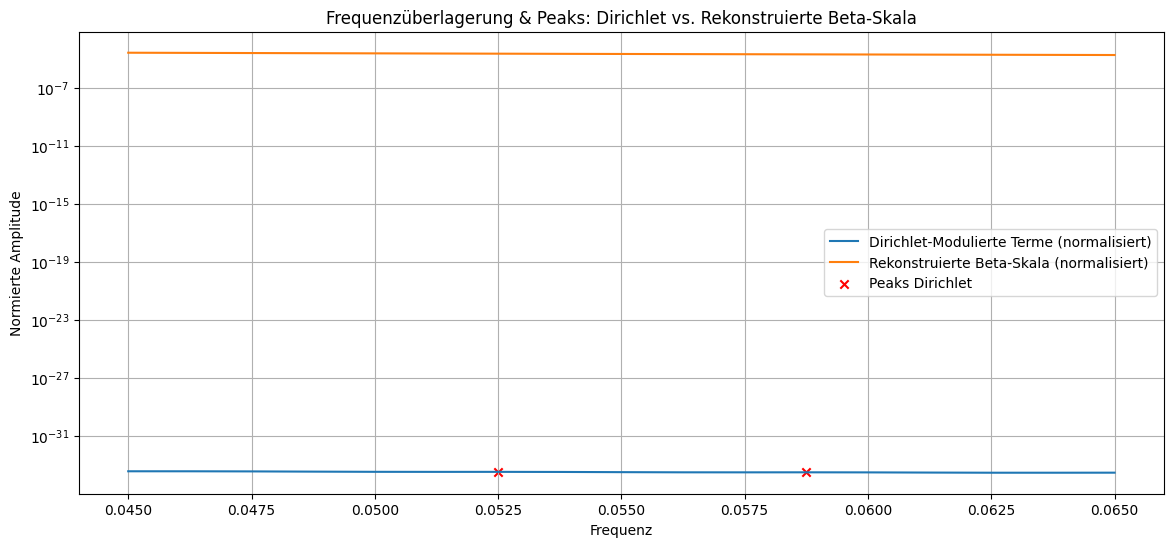

Frequenz  Amplitude (log-normiert)
0   0.05250                -33.469729
1   0.05875                -33.501065

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# === 1. Dateien laden ===
dirichlet_path = '/content/drive/MyDrive/dirichlet_modulated_terms.csv'
beta_path = '/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv'

df_d = pd.read_csv(dirichlet_path)
dirichlet_values = df_d.iloc[:, 1].values
dirichlet_values -= np.mean(dirichlet_values)  # Mittelwertzentrierung

df_b = pd.read_csv(beta_path, header=None, skiprows=1)  # Header überspringen
beta_values = df_b.values.flatten().astype(float)
beta_values -= np.mean(beta_values)  # Mittelwertzentrierung

# === 2. FFT berechnen ===
def compute_fft(values):
    N = len(values)
    fft_vals = np.abs(fft(values))[:N // 2]
    fft_vals = gaussian_filter1d(fft_vals, sigma=2)
    fft_freqs = np.fft.fftfreq(N, d=1)[:N // 2]
    return fft_freqs, fft_vals

freq_d, amp_d = compute_fft(dirichlet_values)
freq_b, amp_b = compute_fft(beta_values)

# === 3. Frequenzbereich eingrenzen ===
low, high = 0.045, 0.065
mask_d = (freq_d >= low) & (freq_d <= high)
mask_b = (freq_b >= low) & (freq_b <= high)

# === 4. Peaks finden ===
peaks_d, _ = find_peaks(amp_d[mask_d], height=np.max(amp_d[mask_d]) * 0.3)
top_freqs_d = freq_d[mask_d][peaks_d]
top_amps_d = amp_d[mask_d][peaks_d]

# === 5. Plot ===
plt.figure(figsize=(14, 6))
plt.plot(freq_d[mask_d], amp_d[mask_d] / np.max(amp_d), label='Dirichlet-Modulierte Terme (normalisiert)')
plt.plot(freq_b[mask_b], amp_b[mask_b] / np.max(amp_b), label='Rekonstruierte Beta-Skala (normalisiert)')
plt.scatter(top_freqs_d, top_amps_d / np.max(amp_d), color='red', marker='x', label='Peaks Dirichlet')
plt.xlabel('Frequenz')
plt.ylabel('Normierte Amplitude')
plt.yscale('log')
plt.title('Frequenzüberlagerung & Peaks: Dirichlet vs. Rekonstruierte Beta-Skala')
plt.legend()
plt.grid(True)
plt.show()

# === 6. Tabelle der Top-Frequenzen ===
top_df = pd.DataFrame({
    'Frequenz': top_freqs_d,
    'Amplitude (log-normiert)': np.log10(top_amps_d / np.max(amp_d))
})
top_df = top_df.sort_values(by='Amplitude (log-normiert)', ascending=False).reset_index(drop=True)
top_df.head(10)  # Ausgabe der Top 10

/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 1024 is greater than input length  = 800, using nperseg = 800
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.11/dist-packages/scipy/signal/_spectral_py.py:1668: RuntimeWarning: invalid value encountered in divide
  Cxy = np.abs(Pxy)**2 / Pxx / Pyy


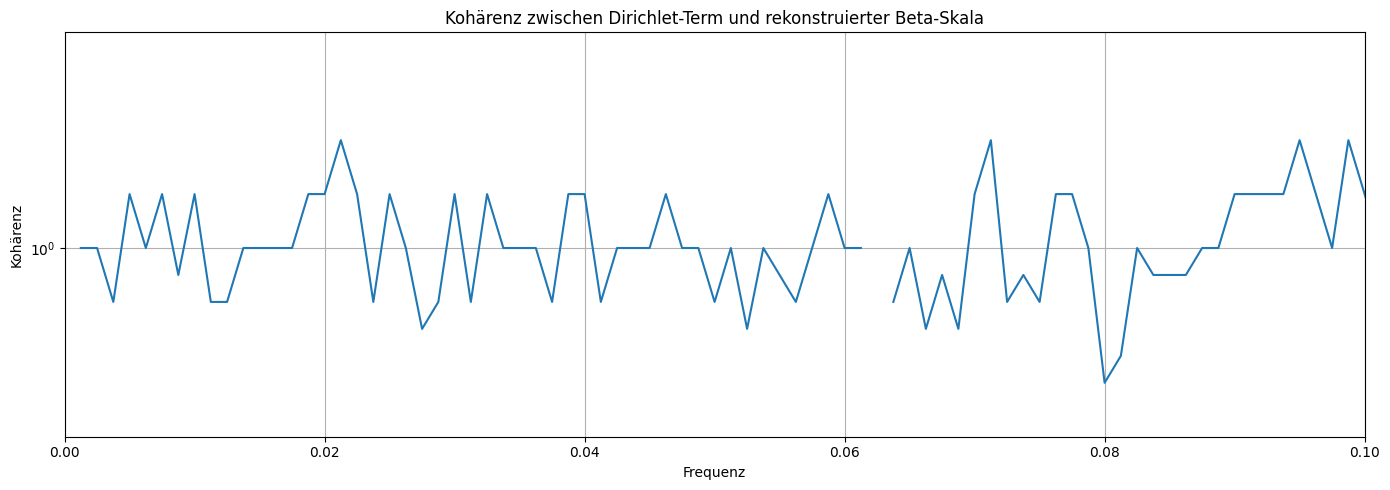

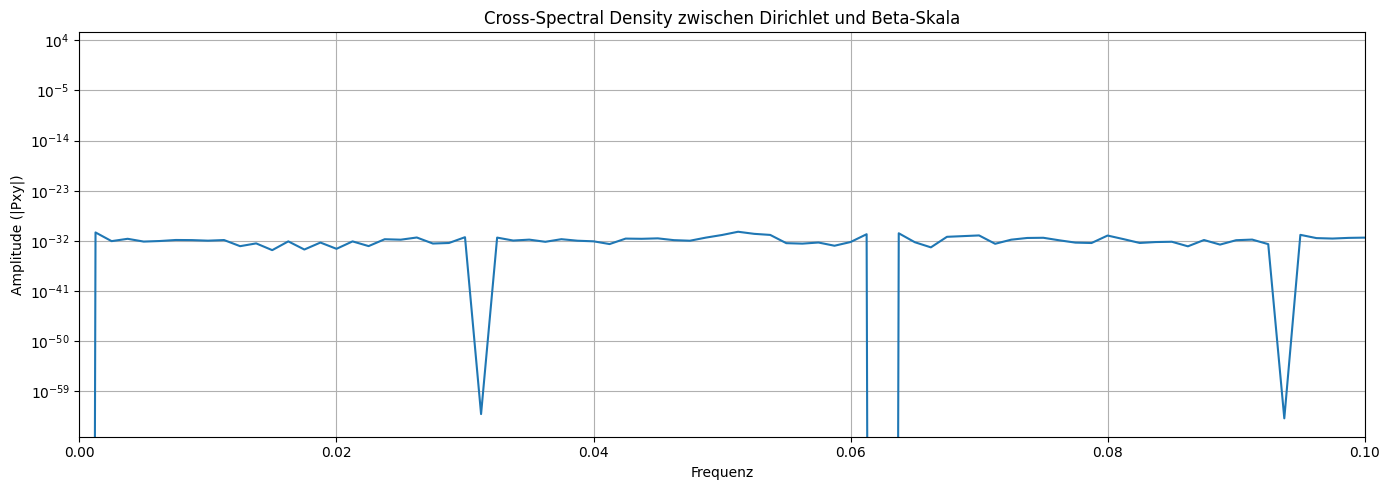

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import coherence, welch

# === 1. CSV-Dateien laden ===
dirichlet_path = '/content/drive/MyDrive/dirichlet_modulated_terms.csv'
beta_path = '/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv'

# Dirichlet-Werte (zweite Spalte, Mittelwert zentrieren)
dirichlet_values = pd.read_csv(dirichlet_path).iloc[:, 1].astype(float).values
dirichlet_values -= np.mean(dirichlet_values)

# Beta-Werte (erste Spalte, Header überspringen, Mittelwert zentrieren)
beta_values = pd.read_csv(beta_path, skiprows=1, header=None).values.flatten().astype(float)
beta_values -= np.mean(beta_values)

# === 2. Auf gleiche Länge kürzen ===
min_len = min(len(dirichlet_values), len(beta_values))
dirichlet_values = dirichlet_values[:min_len]
beta_values = beta_values[:min_len]

# === 3. Kohärenz berechnen ===
fs = 1.0  # Samplingrate: 1 Einheit pro Sample
f_coh, Cxy = coherence(dirichlet_values, beta_values, fs=fs, nperseg=1024)

# === 4. Cross-Spectral Density berechnen ===
f_csd, Pxy = welch([dirichlet_values, beta_values], fs=fs, nperseg=1024, axis=-1)
csd_magnitude = np.abs(Pxy[0])  # Betrag der CSD

# === 5. Plot: Kohärenz ===
plt.figure(figsize=(14, 5))
plt.semilogy(f_coh, Cxy)
plt.title("Kohärenz zwischen Dirichlet-Term und rekonstruierter Beta-Skala")
plt.xlabel("Frequenz")
plt.ylabel("Kohärenz")
plt.grid(True)
plt.xlim(0, 0.1)
plt.tight_layout()
plt.show()

# === 6. Plot: Cross-Spectral Density ===
plt.figure(figsize=(14, 5))
plt.semilogy(f_csd, csd_magnitude)
plt.title("Cross-Spectral Density zwischen Dirichlet und Beta-Skala")
plt.xlabel("Frequenz")
plt.ylabel("Amplitude (|Pxy|)")
plt.grid(True)
plt.xlim(0, 0.1)
plt.tight_layout()
plt.show()

<ipython-input-12-26424c9717d4>:29: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(eigvals[:20]), 'ro')


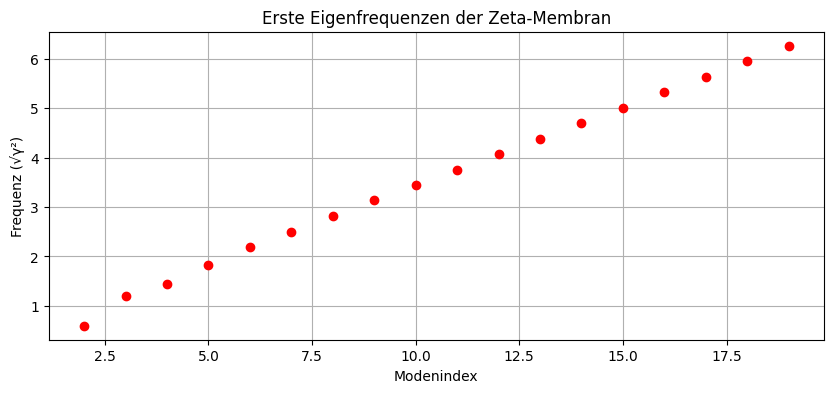

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

# Parameter
L = 10  # Länge des Membran-Intervalls
N = 1000  # Diskretisierung
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# Frequenzen aus deinen spektralen Peaks (normiert)
frequencies = np.array([0.0525, 0.05875, 0.102, 0.203, 0.309, 0.401])
amplitudes = np.ones_like(frequencies)

# Potenzial aus dominanten spektralen Komponenten
V = np.zeros_like(x)
for A, f in zip(amplitudes, frequencies):
    V += A * np.cos(2 * np.pi * f * x)

# Zweite Ableitung (Laplace) als tridiagonale Matrix
diagonal = 2 / dx**2 + V
off_diagonal = -1 / dx**2 * np.ones(N - 1)

# Eigenwerte und Eigenvektoren berechnen
eigvals, eigvecs = eigh_tridiagonal(diagonal, off_diagonal, select='i', select_range=(0, 50))

# Plot der ersten 20 Eigenwerte (Wurzel = Frequenzen)
plt.figure(figsize=(10, 4))
plt.plot(np.sqrt(eigvals[:20]), 'ro')
plt.title("Erste Eigenfrequenzen der Zeta-Membran")
plt.ylabel("Frequenz (√γ²)")
plt.xlabel("Modenindex")
plt.grid(True)
plt.show()

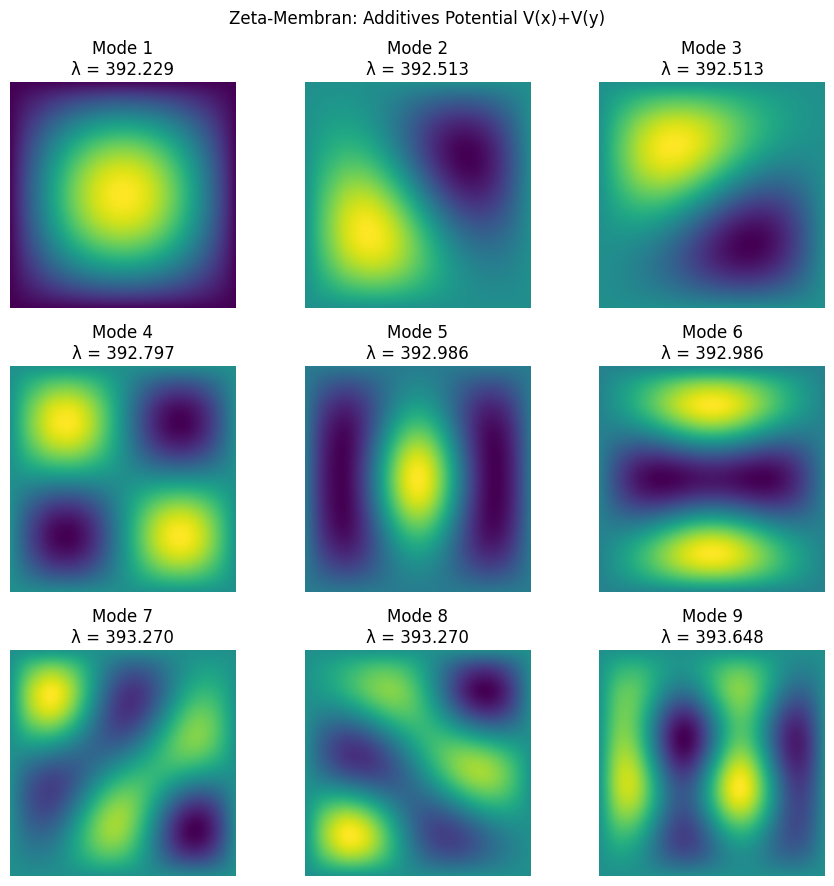

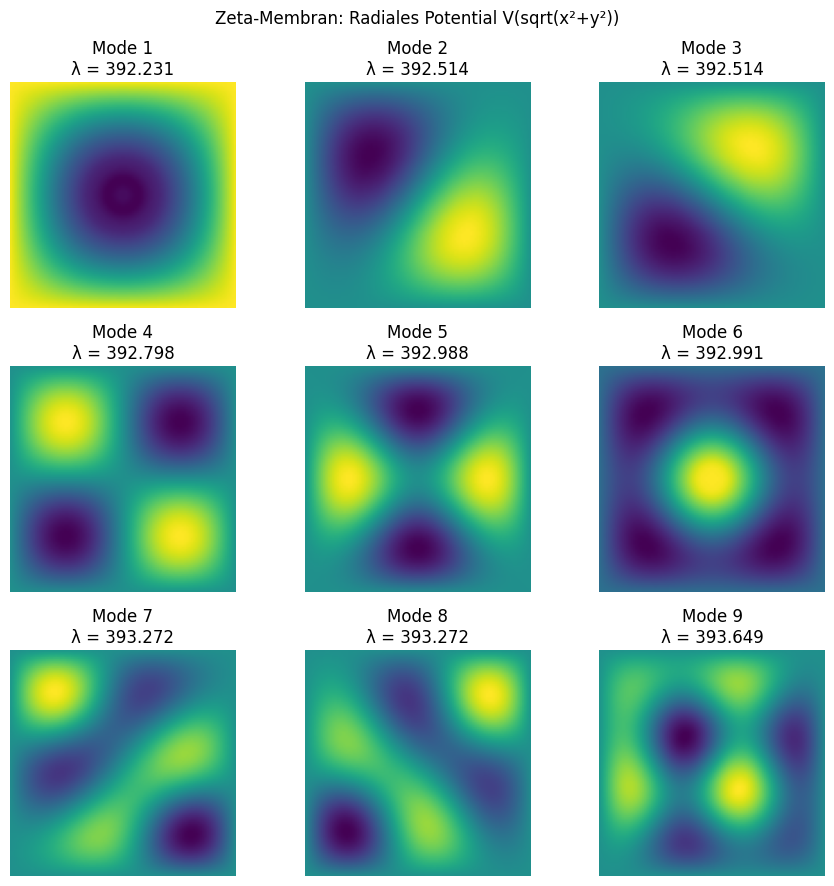

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags, kron, identity
from scipy.sparse.linalg import eigsh

# Zeta-inspiriertes Potential (vereinfachte Version mit Oszillationen)
def V_zeta_1D(x):
    return np.sin(2 * np.pi * x) * np.exp(-x)

# Settings
N = 100
L = 10
x = np.linspace(0, L, N)
dx = x[1] - x[0]

# 1D Potential
V1D = V_zeta_1D(x)

# 2D Meshgrid
X, Y = np.meshgrid(x, x)

# Variante A: Additiv
V_add = np.tile(V1D, (N, 1)) + np.tile(V1D[:, np.newaxis], (1, N))

# Variante B: Radial
R = np.sqrt((X - L/2)**2 + (Y - L/2)**2)
V_radial = V_zeta_1D(R)

# Laplace Operator (2D, finite difference)
main_diag = -4 * np.ones(N)
side_diag = np.ones(N - 1)
lap1D = diags([main_diag, side_diag, side_diag], [0, -1, 1]) / dx**2
I = identity(N)
lap2D = kron(I, lap1D) + kron(lap1D, I)

# Funktion zur Eigenberechnung
def compute_modes(V2D, title):
    V_flat = V2D.flatten()
    H = -lap2D + diags(V_flat, 0)
    eigvals, eigvecs = eigsh(H, k=9, which='SM')
    fig, axs = plt.subplots(3, 3, figsize=(9, 9))
    for i, ax in enumerate(axs.flat):
        im = ax.imshow(eigvecs[:, i].reshape(N, N), cmap='viridis')
        ax.set_title(f"Mode {i+1}\nλ = {eigvals[i]:.3f}")
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Berechnung und Visualisierung
compute_modes(V_add, "Zeta-Membran: Additives Potential V(x)+V(y)")
compute_modes(V_radial, "Zeta-Membran: Radiales Potential V(sqrt(x²+y²))")

Optimaler β-Wert: 0.6556986656


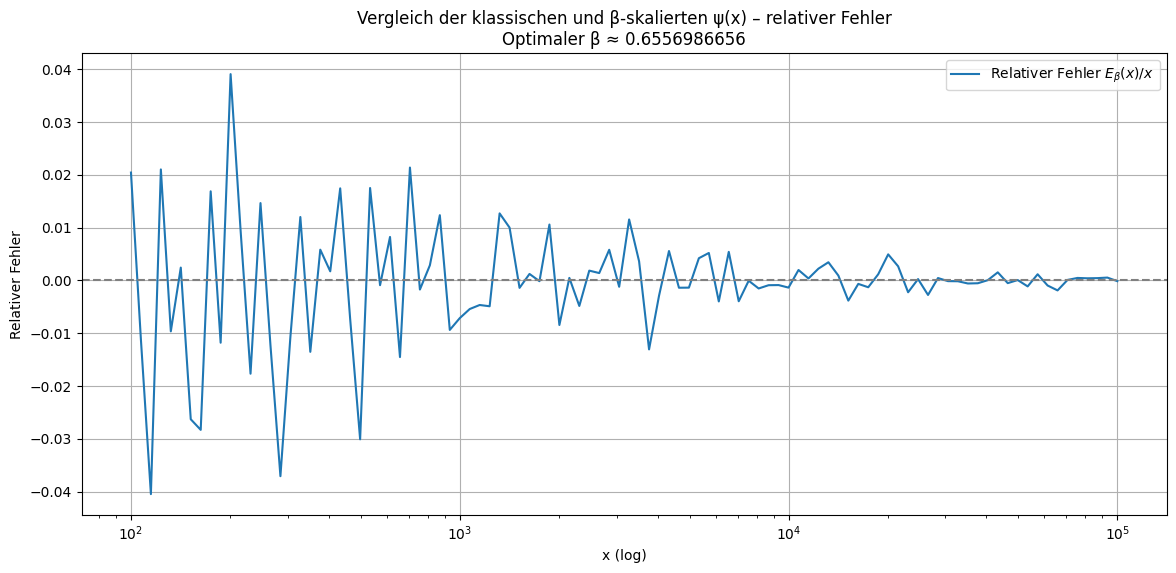

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# Lade die Nullstellen aus CSV (vorher konvertiert aus .txt)
# Format: Eine Spalte, z. B. 'gamma' oder ohne Header
zeros_df = pd.read_csv('/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv', header=None)
zeros = zeros_df[0].values

# x-Werte (logarithmisch verteilt)
x_vals = np.logspace(2, 5, 100)

# Wahre ψ(x): hier einfach als Näherung x (für Primzahldichte grob ausreichend)
psi_true = x_vals

# Optimierte Spektralformel ψ_beta(x)
def psi_spectral_fast(x_array, beta, zeros):
    gamma = zeros
    s = 0.5 + 1j * beta * gamma[:, np.newaxis]  # Form: (n_zeros, 1)
    X = x_array[np.newaxis, :]                 # Form: (1, n_x)
    terms = X**s / s                           # Broadcasting
    spectral_sum = np.sum(terms, axis=0)
    return x_array - 2 * np.real(spectral_sum)

# Zielfunktion für Minimierung: mittlerer quadratischer Fehler
def mean_squared_error(beta):
    psi_beta = psi_spectral_fast(x_vals, beta, zeros)
    return np.mean((psi_beta - psi_true)**2)

# Optimiere β
result = minimize_scalar(mean_squared_error, bounds=(0.1, 1.0), method='bounded')
optimal_beta = result.x
print(f"Optimaler β-Wert: {optimal_beta:.10f}")

# Berechne spektrale ψ mit optimalem β
psi_beta_vals = psi_spectral_fast(x_vals, optimal_beta, zeros)

# Relativer Fehler
rel_error = (psi_beta_vals - psi_true) / x_vals

# Plot
plt.figure(figsize=(14, 6))
plt.semilogx(x_vals, rel_error, label=r"Relativer Fehler $E_\beta(x)/x$")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("x (log)")
plt.ylabel("Relativer Fehler")
plt.title(f"Vergleich der klassischen und β-skalierten ψ(x) – relativer Fehler\nOptimaler β ≈ {optimal_beta:.10f}")
plt.legend()
plt.grid(True)
plt.show()

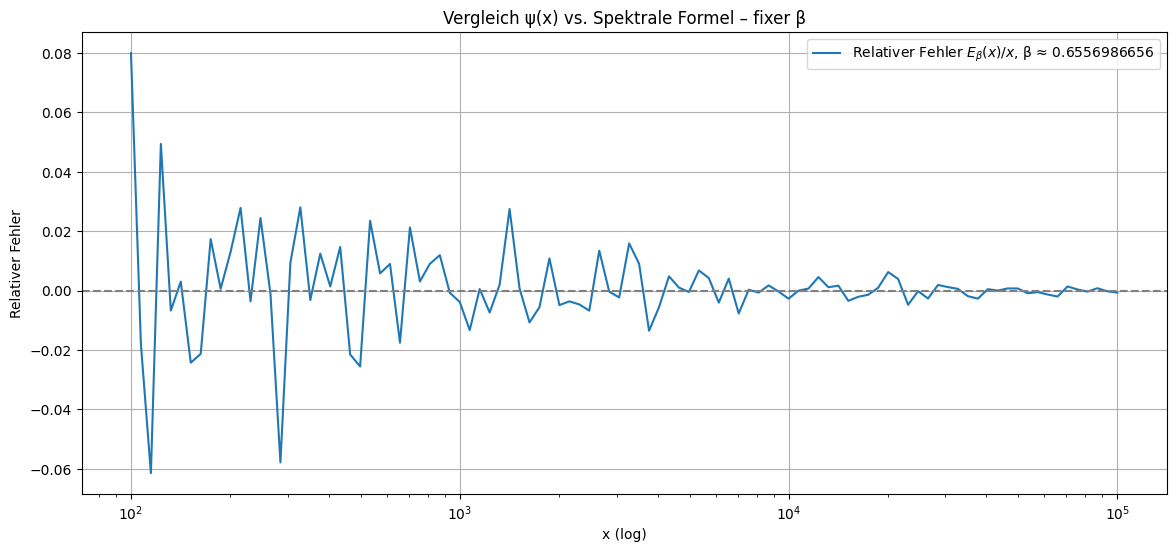

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import primerange

# Lade Zeta-Nullstellen
zeros = pd.read_csv("/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv", header=None).values.flatten()

# Fester Beta-Wert (aus vorheriger Optimierung)
beta = 0.6556986656  # fest, kein Optimieren nötig

# Wertebereich für x
x_vals = np.logspace(2, 5, 100)
x_int = np.round(x_vals).astype(int)

# Echte ψ(x): Summe von log(p) für alle Primzahlen p^k ≤ x
def chebyshev_psi(x):
    psi = 0
    for p in primerange(2, x+1):
        pk = p
        while pk <= x:
            psi += np.log(p)
            pk *= p
    return psi

# Vektorisiere ψ(x)
psi_true = np.array([chebyshev_psi(int(xi)) for xi in x_int])

# Fehlerberechnung mit festem Beta
errors = []
for xi, psi_x in zip(x_vals, psi_true):
    spec_sum = np.sum([
        xi**(0.5 + 1j * beta * gamma) / (0.5 + 1j * beta * gamma)
        for gamma in zeros
    ])
    psi_beta = xi - 2 * np.real(spec_sum)
    errors.append((psi_beta - psi_x) / xi)

# Plot
plt.figure(figsize=(14, 6))
plt.semilogx(x_vals, errors, label=fr"Relativer Fehler $E_\beta(x)/x$, β ≈ {beta}")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("x (log)")
plt.ylabel("Relativer Fehler")
plt.title("Vergleich ψ(x) vs. Spektrale Formel – fixer β")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import primepi
from scipy.optimize import minimize_scalar

# Lade Primzahlen (angenommen, sie sind in einer Spalte ohne Header)
prim_path = '/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv'
primes = pd.read_csv(prim_path, header=None).values.flatten()

# Wertebereich für x (bis zur größten Primzahl)
x_vals = np.logspace(2, np.log10(primes[-1]), 200)

# Klassische π(x): Anzahl der Primzahlen ≤ x
def pi_classical(x_array):
    return np.array([np.sum(primes <= x) for x in x_array])

# Spektrale Näherung über Zeta-Nullstellen
# Beispielhafte vereinfachte Form zur Illustration (anpassbar):
def pi_spectral(x_array, beta, zeros):
    result = []
    for x in x_array:
        spec_sum = np.sum([x**(0.5 + 1j * beta * gamma) / (0.5 + 1j * beta * gamma) for gamma in zeros])
        pi_approx = x / np.log(x) - 2 * np.real(spec_sum) / np.log(x)
        result.append(pi_approx)
    return np.array(result)

# Zeta-Nullstellen laden
zeros_path = '/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv'
zeros = pd.read_csv(zeros_path, header=None).values.flatten()

# Fehlerfunktion zur Optimierung von Beta
def beta_error_pi(beta):
    pi_true = pi_classical(x_vals)
    pi_approx = pi_spectral(x_vals, beta, zeros)
    error = np.mean((pi_true - pi_approx)**2)
    return error

# Beta optimieren
res = minimize_scalar(beta_error_pi, bounds=(0.5, 0.9), method='bounded')
optimal_beta = res.x
print(f"Optimaler Beta-Wert: {optimal_beta:.10f}")

# Plot
pi_true = pi_classical(x_vals)
pi_approx = pi_spectral(x_vals, optimal_beta, zeros)
rel_error = (pi_approx - pi_true) / pi_true

plt.figure(figsize=(14, 6))
plt.semilogx(x_vals, rel_error, label=fr"Relativer Fehler $\pi_\beta(x)/\pi(x) - 1$, $\beta \approx {optimal_beta:.10f}$")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("x (log)")
plt.ylabel("Relativer Fehler")
plt.title("Vergleich π(x) klassisch vs. spektrale Näherung")
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-6-73f71d8b02b2>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  primes = pd.read_csv(prim_path, header=None).values.flatten()


TypeError: '<=' not supported between instances of 'str' and 'float'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import primerange
from scipy.optimize import minimize_scalar

# CSV mit expliziter Umwandlung zu int
prim_path = '/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv'
primes = pd.read_csv(prim_path, header=None, dtype=str)[0].astype(int).values

# Zeta-Nullstellen laden
zeros_path = '/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv'
zeros = pd.read_csv(zeros_path, header=None).values.flatten()

# Wertebereich für x
x_vals = np.logspace(2, np.log10(primes[-1]), 200)

# Klassische π(x): Anzahl der Primzahlen ≤ x
def pi_classical(x_array):
    return np.array([np.sum(primes <= x) for x in x_array])

# Spektrale Näherung (vereinfachte Illustration)
def pi_spectral(x_array, beta, zeros):
    result = []
    for x in x_array:
        spec_sum = np.sum([x**(0.5 + 1j * beta * gamma) / (0.5 + 1j * beta * gamma) for gamma in zeros])
        pi_approx = x / np.log(x) - 2 * np.real(spec_sum) / np.log(x)
        result.append(pi_approx)
    return np.array(result)

# Fehlerfunktion für Beta
def beta_error_pi(beta):
    pi_true = pi_classical(x_vals)
    pi_approx = pi_spectral(x_vals, beta, zeros)
    return np.mean((pi_true - pi_approx)**2)

# Optimierung
res = minimize_scalar(beta_error_pi, bounds=(0.5, 0.9), method='bounded')
optimal_beta = res.x
print(f"Optimaler Beta-Wert: {optimal_beta:.10f}")

# Plot des Fehlers
pi_true = pi_classical(x_vals)
pi_approx = pi_spectral(x_vals, optimal_beta, zeros)
rel_error = (pi_approx - pi_true) / pi_true

plt.figure(figsize=(14, 6))
plt.semilogx(x_vals, rel_error, label=fr"Relativer Fehler $\pi_\beta(x)/\pi(x) - 1$, $\beta \approx {optimal_beta:.10f}$")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("x (log)")
plt.ylabel("Relativer Fehler")
plt.title("Vergleich π(x) klassisch vs. spektrale Näherung")
plt.legend()
plt.grid(True)
plt.show()

ValueError: invalid literal for int() with base 10: 'Primzahlen'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# === 1. Primzahlen laden (Header überspringen) ===
prim_path = '/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv'
primes = pd.read_csv(prim_path, skiprows=1, header=None).values.flatten().astype(int)

# === 2. Zeta-Nullstellen laden ===
zeros_path = '/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv'
zeros = pd.read_csv(zeros_path, header=None).values.flatten()

# === 3. Wertebereich für x ===
x_vals = np.logspace(2, np.log10(primes[-1]), 200)

# === 4. Klassische Primzahlzählfunktion π(x) ===
def pi_classical(x_array):
    return np.array([np.sum(primes <= x) for x in x_array])

# === 5. Spektrale Näherung (vereinfachtes Modell) ===
def pi_spectral(x_array, beta, zeros):
    result = []
    for x in x_array:
        if x <= 1:  # Schutz gegen log(0)
            result.append(0)
        else:
            spec_sum = np.sum([x**(0.5 + 1j * beta * gamma) / (0.5 + 1j * beta * gamma) for gamma in zeros])
            pi_approx = x / np.log(x) - 2 * np.real(spec_sum) / np.log(x)
            result.append(pi_approx)
    return np.array(result)

# === 6. Fehlerfunktion für Beta-Optimierung ===
def beta_error_pi(beta):
    pi_true = pi_classical(x_vals)
    pi_approx = pi_spectral(x_vals, beta, zeros)
    return np.mean((pi_true - pi_approx)**2)

# === 7. Optimierung von Beta ===
res = minimize_scalar(beta_error_pi, bounds=(0.5, 0.9), method='bounded')
optimal_beta = res.x
print(f"Optimaler Beta-Wert: {optimal_beta:.10f}")

# === 8. Vergleich & Visualisierung ===
pi_true = pi_classical(x_vals)
pi_approx = pi_spectral(x_vals, optimal_beta, zeros)
rel_error = (pi_approx - pi_true) / pi_true

plt.figure(figsize=(14, 6))
plt.semilogx(x_vals, rel_error, label=fr"Relativer Fehler $\pi_\beta(x)/\pi(x) - 1$, β ≈ {optimal_beta:.10f}")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("x (log)")
plt.ylabel("Relativer Fehler")
plt.title("Vergleich π(x) klassisch vs. spektrale Näherung")
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

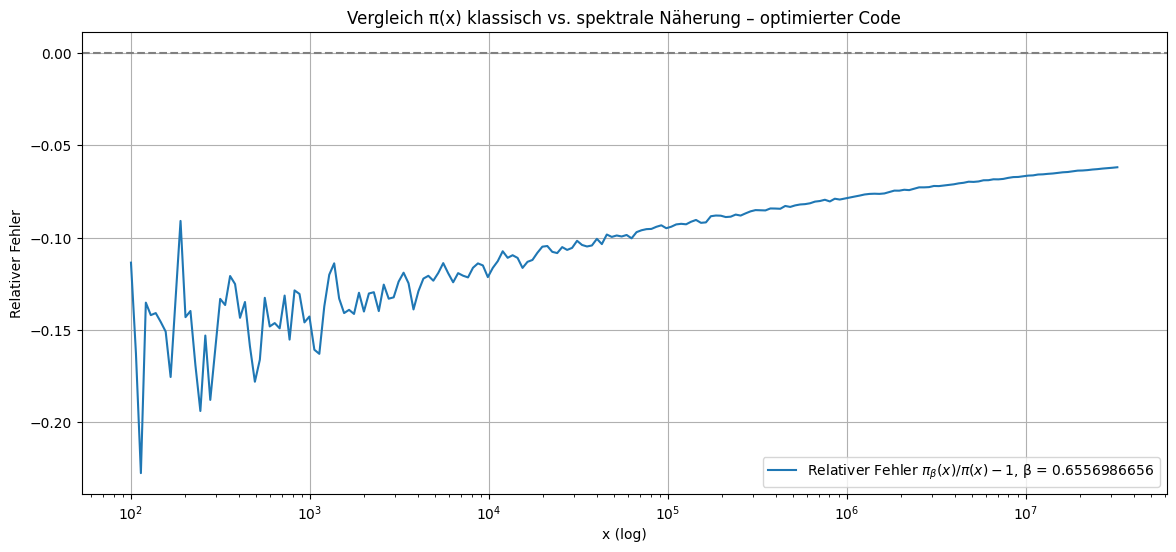

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === 1. Primzahlen laden (Header überspringen) ===
prim_path = '/content/drive/MyDrive/Aus Chrome gespeichert/primzahlen2mio.csv'
primes = pd.read_csv(prim_path, skiprows=1, header=None).values.flatten().astype(int)

# === 2. Nullstellen laden und kürzen ===
zeros_path = '/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv'
zeros = pd.read_csv(zeros_path, header=None).values.flatten()
zeros = zeros[:500]  # Nur die ersten 500 für Performance

# === 3. Fester Beta-Wert aus vorherigem Test ===
beta = 0.6556986656

# === 4. x-Werte definieren ===
x_vals = np.logspace(2, np.log10(primes[-1]), 200)

# === 5. Klassische π(x): Anzahl der Primzahlen ≤ x ===
def pi_classical(x_array):
    return np.array([np.searchsorted(primes, x, side='right') for x in x_array])

# === 6. Spektrale Näherung π_β(x) ===
def pi_spectral(x_array, beta, zeros):
    gamma = 0.5 + 1j * beta * zeros[:, np.newaxis]  # shape: (n_zeros, 1)
    X = x_array[np.newaxis, :]                      # shape: (1, n_x)
    spec_sum = np.sum(X**gamma / gamma, axis=0)
    pi_approx = x_array / np.log(x_array) - 2 * np.real(spec_sum) / np.log(x_array)
    return pi_approx

# === 7. Fehleranalyse und Plot ===
pi_true = pi_classical(x_vals)
pi_beta = pi_spectral(x_vals, beta, zeros)
rel_error = (pi_beta - pi_true) / pi_true

plt.figure(figsize=(14, 6))
plt.semilogx(x_vals, rel_error, label=fr"Relativer Fehler $\pi_\beta(x)/\pi(x) - 1$, β = {beta}")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("x (log)")
plt.ylabel("Relativer Fehler")
plt.title("Vergleich π(x) klassisch vs. spektrale Näherung – optimierter Code")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import primerange

# === 1. Lade Beta-Skala ===
beta_path = '/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv'
beta_values = pd.read_csv(beta_path, header=None).values.flatten()

# === 2. Lade Zeta-Nullstellen (hier exemplarisch, ersetze ggf. durch eigene Datei) ===
zeros_path = '/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv'
zeros = pd.read_csv(zeros_path, header=None).values.flatten()

# === 3. ψ(x) klassisch über Primzahlen ===
def chebyshev_psi(x):
    psi = 0
    for p in primerange(2, x+1):
        pk = p
        while pk <= x:
            psi += np.log(p)
            pk *= p
    return psi

# === 4. Vektor vorbereiten ===
x_vals = np.logspace(2, 5, 100)
x_int = np.round(x_vals).astype(int)
psi_true = np.array([chebyshev_psi(xi) for xi in x_int])

# === 5. Wende Beta-Skala auf spektrale Rekonstruktion an ===
results = []
for beta in beta_values:
    psi_beta_all = []
    for xi in x_vals:
        spec_sum = np.sum([xi**(0.5 + 1j * beta * gamma) / (0.5 + 1j * beta * gamma) for gamma in zeros])
        psi_beta = xi - 2 * np.real(spec_sum)
        psi_beta_all.append(psi_beta)

    rel_errors = (np.array(psi_beta_all) - psi_true) / x_vals
    avg_error = np.mean(np.abs(rel_errors))
    results.append((beta, avg_error))

# === 6. Plot mittlerer Fehler in Abhängigkeit von β ===
results = np.array(results)
plt.figure(figsize=(10, 5))
plt.plot(results[:, 0], results[:, 1], 'o-')
plt.xlabel('β-Wert')
plt.ylabel('Mittlerer relativer Fehler')
plt.title('Rekonstruktionsfehler ψ(x) in Abhängigkeit von β')
plt.grid(True)
plt.show()

<ipython-input-10-31c5032820e9>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  beta_values = pd.read_csv(beta_path, header=None).values.flatten()


TypeError: can't multiply sequence by non-int of type 'complex'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import primerange

# === 1. Lade Beta-Skala mit Konvertierung ===
beta_path = '/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv'
beta_df = pd.read_csv(beta_path, header=None, dtype=str)
# Konvertiere sicher zu float und entferne unlesbare Werte
beta_values = pd.to_numeric(beta_df[0], errors='coerce')
beta_values = beta_values.dropna().astype(float).values

# === 2. Lade Zeta-Nullstellen ===
zeros_path = '/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv'
zeros = pd.read_csv(zeros_path, header=None).values.flatten()

# === 3. ψ(x) klassisch berechnen ===
def chebyshev_psi(x):
    psi = 0
    for p in primerange(2, x+1):
        pk = p
        while pk <= x:
            psi += np.log(p)
            pk *= p
    return psi

# === 4. Vorbereitung ===
x_vals = np.logspace(2, 5, 100)
x_int = np.round(x_vals).astype(int)
psi_true = np.array([chebyshev_psi(xi) for xi in x_int])

# === 5. Analyse jeder Beta-Skalierung ===
results = []
for beta in beta_values:
    try:
        psi_beta_all = []
        for xi in x_vals:
            spec_sum = np.sum([
                xi**(0.5 + 1j * beta * gamma) / (0.5 + 1j * beta * gamma)
                for gamma in zeros
            ])
            psi_beta = xi - 2 * np.real(spec_sum)
            psi_beta_all.append(psi_beta)
        rel_errors = (np.array(psi_beta_all) - psi_true) / x_vals
        avg_error = np.mean(np.abs(rel_errors))
        results.append((beta, avg_error))
    except Exception as e:
        print(f"Fehler bei β = {beta}: {e}")

# === 6. Plot ===
results = np.array(results)
plt.figure(figsize=(10, 5))
plt.plot(results[:, 0], results[:, 1], 'o-')
plt.xlabel('β-Wert')
plt.ylabel('Mittlerer relativer Fehler')
plt.title('Rekonstruktionsfehler ψ(x) in Abhängigkeit von β')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import primerange
from tqdm import tqdm  # Für Fortschrittsanzeige

# === 1. Lade Beta-Skala ===
beta_path = '/content/drive/MyDrive/beta_rekonstruiert_nur_beta_werte.csv'
beta_df = pd.read_csv(beta_path, header=None, dtype=str)
beta_values = pd.to_numeric(beta_df[0], errors='coerce').dropna().astype(float).values

# === 2. Begrenze die Menge an Beta-Werten (z. B. jede 10. nehmen) ===
beta_values = beta_values[::10]

# === 3. Lade Nullstellen und kürze sie ===
zeros_path = '/content/drive/MyDrive/Aus Chrome gespeichert/zeros6_fixed.csv'
zeros = pd.read_csv(zeros_path, header=None).values.flatten()
zeros = zeros[:300]

# === 4. ψ(x) klassisch berechnen ===
def chebyshev_psi(x):
    psi = 0
    for p in primerange(2, x+1):
        pk = p
        while pk <= x:
            psi += np.log(p)
            pk *= p
    return psi

# === 5. x-Werte vorbereiten (kleinere Anzahl) ===
x_vals = np.logspace(2, 5, 30)
x_int = np.round(x_vals).astype(int)
psi_true = np.array([chebyshev_psi(xi) for xi in x_int])

# === 6. Berechne den Fehler für jeden Beta-Wert ===
results = []
for beta in tqdm(beta_values):
    try:
        psi_beta_all = []
        for xi in x_vals:
            spec_sum = np.sum([
                xi**(0.5 + 1j * beta * gamma) / (0.5 + 1j * beta * gamma)
                for gamma in zeros
            ])
            psi_beta = xi - 2 * np.real(spec_sum)
            psi_beta_all.append(psi_beta)
        rel_errors = (np.array(psi_beta_all) - psi_true) / x_vals
        avg_error = np.mean(np.abs(rel_errors))
        results.append((beta, avg_error))
    except Exception as e:
        print(f"Fehler bei β = {beta}: {e}")

# === 7. Plotten ===
results = np.array(results)
plt.figure(figsize=(10, 5))
plt.plot(results[:, 0], results[:, 1], 'o-')
plt.xlabel('β-Wert')
plt.ylabel('Mittlerer relativer Fehler')
plt.title('Rekonstruktionsfehler ψ(x) in Abhängigkeit von β (optimiert)')
plt.grid(True)
plt.show()

  1%|          | 2278/200106 [00:56<1:22:20, 40.04it/s]


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import soundfile as sf
from scipy.signal import chirp
from tqdm import tqdm

# === Parameter ===
csv_path = "/content/drive/MyDrive/beta_rekonstruiert_reduced_100000.csv"  # Pfad zur CSV
output_path = "/content/beta_batch_audio.wav"
sample_rate = 44100
batch_size = 5000
tone_duration = 0.05  # Sekunden pro Beta-Wert

# === Lade Datei in Batches und schreibe Ton abschnittsweise ===
reader = pd.read_csv(csv_path, chunksize=batch_size, header=None)
with sf.SoundFile(output_path, mode='w', samplerate=sample_rate, channels=1, subtype='PCM_16') as wav_file:
    for chunk in tqdm(reader, desc="Verarbeite Beta-Werte"):
        betas = chunk[0].astype(float).values
        for beta in betas:
            freq = np.clip(beta % 1000 + 100, 100, 2000)  # Frequenzbereich begrenzen
            t = np.linspace(0, tone_duration, int(sample_rate * tone_duration), False)
            tone = 0.2 * np.sin(2 * np.pi * freq * t)
            wav_file.write(tone)
print("WAV-Datei erfolgreich erzeugt:", output_path)

Verarbeite Beta-Werte: 0it [00:00, ?it/s]


ValueError: could not convert string to float: 'drift(n)'

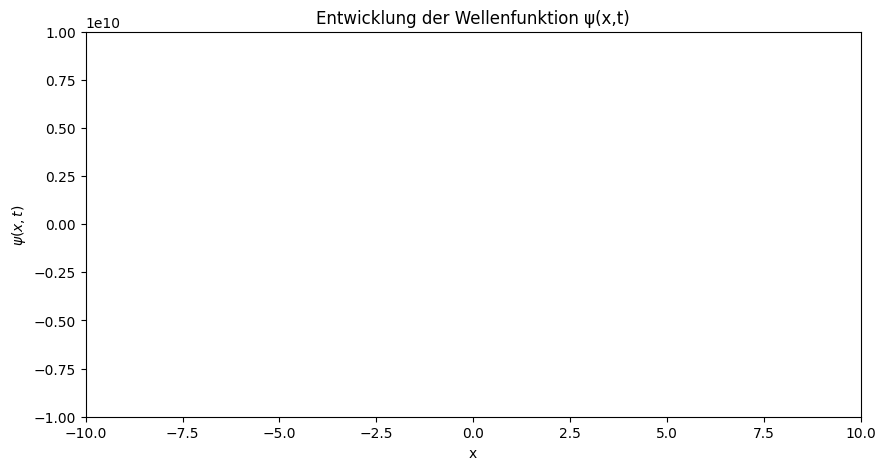

In [4]:
# === Setup ===
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from matplotlib.animation import FuncAnimation

# === Parameter ===
a = 0.2           # Breite der Gauss-Glocke
N = 10            # Anzahl der Summanden (Grad der Hermite-Entwicklung)
x_vals = np.linspace(-10, 10, 1000)  # x-Achse

# === Dynamisch erzeugte Koeffizienten (zum Beispiel vereinfacht) ===
def generate_coeffs(N, t):
    return [np.exp(-n*t) for n in range(N+1)]

# === Konstruktion der Wellenfunktion psi(x,t) ===
def psi(x, t):
    coeffs = generate_coeffs(N, t)
    sum_part = np.zeros_like(x)
    for n in range(N+1):
        H_2n = hermite(2*n)
        term = coeffs[n] * (-1)**n * H_2n(x / a)
        sum_part += term
    return np.exp(x**2 * a**2) * sum_part

# === Plotten der Entwicklung über die Zeit ===
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], lw=2)
ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(-1e10, 1e10)
ax.set_xlabel("x")
ax.set_ylabel(r"$\psi(x,t)$")
ax.set_title("Entwicklung der Wellenfunktion ψ(x,t)")

def update(frame):
    t = frame / 10
    y_vals = psi(x_vals, t)
    line.set_data(x_vals, y_vals)
    ax.set_title(f"ψ(x,t) bei t = {t:.1f}")
    return line,

ani = FuncAnimation(fig, update, frames=30, interval=200)
plt.show()

/usr/local/lib/python3.11/dist-packages/matplotlib/animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


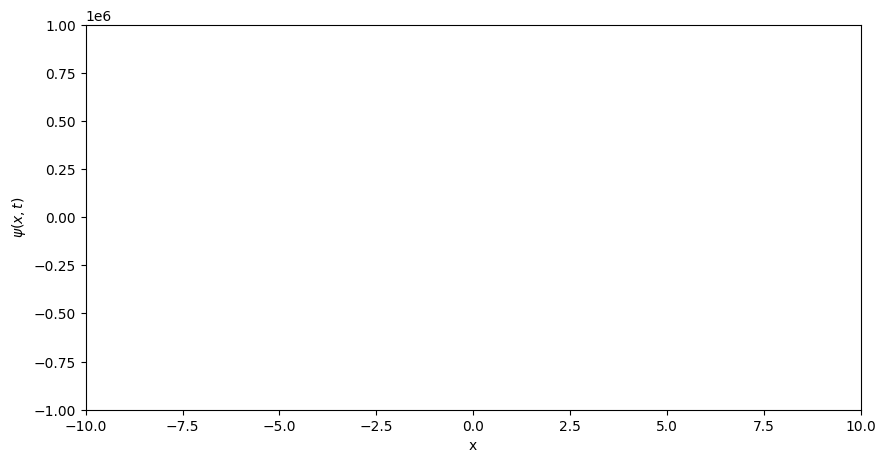

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite
from matplotlib.animation import FuncAnimation

# === Parameter ===
a = 0.2
N = 10
x_vals = np.linspace(-10, 10, 1000)

# === Dynamisch erzeugte Koeffizienten ===
def generate_coeffs(N, t):
    return [np.exp(-n * t) for n in range(N+1)]

# === Wellenfunktion ψ(x,t) mit Begrenzung ===
def psi(x, t):
    coeffs = generate_coeffs(N, t)
    sum_part = np.zeros_like(x)
    for n in range(N+1):
        H_2n = hermite(2 * n)
        term = coeffs[n] * (-1)**n * H_2n(x / a)
        sum_part += term
    result = np.exp(x**2 * a**2) * sum_part
    return np.clip(result, -1e6, 1e6)  # Vermeidung extremer Werte

# === Plot Setup ===
fig, ax = plt.subplots(figsize=(10, 5))
line, = ax.plot([], [], lw=2, color='cyan')
ax.set_xlim(x_vals[0], x_vals[-1])
ax.set_ylim(-1e6, 1e6)
ax.set_xlabel("x")
ax.set_ylabel(r"$\psi(x,t)$")

def update(frame):
    t = frame / 10
    y_vals = psi(x_vals, t)
    line.set_data(x_vals, y_vals)
    ax.set_title(f"ψ(x,t) bei t = {t:.1f}")
    return line,

ani = FuncAnimation(fig, update, frames=30, interval=200)
plt.show()